## 1. Import dependancies


In [76]:
import numpy as np # package for dealing with mathematical processes
import pandas as pd # package for viewing tabular data

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns; sns.set()


from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import sklearn
from sklearn import linear_model

from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,balanced_accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import  accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score # required for evaluating classification models

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures, LabelEncoder, OneHotEncoder # We will be using the inbuilt preprocessing functions sklearn provides
from sklearn.linear_model import Ridge, Lasso, LinearRegression # Ridge & Lasso regression are types of linear model that use regularisation
from sklearn.metrics import mean_squared_error, r2_score # Allows us to use the MSE function without calling in sklearn each time

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error


import numpy as np # A useful package for dealing with mathematical processes, we will be using it this week for vectors and matrices.
import pandas as pd # A common package for viewing tabular data
import matplotlib.pyplot as plt # We will be using Matplotlib for our graphs
import os # we use this to oad things from the local file system
from sklearn.model_selection import train_test_split # A library that can automatically perform data splitting for us
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score, classification_report, balanced_accuracy_score # Various classification metrics we may find useful

import tensorflow as tf # loads all of tensorflow. This gives us access to everything, but we need to call the correct library
from tensorflow import keras # karas is a hgiher level library built on tensorflow. Most of what we are doing is actually using keras.
from tensorflow.keras import layers, datasets # Import the different model layers and datasets
import tensorflow_datasets as tfds # An alternate way to load tensorflow datasets
from tensorflow.keras.preprocessing.image import load_img, img_to_array # Some tensofrlow preprocessing librarie we need to load in local image files
from keras.models import Model # We'll be using the functional/graphical api for our CNNs
%matplotlib inline
#from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# Unsupervised Learning
from sklearn.cluster import KMeans, AgglomerativeClustering, MiniBatchKMeans # The two clustering methods I will be using
from sklearn.datasets import make_blobs, make_moons, fetch_california_housing, load_digits, load_iris, load_breast_cancer # functions to make toy datasets and import some sklearn datasets
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score, normalized_mutual_info_score, silhouette_score

# **Data Loading**


1.  Exploratory Data Analysis (EDA) and clean data before going any further when dealing with real data.
2.  Convert data into arrays that your ML model can interface with.
3.  Split your data into the Train:Validation:Test sets.




#2. Import data

In [ ]:
PY = False
if not PY:
    from google.colab import drive
    import os
    drive.mount('/content/drive')
    df_alloy = pd.read_csv('/content/drive/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset1_tabular.csv')
else:
    df_alloy = pd.read_csv('/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset1_tabular.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#3. Functions

In [ ]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [ ]:
from IPython.display import HTML
def pretty_print_df(value_counts_):
  display(HTML(pd.DataFrame(value_counts_).to_html()))

In [ ]:
def analyse(df,Target, categorical_columns):
  head = df.head(3)
  features = df.columns
  shape = df.shape
  des_cat = df[categorical_columns].describe()
  # Selecting numerical columns
  numerical_columns = df.select_dtypes(include=['number']).columns
  # Filtering out categorical columns from numerical columns
  numerical_columns = [col for col in numerical_columns if col not in categorical_columns]
  des_num = df[numerical_columns].describe()
  datatype = df.dtypes
  dups_ = df.duplicated(keep='last')
  null_count = df.isna().sum()
  data_imbalance = df[Target].value_counts()
  for col in categorical_columns:
    pretty_print_df(df[col].value_counts())
  return head, features, shape, des_cat,des_num, datatype, null_count, data_imbalance, dups_

# 4. Exploratory Data Analysis

In [ ]:
head, features, shape, des_cat, des_num, datatype, null_count, data_imbalance, duplicates = analyse(df_alloy, 'Lifespan',['partType', 'microstructure','seedLocation','castType'])

In [ ]:
print(color.BOLD + "Metal alloy defects dataset: \n")
head

Metal alloy defects dataset: 



Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0   284.161690    Blade       colGrain           25    4.460592   7.937116   
1  1599.551748    Blade    singleGrain            9    1.425973   2.432948   
2   768.311031   Nozzle       colGrain           26    2.508879   3.841211   

   smallDefects  largeDefects  sliverDefects seedLocation    castType  
0            22             0              7          Top  Investment  
1             2             0              0       Bottom         Die  
2            25             0              0       Bottom  Investment

In [ ]:
print(color.BOLD + "Metal alloy defects shape of the dataset: \n")
shape

Metal alloy defects shape of the dataset: 



(1000, 11)

In [ ]:
print(color.BOLD + "Feature list: \n")
features[1:].to_list()

Feature list: 



['partType',
 'microstructure',
 'coolingRate',
 'quenchTime',
 'forgeTime',
 'smallDefects',
 'largeDefects',
 'sliverDefects',
 'seedLocation',
 'castType']

In [ ]:
print(color.BOLD + "Column data types: \n")
datatype

Column data types: 



Lifespan          float64
partType           object
microstructure     object
coolingRate         int64
quenchTime        float64
forgeTime         float64
smallDefects        int64
largeDefects        int64
sliverDefects       int64
seedLocation       object
castType           object
dtype: object

In [ ]:
print(color.BOLD +"Dataframe null value count: \n")
null_count

Dataframe null value count: 



Lifespan          0
partType          0
microstructure    0
coolingRate       0
quenchTime        0
forgeTime         0
smallDefects      0
largeDefects      0
sliverDefects     0
seedLocation      0
castType          0
dtype: int64

In [ ]:
print(color.BOLD + "Target variable: \n", features[0])

Target variable: 
 Lifespan


In [ ]:

print(color.BOLD + "Describe categorical data: \n", des_cat)

Describe categorical data: 
        partType microstructure seedLocation    castType
count      1000           1000         1000        1000
unique        4              3            2           3
top      Nozzle    singleGrain          Top  Continuous
freq        293            357          507         356


In [ ]:
print(color.BOLD + "Describe numerical data: \n", des_num)

Describe numerical data: 
           Lifespan  coolingRate   quenchTime    forgeTime  smallDefects  \
count  1000.000000  1000.000000  1000.000000  1000.000000    1000.00000   
mean   1366.373468    17.480000     2.786059     5.497136      13.37100   
std     519.026551     7.557958     1.320935     2.613501       8.07047   
min     115.120563     5.000000     0.501046     1.017799       0.00000   
25%     960.976320    11.000000     1.608916     3.203739       8.00000   
50%    1470.377014    17.000000     2.824488     5.510765      16.00000   
75%    1757.165684    24.000000     3.902389     7.735951      20.00000   
max    2380.142759    30.000000     4.990795     9.988511      33.00000   

       largeDefects  sliverDefects  
count   1000.000000    1000.000000  
mean       0.117000       0.286000  
std        0.565359       1.351307  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
m

### 4.1 Checking duplicate records

In [ ]:
print(color.BOLD + "Number of records in the dataframe; {}\nNumber of duplicate records: {}".format(shape[0],duplicates.sum()))

Number of records in the dataframe; 1000
Number of duplicate records: 0


## 4.2 Analyse the impact of the features

### 4.2.1 Correlation of numerical features

In [ ]:
corr = df_alloy.corr()
corr.style.background_gradient(cmap='viridis', axis=None).set_precision(2)

### 4.2.2 Analysing the feature castType with target Lifespan

<Axes: xlabel='castType', ylabel='Lifespan'>

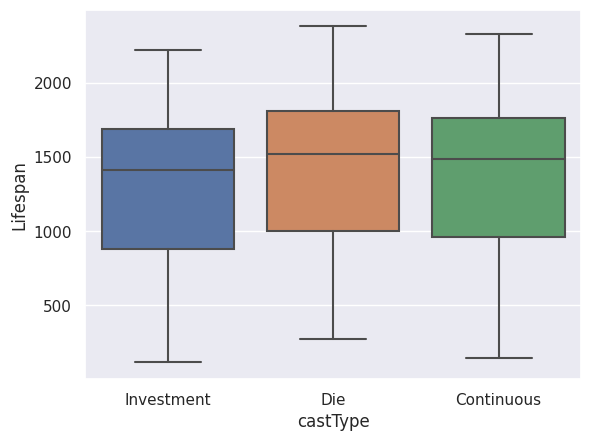

In [ ]:
plt.figure()
sns.boxplot(y=df_alloy['Lifespan'], x= df_alloy['castType'])

### 4.2.3 Analysing the feature seedLocation with target Lifespan

<Axes: xlabel='seedLocation', ylabel='Lifespan'>

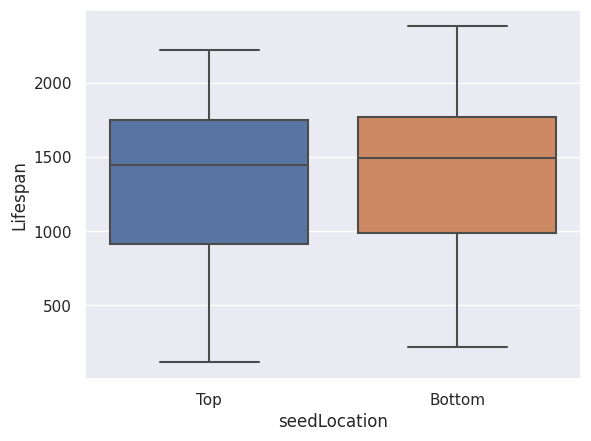

In [ ]:
plt.figure()
sns.boxplot(y=df_alloy['Lifespan'], x= df_alloy['seedLocation'])

### 4.2.4 Analysing the feature microstructure with target Lifespan


<Axes: xlabel='microstructure', ylabel='Lifespan'>

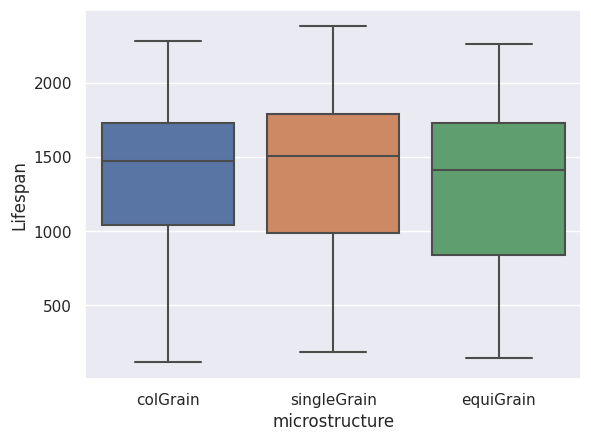

In [ ]:
plt.figure()
sns.boxplot(y=df_alloy['Lifespan'], x= df_alloy['microstructure'])

### 4.2.5 Analysing the feature partType with target Lifespan

<Axes: xlabel='partType', ylabel='Lifespan'>

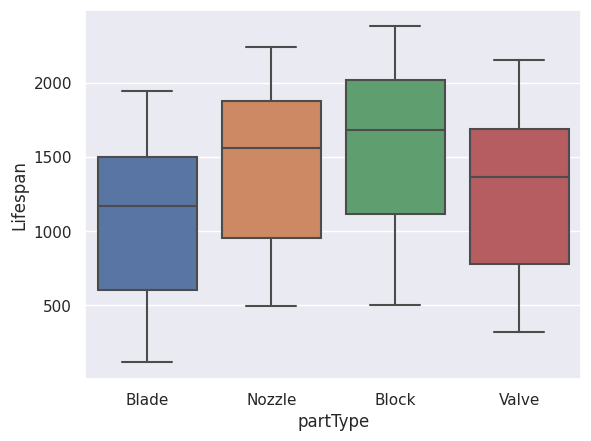

In [ ]:
plt.figure()
sns.boxplot(y=df_alloy['Lifespan'], x= df_alloy['partType'])

### 4.2.6 Analysing the feature coolingRate with the target Lifespan

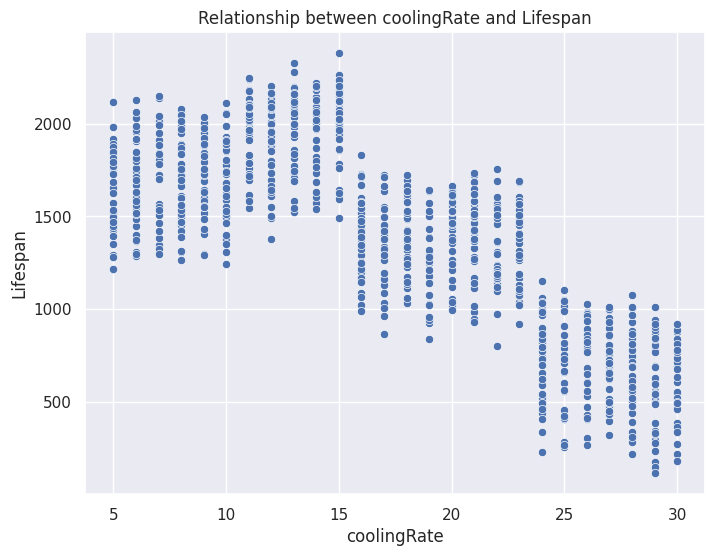

In [ ]:
# Scatter plot to visualize the relationship between the numeric feature and target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='coolingRate', y='Lifespan', data=df_alloy)
plt.title('Relationship between coolingRate and Lifespan')
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.show()

### 4.2.7 Analysing the feature smallDefects and the target Lifespan

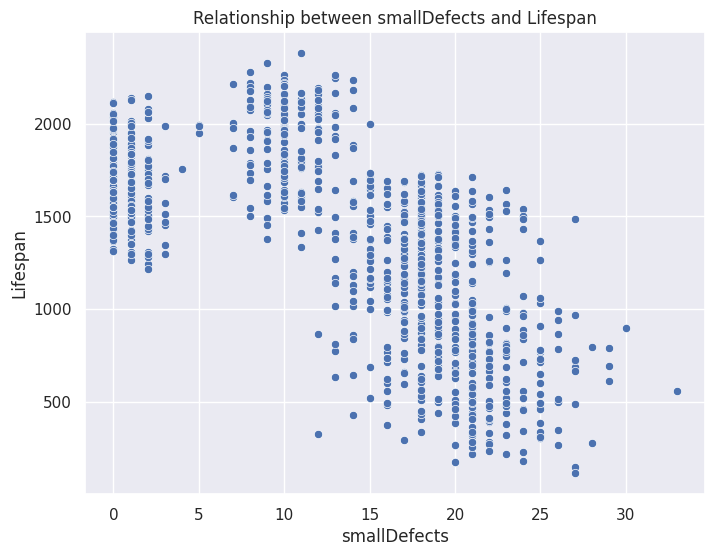

In [ ]:
# Scatter plot to visualize the relationship between the numeric feature and target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='smallDefects', y='Lifespan', data=df_alloy)
plt.title('Relationship between smallDefects and Lifespan')
plt.xlabel('smallDefects')
plt.ylabel('Lifespan')
plt.show()

### 4.2.8 Analysing the feature smallDefects vs coolingRate

<Axes: xlabel='coolingRate', ylabel='smallDefects'>

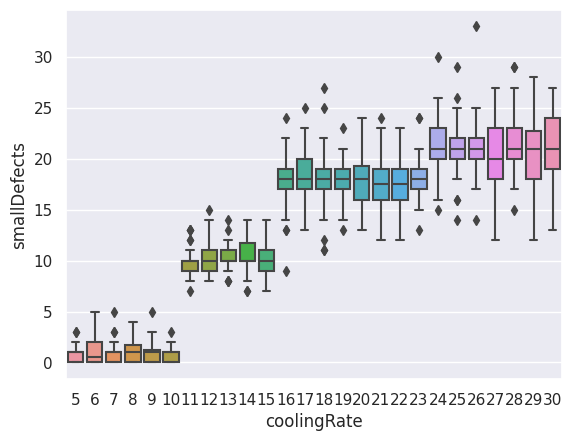

In [ ]:
plt.figure()
sns.boxplot(y=df_alloy['smallDefects'], x= df_alloy['coolingRate'])

### 4.2.9 Data distribution of the numerical features

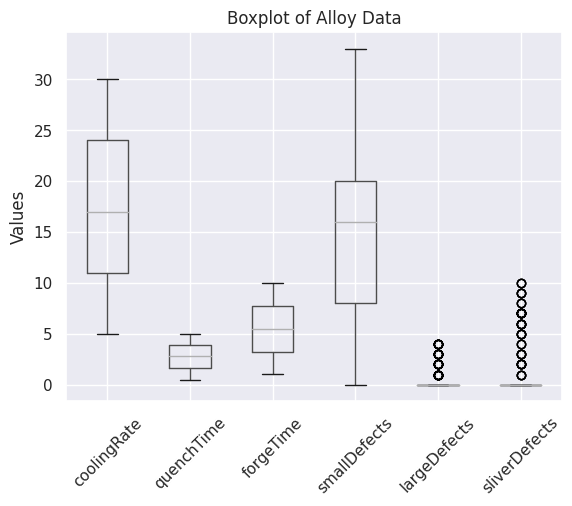

In [ ]:
df_alloy.boxplot(column=['coolingRate','quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects'])
plt.xticks(rotation=45)
plt.title('Boxplot of Alloy Data')
plt.ylabel('Values')
plt.show()

# 5. Defining the feature variables and the target

In [ ]:
X = df_alloy.loc[:, df_alloy.columns != 'Lifespan']
y = df_alloy.loc[:, df_alloy.columns == 'Lifespan']

In [ ]:
y

Lifespan
0     284.161690
1    1599.551748
2     768.311031
3    1697.663828
4    1491.478862
..           ...
995   462.984817
996  1426.298870
997  1538.072772
998  1893.052813
999   932.460716

[1000 rows x 1 columns]

In [ ]:
print(color.BOLD + "Size of the features : {}\nSize of the target : {} ".format(X.shape,y.shape))

Size of the features : (1000, 10)
Size of the target : (1000, 1) 


# 6. Dataset split into train test and validation

For non timeseries data, usually, **we should shuffle** the data by specifying **`shuffle=True`** to avoid the bias of the data by data index.

In [ ]:
train_holdout_ratio = 0.8
val_holdout_ratio = 0.1
test_holdout_ratio = 0.1

# 20% holdout
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size = test_holdout_ratio, shuffle=True, random_state=0)
print(color.BOLD + "Size of the test features : {}\nSize of test target : {} ".format(x_test.shape,y_test.shape))

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = val_holdout_ratio, shuffle=True, random_state=0)
print(color.BOLD + "Size of the train features : {}\nSize of train target : {} ".format(x_train.shape,y_train.shape))
print(color.BOLD + "Size of the validation features : {}\nSize of validation target : {} ".format(x_val.shape,y_val.shape))

Size of the test features : (100, 10)
Size of test target : (100, 1) 
Size of the train features : (810, 10)
Size of train target : (810, 1) 
Size of the validation features : (90, 10)
Size of validation target : (90, 1) 


# 7. Encoding categorical Data

**seedLocation - label encoding**

**partType - OHE**

**microstructure - OHE**

seedLocation is a binary category. There is no benefit to using OHE for categorical features with only two catgories (as it will just end up with two columns where the 1's and 0's are inverted, which adds nothing to the model). So for binary categories always just use label encoding.

As is often the case in ML, which method will give the best results when dealing with catgorical data will vary based on the dataset, so it is always worth experimenting with different encoding methods.

In [ ]:
encode_x_train = x_train.copy()
encode_x_val = x_val.copy()
encode_x_test = x_test.copy()

In [ ]:
# create an object of the LabelEncoder class
lblEncoder_X = LabelEncoder()
# apply LblEncoder object to our categorical variables (columns - 'school') using the fit_transform method. This returns the column encoded.
encode_x_train['seedLocation'] = lblEncoder_X.fit_transform(encode_x_train['seedLocation'])
encode_x_val['seedLocation'] = lblEncoder_X.transform(encode_x_val['seedLocation'])
encode_x_test['seedLocation'] = lblEncoder_X.transform(encode_x_test['seedLocation'])

In [ ]:
encode_x_train.head(2)

partType microstructure  coolingRate  quenchTime  forgeTime  smallDefects  \
495    Block       colGrain           30    3.945982   3.062727            19   
96     Valve    singleGrain           12    4.096698   4.218262            10   

     largeDefects  sliverDefects  seedLocation    castType  
495             0              0             0  Continuous  
96              0              0             0         Die

In [ ]:
categorical_columns = ['partType', 'microstructure','castType']
ct = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# the output is an numpy array with the encoded columns
encoded_array_x_train = ct.fit_transform(encode_x_train)
encoded_array_x_val = ct.transform(encode_x_val)
encoded_array_x_test = ct.transform(encode_x_test)

encoded_col_names= ct.get_feature_names_out()
print(color.BOLD + "Total columns after encoding: {} \nAll column names in the dataset: \n{}".format(len(encoded_col_names),encoded_col_names))

x_train_encoded = pd.DataFrame(encoded_array_x_train, columns=encoded_col_names)
x_val_encoded = pd.DataFrame(encoded_array_x_val, columns=encoded_col_names)
x_test_encoded = pd.DataFrame(encoded_array_x_test, columns=encoded_col_names)

Total columns after encoding: 17 
All column names in the dataset: 
['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'castType_Continuous' 'castType_Die'
 'castType_Investment' 'coolingRate' 'quenchTime' 'forgeTime'
 'smallDefects' 'largeDefects' 'sliverDefects' 'seedLocation']


In [ ]:
x_train_encoded.head(2)

partType_Blade  partType_Block  partType_Nozzle  partType_Valve  \
0             0.0             1.0              0.0             0.0   
1             0.0             0.0              0.0             1.0   

   microstructure_colGrain  microstructure_equiGrain  \
0                      1.0                       0.0   
1                      0.0                       0.0   

   microstructure_singleGrain  castType_Continuous  castType_Die  \
0                         0.0                  1.0           0.0   
1                         1.0                  0.0           1.0   

   castType_Investment  coolingRate  quenchTime  forgeTime  smallDefects  \
0                  0.0         30.0    3.945982   3.062727          19.0   
1                  0.0         12.0    4.096698   4.218262          10.0   

   largeDefects  sliverDefects  seedLocation  
0           0.0            0.0           0.0  
1           0.0            0.0           0.0

In [ ]:
x_train_encoded.columns

Index(['partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve',
       'microstructure_colGrain', 'microstructure_equiGrain',
       'microstructure_singleGrain', 'castType_Continuous', 'castType_Die',
       'castType_Investment', 'coolingRate', 'quenchTime', 'forgeTime',
       'smallDefects', 'largeDefects', 'sliverDefects', 'seedLocation'],
      dtype='object')

# 7. Feature scaling

**OneHot encoded categorical variables and labels do not need to be scaled. The distributions of the input features can be plot using box plots.**

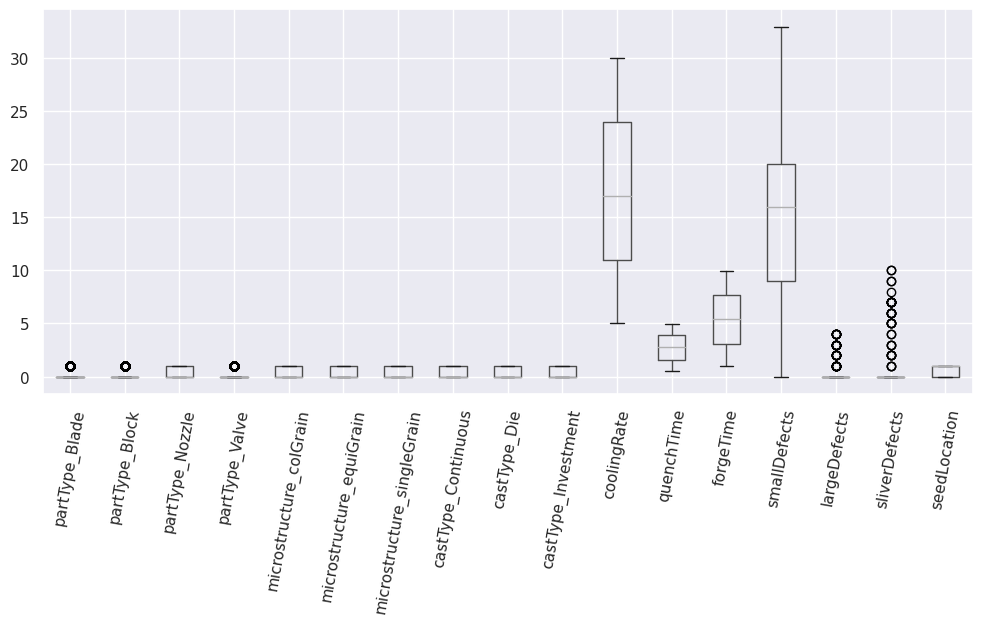

In [ ]:
fig=plt.figure(figsize=(12,5))
x_train_encoded.boxplot()
_=plt.xticks(rotation=80)

**MinMax scaling is a valid approach that can be useful when we have a bounded numerical coloumn. In this case, standardisation was used.**

In [ ]:
x_encoded_scaled = x_train_encoded.copy()

scaler_num= StandardScaler().set_output(transform="pandas")

x_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']]=scaler_num.fit_transform(x_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']])
x_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']].head(3)

coolingRate  quenchTime  forgeTime  smallDefects  largeDefects  \
0     1.647459    0.883303  -0.904943      0.689267     -0.209215   
1    -0.728167    0.996671  -0.464266     -0.429334     -0.209215   
2    -1.652021    0.891331   0.765795     -1.547935      6.778983   

   sliverDefects  
0      -0.202811  
1      -0.202811  
2      -0.202811

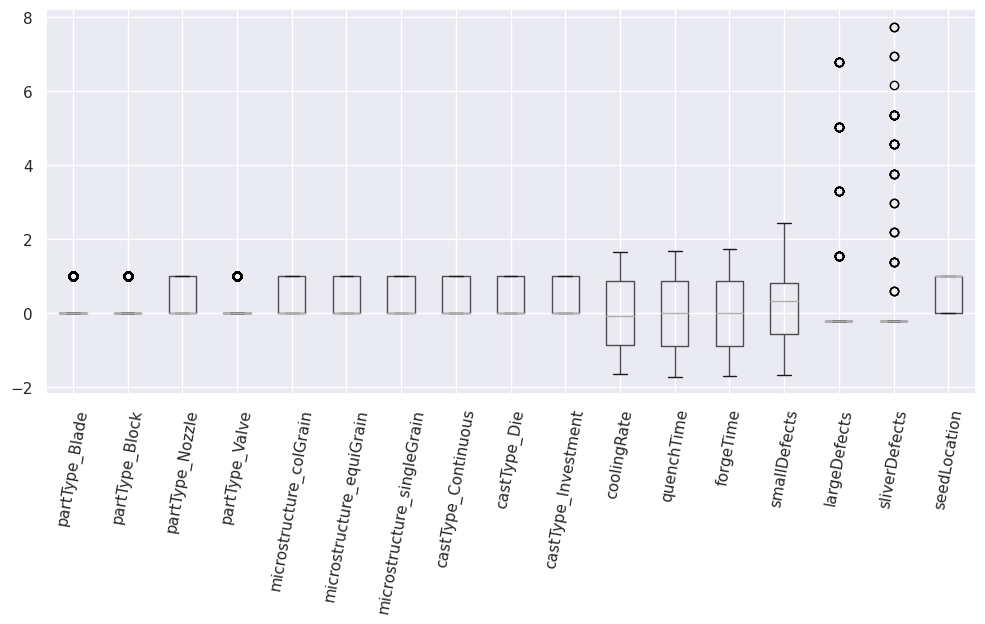

In [ ]:
fig=plt.figure(figsize=(12,5))
x_encoded_scaled.boxplot()
_=plt.xticks(rotation=80)

**Initialization**
  - Initialize the preprocessor(s) and the machine learning model objects.

**Model Selection**
  - Identify the different solutions :Linear Regression, Lasso, Ridge, Decision tree, Neural Network, etc., preprocessing methods, feature selection/engineering and hyperparameter selection.
  - Training (do this for **all** models and hyperparameters)
    - **Fit the preprocessor(s)** to the raw training feature matrix.
    - **Transform (Preprocess)** the raw training feature matrix into the preprocessed training feature matrix.
    - **Fit (Train) the prediction model** using the data pair of the preprocessed training feature matrix and target column vector.
    - Recording the performance of the prediction on training data is often also helpful for identifying overfitting.
  - Validation (for **all** models and hyperparameters)
    - **Transform (Preprocess)** the raw validation feature matrix into the preprocessed validation feature matrix using **the preprocessor(s)** (**Do NOT fit any preprocessor to the validation feature matrix**).
    - **Predict** using the preprocessed validation feature matrix to get a predicted target column.
    - **Evaluate** the prediction performance on the validation data by a loss and/or score function.

  - Continue training and validation until you have a model (or selection of models) you feel are potentially good enough to offer a robust solution to the provided prediction problem.

**Test (for the model and hyperparameters selected by the validation process)**
  - **Transform (Preprocess)** the raw test feature matrix into the preprocessed test feature matrix by **the preprocessor(s)** (**Do NOT fit any preprocessor to the test feature matrix**).
  - **Predict** on the preprocessed test feature matrix to get a predicted target column.
  - **Evaluate** the prediction performance on the test data by a loss and/or score function.

### **Define different sets of features**

In [ ]:
# Using all the features
set_of_features_1 = ['partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve','microstructure_colGrain', 'microstructure_equiGrain','microstructure_singleGrain', 'castType_Continuous', 'castType_Die',
       'castType_Investment', 'coolingRate', 'quenchTime', 'forgeTime','smallDefects', 'largeDefects', 'sliverDefects', 'seedLocation']
# Highly correlated freatures
set_of_features_2 = ['coolingRate','quenchTime','smallDefects','sliverDefects', 'partType_Blade', 'partType_Block', 'partType_Nozzle', 'partType_Valve']

### **Fitting feature set1 - Contains all features**

# 9. Hyperparameter Tuning

degree: 1, Validation mean squared error: 70935.82562260094.
degree: 2, Validation mean squared error: 24862.88840733272.
degree: 3, Validation mean squared error: 1.2541103412355941e+31.
degree: 4, Validation mean squared error: 1485370.1286370389.
degree: 5, Validation mean squared error: 356958.85661862104.
degree: 6, Validation mean squared error: 299595.8323223351.
degree: 7, Validation mean squared error: 492210.5773168763.


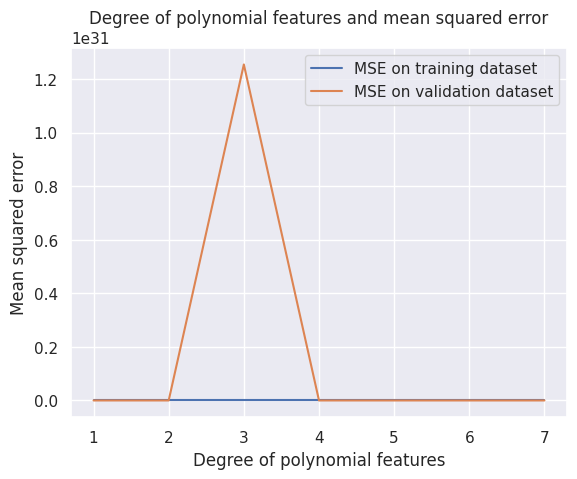

The best degree of polynomials: 2


In [ ]:
max_degree = 7 #Define the max degree to test
# Initialise the MSE arrays, filling them with NaN's
mse_train_array = np.full([max_degree + 1], np.nan)
mse_valid_array = np.full([max_degree + 1], np.nan)

degrees = range(1, max_degree+1)

for degree in degrees:
  # Initialise
  model = sklearn.linear_model.LinearRegression()
  poly = PolynomialFeatures(degree=degree)
  scaler = StandardScaler()
  # Train
  poly.fit(x_train_encoded[set_of_features_1])
  x_train_poly = poly.transform(x_train_encoded[set_of_features_1])
  scaler.fit(x_train_poly)
  X_train = scaler.transform(x_train_poly)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validate
  x_val_poly = poly.transform(x_val_encoded[set_of_features_1])
  X_val = scaler.transform(x_val_poly)
  y_pred_val = model.predict(X_val)
  mse_valid = mean_squared_error(y_val, y_pred_val)

  # Store MSE for this degree value
  mse_train_array[degree] = mse_train
  mse_valid_array[degree] = mse_valid

  print(f'degree: {degree}, Validation mean squared error: {mse_valid}.')

plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_valid_array[1:], label='MSE on validation dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_valid_array) # Finds the smallest VALIDATION MSE in the array (ignoring any NaN values).
print('The best degree of polynomials:', best_degree)


# 10. Model Selection

The best hyperparameter (degree) on the validation data is 2.

However, it is possible that the model with the selected hyperparameter is actually overfitting the validation data. To check the true performance of our ML model, we must measure the MSE on the test data.

MSE on the train data: 19986.23032430851
MSE on the valid data: 24862.88840733272
MSE on the test data: 25690.61632941986


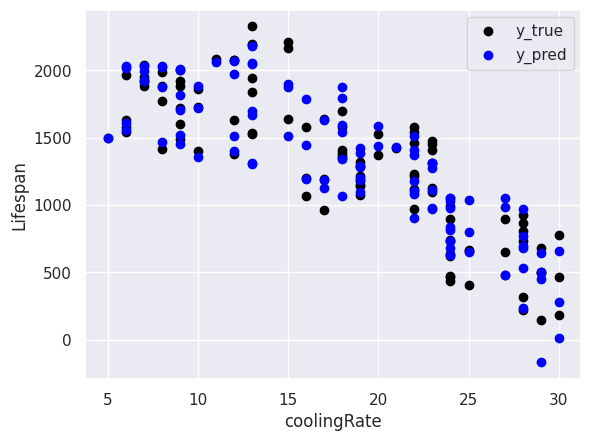

R2 score: 0.9110


In [ ]:
# Initialise the test instances using feature set_1

best_degree = 2
model = sklearn.linear_model.LinearRegression()
poly = PolynomialFeatures(degree=best_degree, interaction_only=False) # use the degree we selected above
scaler = StandardScaler()

# Remember we have to fit our preprocessors and model on the training data again, as we were using many other degrees in our parameteric test above
poly.fit(x_train_encoded[set_of_features_1])
x_train_poly = poly.transform(x_train_encoded[set_of_features_1])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
model.fit(X_train, y_train)

mse_train = mean_squared_error(y_train, model.predict(X_train))
print('MSE on the train data:', mse_train) # Get our MSE for the training Data for comparison

x_valid_poly = poly.transform(x_val_encoded[set_of_features_1])
X_val = scaler.transform(x_valid_poly)
mse_valid = mean_squared_error(y_val, model.predict(X_val))
print('MSE on the valid data:', mse_valid) # Get our MSE for the validation Data for comparison

# Now we have fit our preprocessors using the correct degree, we can process our test data and make a prdiction
x_test_poly = poly.transform(x_test_encoded[set_of_features_1])
X_test = scaler.transform(x_test_poly)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the test data:', mse_test) # check our testing MSE, is it signficantly different from our validation MSE?

# Let's just plot our outputs to see how our model is looking
plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# Finally, let's also get the R2 score for our final model
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

# 11. Regularization

## 11.1 Ridge regresssion (linear regression with $\ell^2$ regularization)

---



For linear models, regularization methods like Lasso (L1) or Ridge (L2) regression can automatically perform feature selection by penalizing less important features.

 Training mean squared error:  19472.296338001965
alpha: 1e-10, Validation mean squared error: 23738.13015011545.
 Training mean squared error:  19472.29633800197
alpha: 1e-09, Validation mean squared error: 23738.130152459955.
 Training mean squared error:  19472.29633800197
alpha: 1e-08, Validation mean squared error: 23738.13017591235.
 Training mean squared error:  19472.296338001986
alpha: 1e-07, Validation mean squared error: 23738.130410434827.
 Training mean squared error:  19472.296338003012
alpha: 1e-06, Validation mean squared error: 23738.13275566869.
 Training mean squared error:  19472.296338106902
alpha: 1e-05, Validation mean squared error: 23738.15620786749.
 Training mean squared error:  19472.29634849323
alpha: 0.0001, Validation mean squared error: 23738.390717601487.
 Training mean squared error:  19472.29738537328
alpha: 0.001, Validation mean squared error: 23740.734588162362.
 Training mean squared error:  19472.399344466518
alpha: 0.01, Validation mean squared 

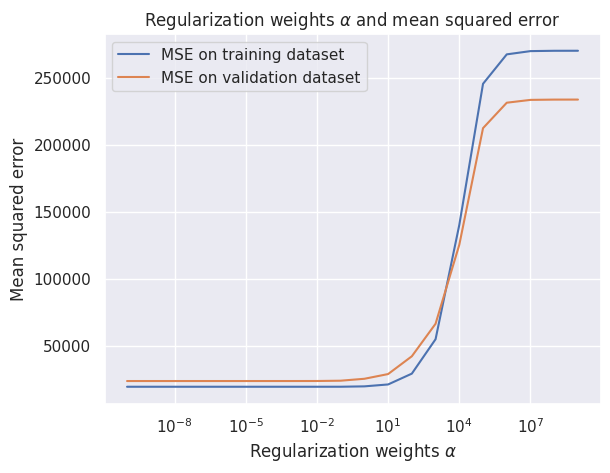

The best alpha: 1e-10
MSE on the test data: 24631.845129977923


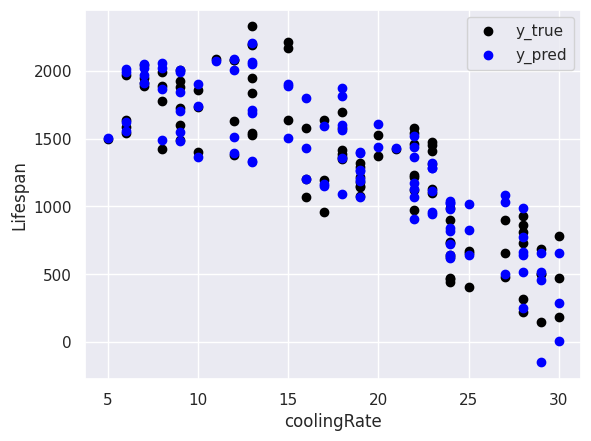

R2 score: 0.9147


In [ ]:
###################################
# Initialise Model and preprocessors
###################################

degree = 2 # Choose your degree. Regularisation will eliminate any values that hurt our model, but do beware about going to big, or python may not be able to cope with the number of features.
alpha_indices = np.arange(20) # Get a list of 1-20
alphas = 10.0 ** (alpha_indices -10) # Define a list of alphas by taking indices from 10 to -10
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

#######################
# Training & validation
#######################

# preprocessing
poly.fit(x_train_encoded[set_of_features_1])
x_train_poly = poly.transform(x_train_encoded[set_of_features_1])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
x_valid_poly = poly.transform(x_val_encoded[set_of_features_1])
X_valid = scaler.transform(x_valid_poly)

# Loop to test alpha values
for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  model = Ridge(alpha=alpha) # fits our ridge model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print(' Training mean squared error: ',mse_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_val, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

#refit our model with the best alpha
model = Ridge(alpha=best_alpha) # fits our ridge model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Preprocess test data
x_test_poly = poly.transform(x_test_encoded[set_of_features_1])
X_test = scaler.transform(x_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

# Plot outputs
plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

## 11.2 Lasso regresssion (linear regression with $\ell^1$ regularization)

Train mean squared error:  233771.11939694802
alpha: 1e-10, Validation mean squared error: 23738.130149604865.
Train mean squared error:  23738.130149604865
alpha: 1e-09, Validation mean squared error: 23738.130147377055.
Train mean squared error:  23738.130147377055
alpha: 1e-08, Validation mean squared error: 23738.130125098687.
Train mean squared error:  23738.130125098687
alpha: 1e-07, Validation mean squared error: 23738.129902316246.
Train mean squared error:  23738.129902316246
alpha: 1e-06, Validation mean squared error: 23738.127674504452.
Train mean squared error:  23738.127674504452
alpha: 1e-05, Validation mean squared error: 23738.105397083837.
Train mean squared error:  23738.105397083837
alpha: 0.0001, Validation mean squared error: 23737.894799830232.
Train mean squared error:  23737.894799830232
alpha: 0.001, Validation mean squared error: 23735.26768737306.
Train mean squared error:  23735.26768737306
alpha: 0.01, Validation mean squared error: 23735.98069805582.
Trai

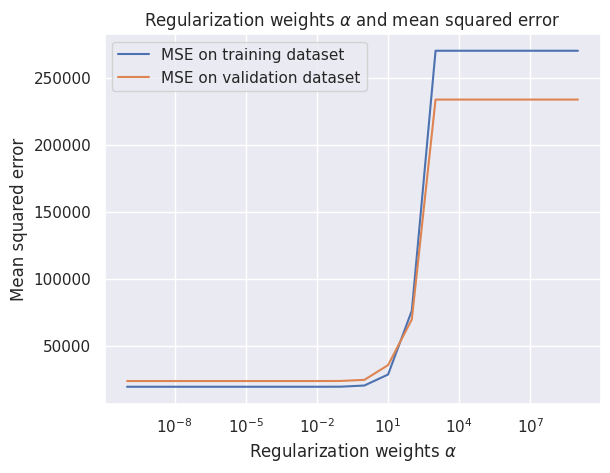

The best alpha: 0.001
MSE on the test data: 41562.73607352887


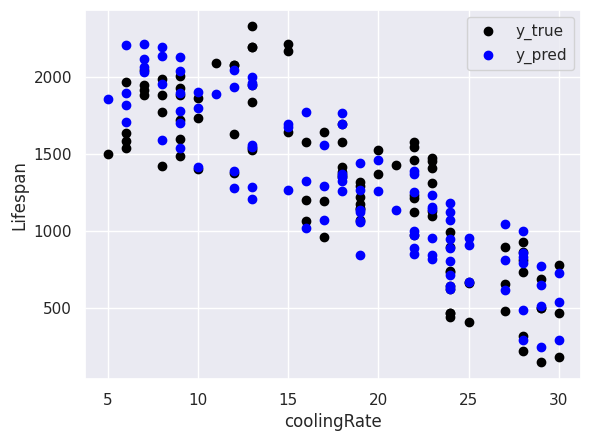

R2 score: 0.8561


In [ ]:
###################################
# Initialise Model and preprocessors
###################################

degree = 2
alpha_indices = np.arange(20) # Get a list of 1-20
alphas = 10.0 ** (alpha_indices -10) # Define a list of alphas by taking indices from 10 to -10
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

#######################
# Training & validation
#######################

# preprocessing
poly.fit(x_train_encoded[set_of_features_1])
x_train_poly = poly.transform(x_train_encoded[set_of_features_1])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
x_valid_poly = poly.transform(x_val_encoded[set_of_features_1])
X_valid = scaler.transform(x_valid_poly)

# Loop to test alpha values
for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  model = Lasso(alpha=alpha, max_iter=10000) # fits our ridge model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print('Train mean squared error: ',mse_valid)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_val, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

#refit our model with the best alpha
model = Lasso(alpha=best_alpha, max_iter=1000, tol=1e-1) # fits our lasso model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Preprocess test data
x_test_poly = poly.transform(x_test_encoded[set_of_features_1])
X_test = scaler.transform(x_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

In [ ]:
coefList=model.coef_.tolist()
print(coefList)

[0.0, -150.0578183014833, 69.83522935864713, 41.304558784377406, -49.65929749003465, 27.750397921804225, -29.762542811274283, 14.135582184360654, 2.7250523942285976, 37.99435655320318, -20.328087483197383, -400.8001969769386, 43.09054003061576, 2.5884928520197468, 37.155734308058875, -9.913258990695246, -16.563508042736906, -34.25478997572753, 11.216610650445977, 0.0, 0.0, 0.0, -20.528339881642626, 7.7387695121975755, 10.728701959955266, 3.3725202140119768, 3.9188394842980516, -4.142759244313131, -6.023814891886139, -0.984730615234532, 6.288972525363814, 4.558280894913374, 0.7981060467840986, 7.6129404468514945, -1.1795149615184963, 8.479453610333973, 0.0, 0.0, -0.33833654591737644, 5.487826187565984, -4.631735742262098, 8.987814121621549, -12.181648449735038, 2.9741689869682553, -5.5597794570695624, 5.19025966725299, 4.9790385564776845, -1.4430192877002201, 3.1183638818149317, -13.358785258712986, 10.005368830693913, 7.270540216881186, 0.0, -13.506199334277243, 9.975532041921493, 1.93

### **Fitting feature set2 - Highly correlated features with the target**

degree: 1, Validation mean squared error: 71420.69775128392.
degree: 2, Validation mean squared error: 176135.4275381413.
degree: 3, Validation mean squared error: 101076.92001190035.
degree: 4, Validation mean squared error: 2.4029118805498222e+29.
degree: 5, Validation mean squared error: 1.9945393381818668e+29.
degree: 6, Validation mean squared error: 7.503316772761668e+25.
degree: 7, Validation mean squared error: 1.6641479573208093e+26.


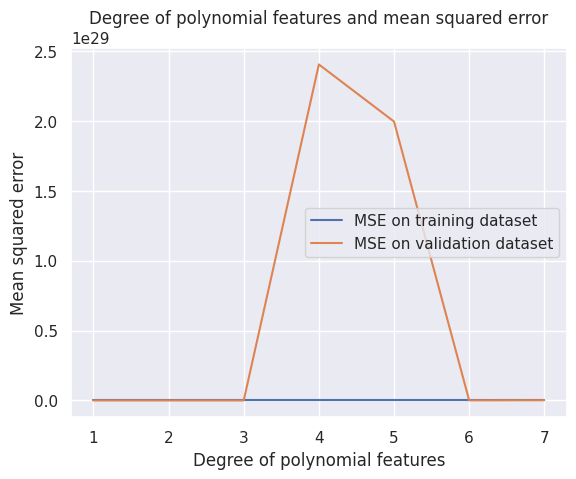

The best degree of polynomials: 1


In [ ]:
max_degree = 7 #Define the max degree to test
# Initialise the MSE arrays, filling them with NaN's
mse_train_array = np.full([max_degree + 1], np.nan)
mse_valid_array = np.full([max_degree + 1], np.nan)

degrees = range(1, max_degree+1)

for degree in degrees:
  # Initialise
  model = sklearn.linear_model.LinearRegression()
  poly = PolynomialFeatures(degree=degree)
  scaler = StandardScaler()
  # Train
  poly.fit(x_train_encoded[set_of_features_2])
  x_train_poly = poly.transform(x_train_encoded[set_of_features_2])
  scaler.fit(x_train_poly)
  X_train = scaler.transform(x_train_poly)
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)

  # Validate
  x_val_poly = poly.transform(x_val_encoded[set_of_features_2])
  X_val = scaler.transform(x_val_poly)
  y_pred_val = model.predict(X_val)
  mse_valid = mean_squared_error(y_val, y_pred_val)

  # Store MSE for this degree value
  mse_train_array[degree] = mse_train
  mse_valid_array[degree] = mse_valid

  print(f'degree: {degree}, Validation mean squared error: {mse_valid}.')

plt.plot(degrees, mse_train_array[1:], label='MSE on training dataset')
plt.plot(degrees, mse_valid_array[1:], label='MSE on validation dataset')
plt.xlabel('Degree of polynomial features')
plt.ylabel('Mean squared error')
plt.title('Degree of polynomial features and mean squared error')
plt.legend()
plt.show()

best_degree = np.nanargmin(mse_valid_array) # Finds the smallest VALIDATION MSE in the array (ignoring any NaN values).
print('The best degree of polynomials:', best_degree)

MSE on the train data: 131655.19832027776
MSE on the valid data: 176135.4275381413
MSE on the test data: 111978.99819947513


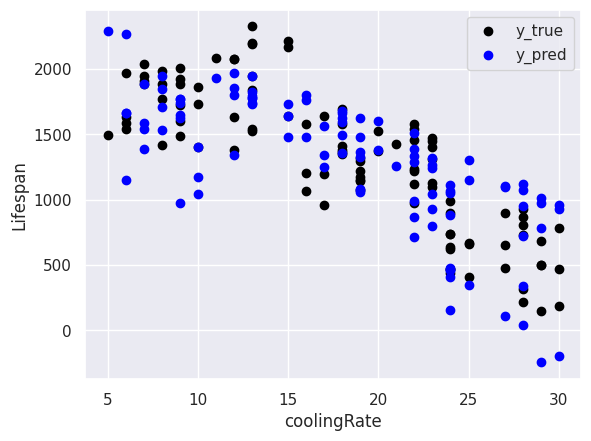

R2 score: 0.6123


In [ ]:
# Initialise the test instances for feature set_2

best_degree = 2
model = sklearn.linear_model.LinearRegression()
poly = PolynomialFeatures(degree=best_degree, interaction_only=False) # use the degree we selected above
scaler = StandardScaler()

# Remember we have to fit our preprocessors and model on the training data again, as we were using many other degrees in our parameteric test above
poly.fit(x_train_encoded[set_of_features_2])
x_train_poly = poly.transform(x_train_encoded[set_of_features_2])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
model.fit(X_train, y_train)

mse_train = mean_squared_error(y_train, model.predict(X_train))
print('MSE on the train data:', mse_train) # Get our MSE for the training Data for comparison

x_valid_poly = poly.transform(x_val_encoded[set_of_features_2])
X_val = scaler.transform(x_valid_poly)
mse_valid = mean_squared_error(y_val, model.predict(X_val))
print('MSE on the valid data:', mse_valid) # Get our MSE for the validation Data for comparison

# Now we have fit our preprocessors using the correct degree, we can process our test data and make a prdiction
x_test_poly = poly.transform(x_test_encoded[set_of_features_2])
X_test = scaler.transform(x_test_poly)
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)
print('MSE on the test data:', mse_test) # check our testing MSE, is it signficantly different from our validation MSE?

# Let's just plot our outputs to see how our model is looking
plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# Finally, let's also get the R2 score for our final model
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

 Training mean squared error:  27841.96594157229
alpha: 1e-10, Validation mean squared error: 28168.76595458113.
 Training mean squared error:  27841.965941572296
alpha: 1e-09, Validation mean squared error: 28168.76595602235.
 Training mean squared error:  27841.9659415723
alpha: 1e-08, Validation mean squared error: 28168.76597043568.
 Training mean squared error:  27841.965941572307
alpha: 1e-07, Validation mean squared error: 28168.766114571055.
 Training mean squared error:  27841.965941573257
alpha: 1e-06, Validation mean squared error: 28168.767555926435.
 Training mean squared error:  27841.965941667593
alpha: 1e-05, Validation mean squared error: 28168.78196942093.
 Training mean squared error:  27841.965951100596
alpha: 0.0001, Validation mean squared error: 28168.926098463533.
 Training mean squared error:  27841.96689294437
alpha: 0.001, Validation mean squared error: 28170.366799443214.
 Training mean squared error:  27842.059640309137
alpha: 0.01, Validation mean squared 

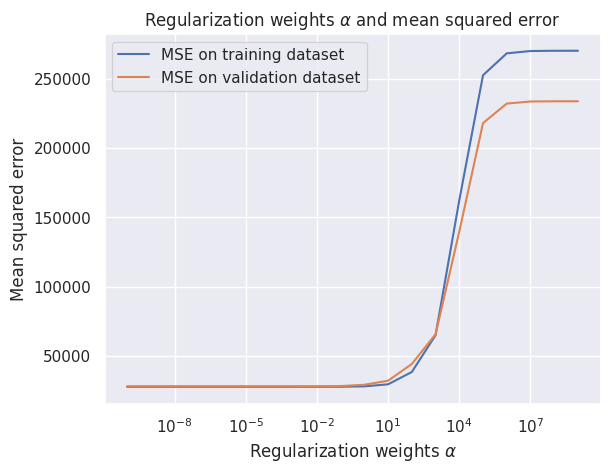

The best alpha: 1e-10
MSE on the test data: 30150.02224849204


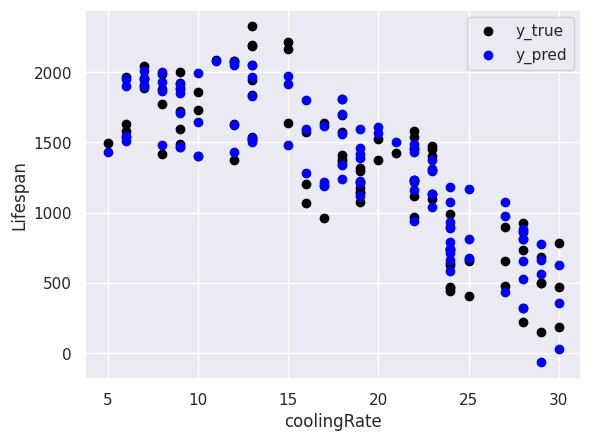

R2 score: 0.8956


In [ ]:
###################################
# Initialise Model and preprocessors
###################################

degree = 2 # Choose your degree. Regularisation will eliminate any values that hurt our model, but do beware about going to big, or python may not be able to cope with the number of features.
alpha_indices = np.arange(20) # Get a list of 1-20
alphas = 10.0 ** (alpha_indices -10) # Define a list of alphas by taking indices from 10 to -10
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

#######################
# Training & validation
#######################

# preprocessing
poly.fit(x_train_encoded[set_of_features_2])
x_train_poly = poly.transform(x_train_encoded[set_of_features_2])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
x_valid_poly = poly.transform(x_val_encoded[set_of_features_2])
X_valid = scaler.transform(x_valid_poly)

# Loop to test alpha values
for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  model = Ridge(alpha=alpha) # fits our ridge model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print(' Training mean squared error: ',mse_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_val, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

#refit our model with the best alpha
model = Ridge(alpha=best_alpha) # fits our ridge model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Preprocess test data
x_test_poly = poly.transform(x_test_encoded[set_of_features_2])
X_test = scaler.transform(x_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

# Plot outputs
plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

 Training mean squared error:  27841.9659415723
alpha: 1e-10, Validation mean squared error: 28168.76595453038.
 Training mean squared error:  27841.9659415723
alpha: 1e-09, Validation mean squared error: 28168.76595552915.
 Training mean squared error:  27841.9659415723
alpha: 1e-08, Validation mean squared error: 28168.765965515304.
 Training mean squared error:  27841.965941572336
alpha: 1e-07, Validation mean squared error: 28168.76606537625.
 Training mean squared error:  27841.965941576284
alpha: 1e-06, Validation mean squared error: 28168.767063989326.
 Training mean squared error:  27841.965941969876
alpha: 1e-05, Validation mean squared error: 28168.777050413144.
 Training mean squared error:  27841.965981330428
alpha: 0.0001, Validation mean squared error: 28168.87694367279.
 Training mean squared error:  27841.969900593776
alpha: 0.001, Validation mean squared error: 28169.602963252128.
 Training mean squared error:  27842.323351250794
alpha: 0.01, Validation mean squared er

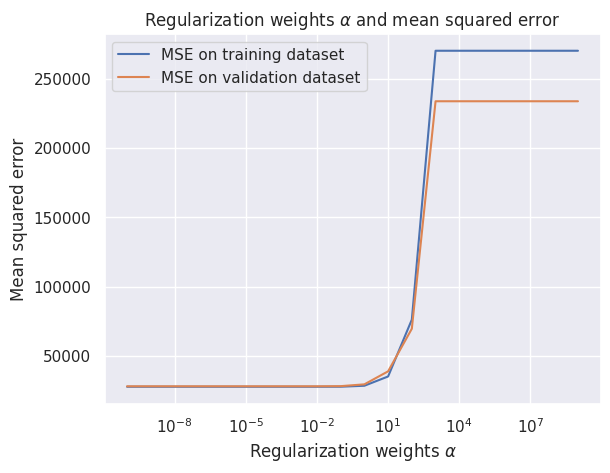

The best alpha: 1e-10
MSE on the test data: 42491.35608803124


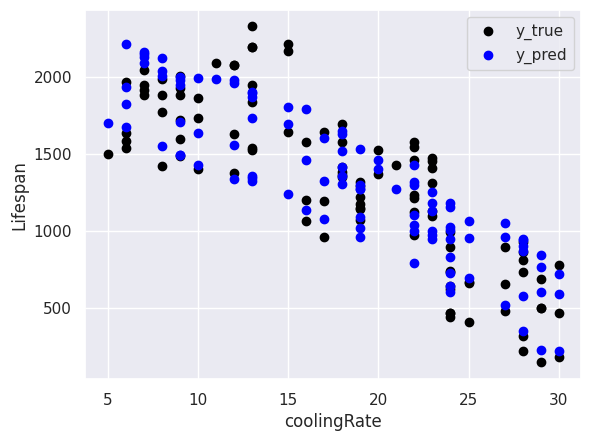

R2 score: 0.8529


In [ ]:
###################################
# Initialise Model and preprocessors
###################################

degree = 2
alpha_indices = np.arange(20) # Get a list of 1-20
alphas = 10.0 ** (alpha_indices -10) # Define a list of alphas by taking indices from 10 to -10
# Get the MSE arrays
mse_train_array = np.full([len(alphas)], np.nan)
mse_valid_array = np.full([len(alphas)], np.nan)

poly = PolynomialFeatures(degree=degree)
scaler = StandardScaler()

#######################
# Training & validation
#######################

# preprocessing
poly.fit(x_train_encoded[set_of_features_2])
x_train_poly = poly.transform(x_train_encoded[set_of_features_2])
scaler.fit(x_train_poly)
X_train = scaler.transform(x_train_poly)
x_valid_poly = poly.transform(x_val_encoded[set_of_features_2])
X_valid = scaler.transform(x_valid_poly)

# Loop to test alpha values
for alpha_index, alpha in zip(alpha_indices, alphas):
  # train
  model = Lasso(alpha=alpha, max_iter=10000) # fits our ridge model with a new regularisation weight each iteration
  model.fit(X_train, y_train)
  y_pred_train = model.predict(X_train)
  mse_train = mean_squared_error(y_train, y_pred_train)
  print(' Training mean squared error: ',mse_train)

  # Validation
  y_pred_valid = model.predict(X_valid)
  mse_valid = mean_squared_error(y_val, y_pred_valid)

  # Store MSEs for this iteration
  mse_train_array[alpha_index] = mse_train
  mse_valid_array[alpha_index] = mse_valid
  print(f'alpha: {alpha}, Validation mean squared error: {mse_valid}.')

# Plot our graph of MSE for training and validation
plt.plot(alphas, mse_train_array, label='MSE on training dataset')
plt.plot(alphas, mse_valid_array, label='MSE on validation dataset')
plt.xlabel(r'Regularization weights $\alpha$')
plt.ylabel('Mean squared error')
plt.title(r'Regularization weights $\alpha$ and mean squared error')
plt.xscale('log')
plt.legend()
plt.show()

# Select our best performing alpha (lowest MSE)
best_alpha_index = np.argmin(mse_valid_array)
best_alpha = alphas[best_alpha_index]
print('The best alpha:', best_alpha)

######
# Test
######

#refit our model with the best alpha
model = Lasso(alpha=best_alpha, max_iter=1000, tol=1e-1) # fits our lasso model with a new regularisation weight each iteration
model.fit(X_train, y_train)

# Preprocess test data
x_test_poly = poly.transform(x_test_encoded[set_of_features_2])
X_test = scaler.transform(x_test_poly)

# Predict test data
y_pred_test = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(sklearn.metrics.r2_score(y_test, y_pred_test)))

If validation and test MSE are approximately equal we can be confident that we are not overfitting the validation set.

# 12. Grid Search

clearly show what hyperparameters and hyperparameter values have been chosen to test, with some justifications give for these choices

Best Hyperparameters: {'poly__degree': 2, 'ridge__alpha': 10}
Best Model: Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('ridge', Ridge(alpha=10))])
MSE on the test data: 24204.052917691544


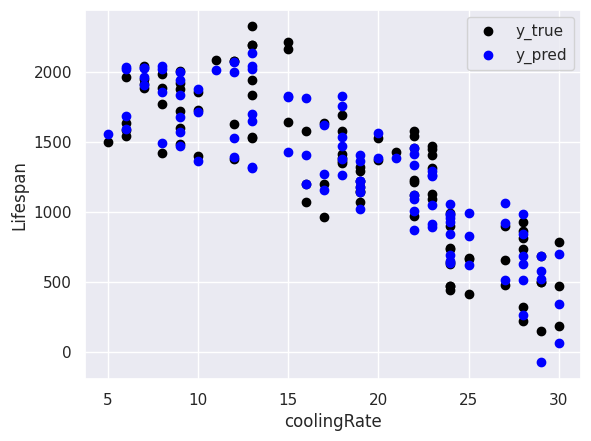

R2 score: 0.9162


In [ ]:
# Hyperparameter grid for GridSearchCV
param_grid = {
    'ridge__alpha': [0.01, 0.1, 1, 10],  # Values for Ridge alpha
    'poly__degree': [1, 2, 3, 4, 5],  # Values for PolynomialFeatures degree
}

# Initialize Model and preprocessors
ridge = Ridge()
poly = PolynomialFeatures()  # Apply PolynomialFeatures only to the selected feature
scaler = StandardScaler()

# Create a pipeline with preprocessing and Ridge regression
# Pipelines can be used outside of grid searchs to give you a tidier process
# essentially they roll up multiple preprocesing operations with the model so it only requires 'fitting' once
pipeline = Pipeline([
    ('poly', poly),
    ('scaler', scaler),
    ('ridge', ridge)
])

# Initialize GridSearchCV
# Pipeline - provide teh model (or pipeline) that you want to test teh grid search on
# param_grid - the hyperparameter values you wish to test. Must make sure these
# align with the hyperparameters of the pipeline being fitted or there will be an error.
# cv - cross validation folds to use
# scoring - how to evaluate the different models, many options, but for our regression problem I have chosen R2.
# n_jobs - this allows parallel processing to be use multiple processors to run the search quicker.
# Unless you have a good reason, I would leave as '-1' so all available processors are used.
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)

# Train the best model on the full training set
best_model.fit(x_train_encoded, y_train)

# Predict test data
y_pred_test = best_model.predict(x_test_encoded)
mse_test = mean_squared_error(y_test, y_pred_test)

print('MSE on the test data:', mse_test)

# Plot outputs
plt.scatter(x_test['coolingRate'], y_test,  color='black', label='y_true') # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test, color='blue', label='y_pred') # predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.show()

# The R2 score: 1 is perfect prediction
print('R2 score: {:.4f}'.format(r2_score(y_test, y_pred_test)))

In [ ]:
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

params  mean_test_score  std_test_score
7     {'poly__degree': 2, 'ridge__alpha': 10}         0.888373        0.006739
6      {'poly__degree': 2, 'ridge__alpha': 1}         0.882828        0.017681
5    {'poly__degree': 2, 'ridge__alpha': 0.1}         0.879820        0.020491
4   {'poly__degree': 2, 'ridge__alpha': 0.01}         0.879112        0.020640
11    {'poly__degree': 3, 'ridge__alpha': 10}         0.813115        0.045120
10     {'poly__degree': 3, 'ridge__alpha': 1}         0.809689        0.046242
9    {'poly__degree': 3, 'ridge__alpha': 0.1}         0.797649        0.039003
1    {'poly__degree': 1, 'ridge__alpha': 0.1}         0.794724        0.009318
0   {'poly__degree': 1, 'ridge__alpha': 0.01}         0.794724        0.009331
2      {'poly__degree': 1, 'ridge__alpha': 1}         0.794716        0.009198
3     {'poly__degree': 1, 'ridge__alpha': 10}         0.793519        0.008426
8   {'poly__degree': 3, 'ridge__alpha': 0.01}         0.791055        0.034816
15    {'poly__degree': 4, 'ridge__alpha': 10}         0.733453        0.064185
14     {'poly__degree': 4, 'ridge__alpha': 1}         0.567117        0.077629
19    {'poly__degree': 5, 'ridge__alpha': 10}         0.502325        0.214845
13   {'poly__degree': 4, 'ridge__alpha': 0.1}         0.042410        0.266715
18     {'poly__degree': 5, 'ridge__alpha': 1}         0.012566        0.487205
17   {'poly__degree': 5, 'ridge__alpha': 0.1}        -0.496322        0.774481
16  {'poly__degree': 5, 'ridge__alpha': 0.01}        -0.620494        0.848992
12  {'poly__degree': 4, 'ridge__alpha': 0.01}        -0.817578        0.571427

# 13. Random Forest Regression

Best hyperparameters for Random Forest: n_estimators=200, max_depth=15
MSE on the train data: 769.3450154957511
MSE on the validation data: 5833.6183307372785
MSE on the test data: 5783.662225805938
R2 score on the test data: 0.9799738657133286


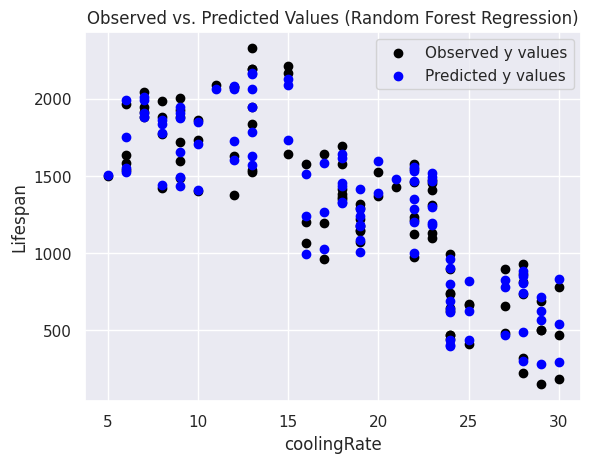

In [ ]:
n_estimators = [100, 200, 300]  # Example values for number of trees in the forest
max_depth = [None, 5, 10, 15]  # Example values for maximum depth of the trees

# Initialize arrays to store MSE values
mse_train_rf = np.zeros((len(n_estimators), len(max_depth)))
mse_valid_rf = np.zeros((len(n_estimators), len(max_depth)))
r2_train_rf = np.zeros((len(n_estimators), len(max_depth)))
r2_valid_rf = np.zeros((len(n_estimators), len(max_depth)))

# Feature set 1 preprocessing
# ... Add your preprocessing steps for feature set 1 here ...

# Loop through hyperparameters
for i, est in enumerate(n_estimators):
    for j, depth in enumerate(max_depth):
        # Initialize Random Forest Regressor with different hyperparameters
        rf_model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=42)

        # Train the model
        rf_model.fit(x_train_encoded[set_of_features_1], y_train)  # X_train_fs1 is the preprocessed feature set 1 for training

        # Predictions on training and validation sets
        y_pred_train_rf = rf_model.predict(x_train_encoded[set_of_features_1])
        y_pred_valid_rf = rf_model.predict(x_val_encoded[set_of_features_1])  # X_valid_fs1 is the preprocessed feature set 1 for validation

        # Calculate MSE and R^2 scores for training and validation sets
        mse_train_rf[i, j] = mean_squared_error(y_train, y_pred_train_rf)
        mse_valid_rf[i, j] = mean_squared_error(y_val, y_pred_valid_rf)
        r2_train_rf[i, j] = r2_score(y_train, y_pred_train_rf)
        r2_valid_rf[i, j] = r2_score(y_val, y_pred_valid_rf)

# Find the best hyperparameters based on validation set performance
best_params_rf = np.unravel_index(np.argmin(mse_valid_rf), mse_valid_rf.shape)
best_n_estimators = n_estimators[best_params_rf[0]]
best_max_depth = max_depth[best_params_rf[1]]

# Train the best Random Forest model using the selected hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
best_rf_model.fit(x_train_encoded[set_of_features_1], y_train)

# Predict on train, validation, and test sets
y_pred_train_rf = best_rf_model.predict(x_train_encoded[set_of_features_1])
y_pred_valid_rf = best_rf_model.predict(x_val_encoded[set_of_features_1])
y_pred_test_rf = best_rf_model.predict(x_test_encoded[set_of_features_1])

# Calculate MSE for train, validation, and test sets
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_valid_rf = mean_squared_error(y_val, y_pred_valid_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

# Calculate R^2 for train, validation, and test sets
r2_train_rf = best_rf_model.score(x_train_encoded[set_of_features_1], y_train)
r2_valid_rf = best_rf_model.score(x_val_encoded[set_of_features_1], y_val)
r2_test_rf = best_rf_model.score(x_test_encoded[set_of_features_1], y_test)

# Print MSE and R^2 scores
print(f'Best hyperparameters for Random Forest: n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'MSE on the train data: {mse_train_rf}')
print(f'MSE on the validation data: {mse_valid_rf}')
print(f'MSE on the test data: {mse_test_rf}')
print(f'R2 score on the test data: {r2_test_rf}')


# Plotting observed vs. predicted values for Random Forest Regression on the test set
plt.scatter(x_test['coolingRate'], y_test, color='black', label='Observed y values')  # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test_rf, color='blue', label='Predicted y values')  # Predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.title('Observed vs. Predicted Values (Random Forest Regression)')
plt.show()

Best hyperparameters for Random Forest: n_estimators=200, max_depth=10
MSE on the train data: 3187.7099892809238
MSE on the validation data: 12758.593851363785
MSE on the test data: 12496.892462134454
R2 score on the test data: 0.9567290694300663


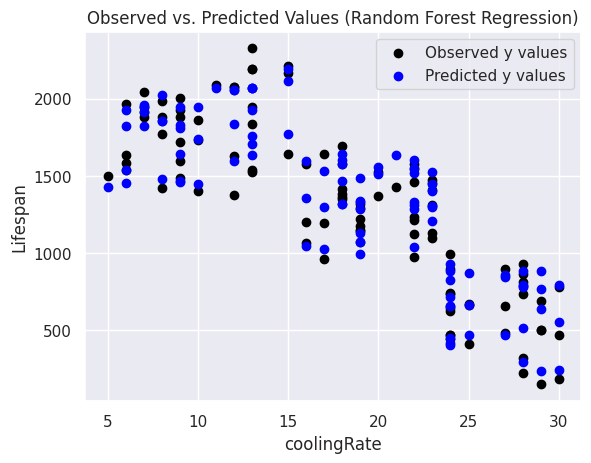

In [ ]:
n_estimators = [100, 200, 300]  # Example values for number of trees in the forest
max_depth = [None, 5, 10, 15]  # Example values for maximum depth of the trees

# Initialize arrays to store MSE values
mse_train_rf = np.zeros((len(n_estimators), len(max_depth)))
mse_valid_rf = np.zeros((len(n_estimators), len(max_depth)))
r2_train_rf = np.zeros((len(n_estimators), len(max_depth)))
r2_valid_rf = np.zeros((len(n_estimators), len(max_depth)))

# Feature set 1 preprocessing
# ... Add your preprocessing steps for feature set 1 here ...

# Loop through hyperparameters
for i, est in enumerate(n_estimators):
    for j, depth in enumerate(max_depth):
        # Initialize Random Forest Regressor with different hyperparameters
        rf_model = RandomForestRegressor(n_estimators=est, max_depth=depth, random_state=42)

        # Train the model
        rf_model.fit(x_train_encoded[set_of_features_2], y_train)  # X_train_fs1 is the preprocessed feature set 1 for training

        # Predictions on training and validation sets
        y_pred_train_rf = rf_model.predict(x_train_encoded[set_of_features_2])
        y_pred_valid_rf = rf_model.predict(x_val_encoded[set_of_features_2])  # X_valid_fs1 is the preprocessed feature set 1 for validation

        # Calculate MSE and R^2 scores for training and validation sets
        mse_train_rf[i, j] = mean_squared_error(y_train, y_pred_train_rf)
        mse_valid_rf[i, j] = mean_squared_error(y_val, y_pred_valid_rf)
        r2_train_rf[i, j] = r2_score(y_train, y_pred_train_rf)
        r2_valid_rf[i, j] = r2_score(y_val, y_pred_valid_rf)

# Find the best hyperparameters based on validation set performance
best_params_rf = np.unravel_index(np.argmin(mse_valid_rf), mse_valid_rf.shape)
best_n_estimators = n_estimators[best_params_rf[0]]
best_max_depth = max_depth[best_params_rf[1]]

# Train the best Random Forest model using the selected hyperparameters
best_rf_model = RandomForestRegressor(n_estimators=best_n_estimators, max_depth=best_max_depth, random_state=42)
best_rf_model.fit(x_train_encoded[set_of_features_2], y_train)

# Predict on train, validation, and test sets
y_pred_train_rf = best_rf_model.predict(x_train_encoded[set_of_features_2])
y_pred_valid_rf = best_rf_model.predict(x_val_encoded[set_of_features_2])
y_pred_test_rf = best_rf_model.predict(x_test_encoded[set_of_features_2])

# Calculate MSE for train, validation, and test sets
mse_train_rf = mean_squared_error(y_train, y_pred_train_rf)
mse_valid_rf = mean_squared_error(y_val, y_pred_valid_rf)
mse_test_rf = mean_squared_error(y_test, y_pred_test_rf)

# Calculate R^2 for train, validation, and test sets
r2_train_rf = best_rf_model.score(x_train_encoded[set_of_features_2], y_train)
r2_valid_rf = best_rf_model.score(x_val_encoded[set_of_features_2], y_val)
r2_test_rf = best_rf_model.score(x_test_encoded[set_of_features_2], y_test)

# Print MSE and R^2 scores
print(f'Best hyperparameters for Random Forest: n_estimators={best_n_estimators}, max_depth={best_max_depth}')
print(f'MSE on the train data: {mse_train_rf}')
print(f'MSE on the validation data: {mse_valid_rf}')
print(f'MSE on the test data: {mse_test_rf}')
print(f'R2 score on the test data: {r2_test_rf}')


# Plotting observed vs. predicted values for Random Forest Regression on the test set
plt.scatter(x_test['coolingRate'], y_test, color='black', label='Observed y values')  # Observed y values
plt.scatter(x_test['coolingRate'], y_pred_test_rf, color='blue', label='Predicted y values')  # Predicted y values
plt.xlabel('coolingRate')
plt.ylabel('Lifespan')
plt.legend()
plt.title('Observed vs. Predicted Values (Random Forest Regression)')
plt.show()

# 14. Binary Classification Implementation

In [ ]:
df_alloy = pd.read_csv('/content/drive/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset1_tabular.csv')

<Axes: >

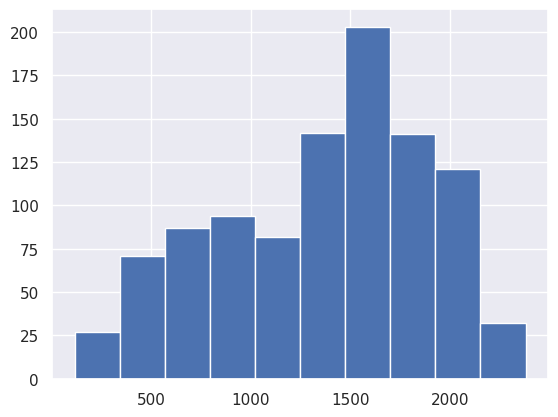

In [ ]:
df_alloy['Lifespan'].hist()

## 14.1 Introducing a binary target

In [ ]:
# Assuming 'Lifespan' is the column representing lifespan values
df_alloy['Lifespan'] = df_alloy['Lifespan'].apply(lambda x: 'Non defective' if x > 1500 else 'Defective')

In [ ]:
df_alloy.head(2)

Lifespan partType microstructure  coolingRate  quenchTime  forgeTime  \
0      Defective    Blade       colGrain           25    4.460592   7.937116   
1  Non defective    Blade    singleGrain            9    1.425973   2.432948   

   smallDefects  largeDefects  sliverDefects seedLocation    castType  
0            22             0              7          Top  Investment  
1             2             0              0       Bottom         Die

## 14.2 Dataset split into train test and validation

In [ ]:
X = df_alloy.loc[:, df_alloy.columns != 'Lifespan']
y = df_alloy.loc[:, df_alloy.columns == 'Lifespan']

In [ ]:
train_holdout_ratio = 0.8
val_holdout_ratio = 0.1
test_holdout_ratio = 0.1

# 20% holdout oversampler-stratified sapling
x_train_val, x_test, y_train_val, y_test = train_test_split(X, y, test_size = test_holdout_ratio, shuffle=True, random_state=0, stratify=y)
print(color.BOLD + "Size of the test features : {}\nSize of test target : {} ".format(x_test.shape,y_test.shape))

x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size = val_holdout_ratio, shuffle=True, random_state=0, stratify=y_train_val)
print(color.BOLD + "Size of the train features : {}\nSize of train target : {} ".format(x_train.shape,y_train.shape))
print(color.BOLD + "Size of the validation features : {}\nSize of validation target : {} ".format(x_val.shape,y_val.shape))

Size of the test features : (100, 10)
Size of test target : (100, 1) 
Size of the train features : (810, 10)
Size of train target : (810, 1) 
Size of the validation features : (90, 10)
Size of validation target : (90, 1) 


## 14.3 Class Imbalance

In [ ]:
sampleClassBias = y_train['Lifespan'].value_counts()

In [ ]:
sampleClassBias

Defective        428
Non defective    382
Name: Lifespan, dtype: int64

<Axes: xlabel='Lifespan', ylabel='count'>

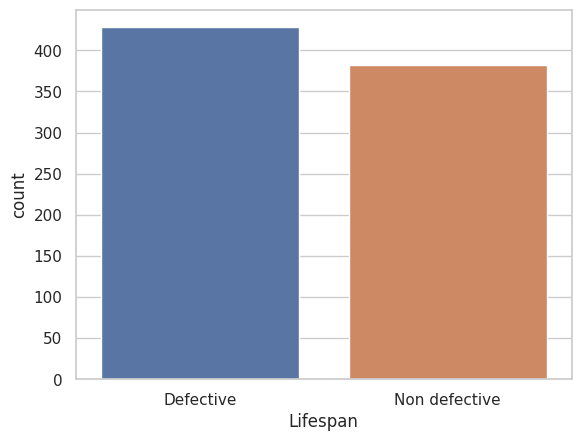

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x='Lifespan', data=y_train)

## 14.2 Apply Label encoding to the categorical target

In [ ]:
lblEncoder_y = LabelEncoder()
# apply LblEncoder object to our categorical variables (columns - 'school') using the fit_transform method. This returns the column encoded.
y_train['Lifespan'] = lblEncoder_y.fit_transform(y_train['Lifespan'])
y_val['Lifespan'] = lblEncoder_y.transform(y_val['Lifespan'])
y_test['Lifespan'] = lblEncoder_y.transform(y_test['Lifespan'])

In [ ]:
encode_x_train = x_train.copy()
encode_x_val = x_val.copy()
encode_x_test = x_test.copy()

In [ ]:
lblEncoder_X = LabelEncoder()
# apply LblEncoder object to our categorical variables (columns - 'school') using the fit_transform method. This returns the column encoded.
encode_x_train['seedLocation'] = lblEncoder_X.fit_transform(encode_x_train['seedLocation'])
encode_x_val['seedLocation'] = lblEncoder_X.transform(encode_x_val['seedLocation'])
encode_x_test['seedLocation'] = lblEncoder_X.transform(encode_x_test['seedLocation'])

In [ ]:
categorical_columns = ['partType', 'microstructure','castType']
ct = ColumnTransformer(
    [
        (
            "onehot_categorical",
            OneHotEncoder(),
            categorical_columns,
        ),
    ],
    remainder="passthrough", #--> what to do with the non-transformed columns. passthrough=keep them
    verbose_feature_names_out=False #--> this keeps columns names simple. Try what happens if you set it as True
)

# the output is an numpy array with the encoded columns
encoded_array_x_train = ct.fit_transform(encode_x_train)
encoded_array_x_val = ct.transform(encode_x_val)
encoded_array_x_test = ct.transform(encode_x_test)

encoded_col_names= ct.get_feature_names_out()
print(color.BOLD + "Total columns after encoding: {} \nAll column names in the dataset: \n{}".format(len(encoded_col_names),encoded_col_names))

x_train_encoded = pd.DataFrame(encoded_array_x_train, columns=encoded_col_names)
x_val_encoded = pd.DataFrame(encoded_array_x_val, columns=encoded_col_names)
x_test_encoded = pd.DataFrame(encoded_array_x_test, columns=encoded_col_names)

Total columns after encoding: 17 
All column names in the dataset: 
['partType_Blade' 'partType_Block' 'partType_Nozzle' 'partType_Valve'
 'microstructure_colGrain' 'microstructure_equiGrain'
 'microstructure_singleGrain' 'castType_Continuous' 'castType_Die'
 'castType_Investment' 'coolingRate' 'quenchTime' 'forgeTime'
 'smallDefects' 'largeDefects' 'sliverDefects' 'seedLocation']


In [ ]:
x_test_encoded.head(2)

partType_Blade  partType_Block  partType_Nozzle  partType_Valve  \
0             1.0             0.0              0.0             0.0   
1             0.0             0.0              0.0             1.0   

   microstructure_colGrain  microstructure_equiGrain  \
0                      0.0                       1.0   
1                      0.0                       1.0   

   microstructure_singleGrain  castType_Continuous  castType_Die  \
0                         0.0                  1.0           0.0   
1                         0.0                  1.0           0.0   

   castType_Investment  coolingRate  quenchTime  forgeTime  smallDefects  \
0                  0.0         20.0    2.821883   2.752449          15.0   
1                  0.0         27.0    0.550179   1.939917          21.0   

   largeDefects  sliverDefects  seedLocation  
0           0.0            0.0           1.0  
1           0.0            0.0           0.0

In [ ]:
x_train_encoded.shape

(810, 17)

In [ ]:
y_train.shape

(810, 1)

In [ ]:
x_train_encoded_scaled = x_train_encoded.copy()
x_val_encoded_scaled = x_val_encoded.copy()
x_test_encoded_scaled = x_test_encoded.copy()

scaler_num= StandardScaler().set_output(transform="pandas")

x_train_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']]=scaler_num.fit_transform(x_train_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']])
x_val_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']]=scaler_num.transform(x_val_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']])
x_test_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']]=scaler_num.transform(x_test_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']])
x_train_encoded_scaled[['coolingRate', 'quenchTime','forgeTime','smallDefects','largeDefects','sliverDefects']].head(3)

coolingRate  quenchTime  forgeTime  smallDefects  largeDefects  \
0     0.990495    0.168070  -0.848394      1.922462     -0.216317   
1    -0.580590   -0.225354   0.395150     -0.399338     -0.216317   
2     1.252342    0.500228   0.130902      0.578262     -0.216317   

   sliverDefects  
0      -0.215323  
1      -0.215323  
2      -0.215323

## 14.3 Apply into classification models

### 14.3.1 Logistic Regression

Best Hyperparameters: {'logistic__C': 1, 'logistic__penalty': 'l2', 'logistic__solver': 'liblinear'}
Best Model: Pipeline(steps=[('logistic', LogisticRegression(C=1, solver='liblinear'))])
Accuracy: 0.8111
Precision: 0.8102
Recall: 0.8110
Balanced Accuracy: 0.8110
Macro averaged F1 Score: 0.8105
Weighted averaged F1 Score: 0.8112
Confusion matrix: 
 [[0.43333333 0.1       ]
 [0.08888889 0.37777778]]
              precision    recall  f1-score   support

           0       0.83      0.81      0.82        48
           1       0.79      0.81      0.80        42

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



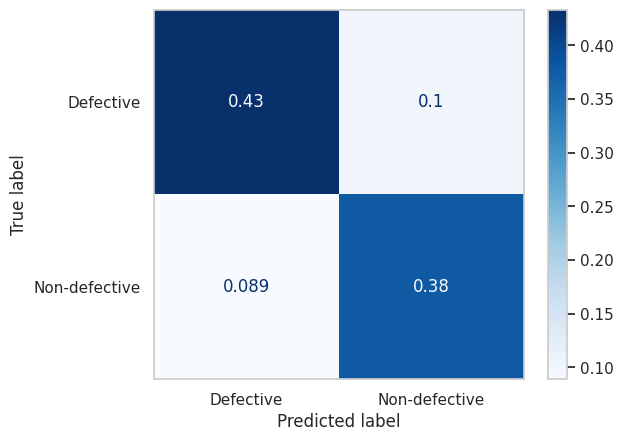

In [ ]:
###################################
# Initialise Model and preprocessors
###################################

# Define hyperparameter grid for GridSearchCV
param_grid = {
    'logistic__C': [0.001, 0.01, 0.1, 1, 10, 100],  # Values for regularization parameter C
    'logistic__solver': ['liblinear', 'lbfgs', 'sag', 'newton-cg'],  # Values for solver algorithm
    'logistic__penalty': ['l1', 'l2']  # Values for penalty norm
}

# Initialize Logistic Regression model
logistic = LogisticRegression()

# Create a pipeline with Logistic Regression
pipeline = Pipeline([
    ('logistic', logistic)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########
best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)



# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

### 14.3.2 Support Vector Machines

Best Hyperparameters: {'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}
Best Model: Pipeline(steps=[('svc', SVC(C=10, gamma=0.1, random_state=59))])
Accuracy: 0.8778
Precision: 0.8778
Recall: 0.8795
Balanced Accuracy: 0.8795
Macro averaged F1 Score: 0.8776
Weighted averaged F1 Score: 0.8779
Confusion matrix: 
 [[0.45555556 0.07777778]
 [0.04444444 0.42222222]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        48
           1       0.84      0.90      0.87        42

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



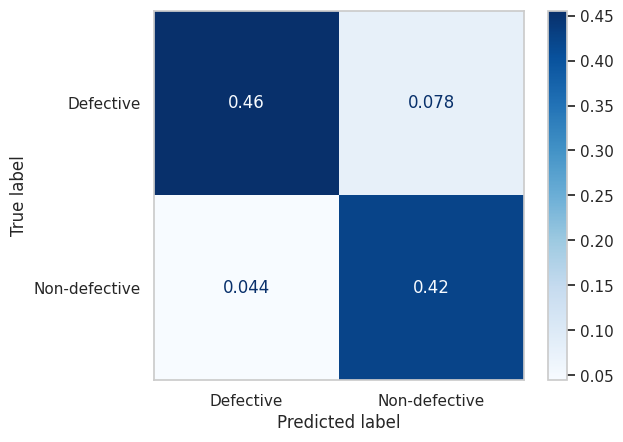

In [ ]:
###################################
# Initialise Model and preprocessors
###################################

# Hyperparameter grid for GridSearchCV
param_grid = {
    'svc__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'svc__C': [0.1, 1, 10],
    'svc__gamma': [0.1, 1, 10]
}

# Initialize Model (no preprocessing needed)
svm = SVC(random_state=59)

# Create a pipeline with preprocessing and SVM
pipeline = Pipeline([
    ('svc', svm)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########

best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

### 14.3.3 Naive Bayes

Best Hyperparameters: {'gnb__var_smoothing': 1e-09}
Best Model: Pipeline(steps=[('gnb', GaussianNB())])
Accuracy: 0.7889
Precision: 0.7896
Recall: 0.7857
Balanced Accuracy: 0.7857
Macro averaged F1 Score: 0.7868
Weighted averaged F1 Score: 0.7882
Confusion matrix: 
 [[0.44444444 0.08888889]
 [0.12222222 0.34444444]]
              precision    recall  f1-score   support

           0       0.78      0.83      0.81        48
           1       0.79      0.74      0.77        42

    accuracy                           0.79        90
   macro avg       0.79      0.79      0.79        90
weighted avg       0.79      0.79      0.79        90



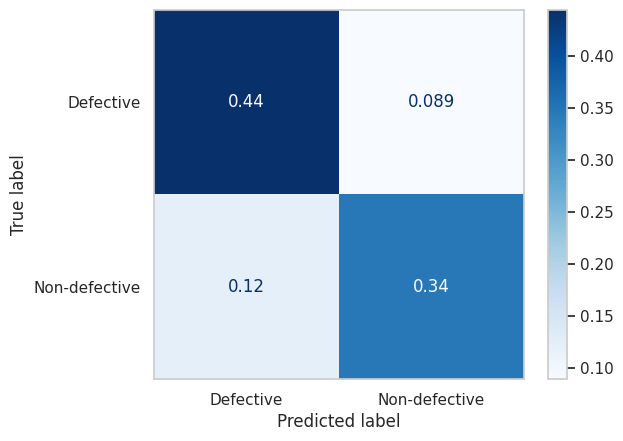

In [ ]:
###################################
# Initialise Model and preprocessors
###################################


# Hyperparameter grid for GridSearchCV
param_grid = {
    'gnb__var_smoothing': [1e-9, 1e-7, 1e-5]  # Values for the variance smoothing parameter
}

# Initialize Gaussian Naive Bayes
gnb = GaussianNB()

# Create a pipeline with the Naive Bayes estimator
pipeline = Pipeline([
    ('gnb', gnb)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########
best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

### 14.3.4 k-Nearest Neighbours

Best Hyperparameters: {'knn__metric': 'manhattan', 'knn__n_neighbors': 7, 'knn__weights': 'uniform'}
Best Model: Pipeline(steps=[('knn',
                 KNeighborsClassifier(metric='manhattan', n_neighbors=7))])
Accuracy: 0.8778
Precision: 0.8778
Recall: 0.8795
Balanced Accuracy: 0.8795
Macro averaged F1 Score: 0.8776
Weighted averaged F1 Score: 0.8779
Confusion matrix: 
 [[0.45555556 0.07777778]
 [0.04444444 0.42222222]]
              precision    recall  f1-score   support

           0       0.91      0.85      0.88        48
           1       0.84      0.90      0.87        42

    accuracy                           0.88        90
   macro avg       0.88      0.88      0.88        90
weighted avg       0.88      0.88      0.88        90



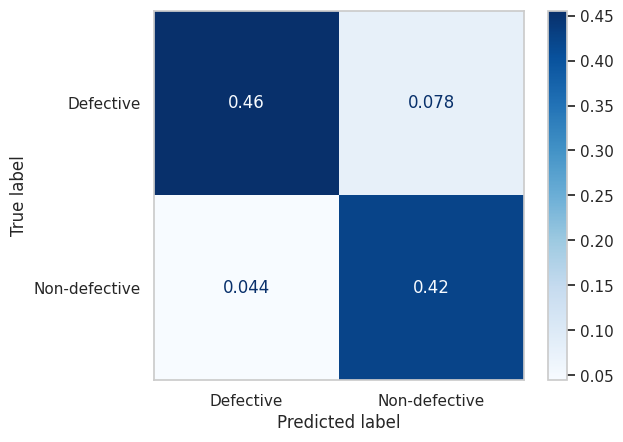

In [ ]:
###################################
# Initialise Model and preprocessors
###################################

# Hyperparameter grid for GridSearchCV - Parameters for KNeighborsClassifier
param_grid = {
    'knn__n_neighbors': [3, 5, 7],  # Values for the number of neighbors
    'knn__weights': ['uniform', 'distance'],  # Type of weight function
    'knn__metric': ['euclidean', 'manhattan']  # Distance metric
}

# Initialize Model (no preprocessing needed)
knn = KNeighborsClassifier()

# Create a pipeline with preprocessing and KNN classifier
pipeline = Pipeline([
    ('knn', knn)
])
# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########
best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

### 14.3.5 Decision Tree

Best Hyperparameters: {'tree__criterion': 'entropy', 'tree__max_depth': 5, 'tree__min_samples_leaf': 10, 'tree__min_samples_split': 2}
Best Model: Pipeline(steps=[('tree',
                 DecisionTreeClassifier(criterion='entropy', max_depth=5,
                                        min_samples_leaf=10,
                                        random_state=59))])
Accuracy: 0.9556
Precision: 0.9550
Recall: 0.9568
Balanced Accuracy: 0.9568
Macro averaged F1 Score: 0.9555
Weighted averaged F1 Score: 0.9556
Confusion matrix: 
 [[0.5        0.03333333]
 [0.01111111 0.45555556]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.93      0.98      0.95        42

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



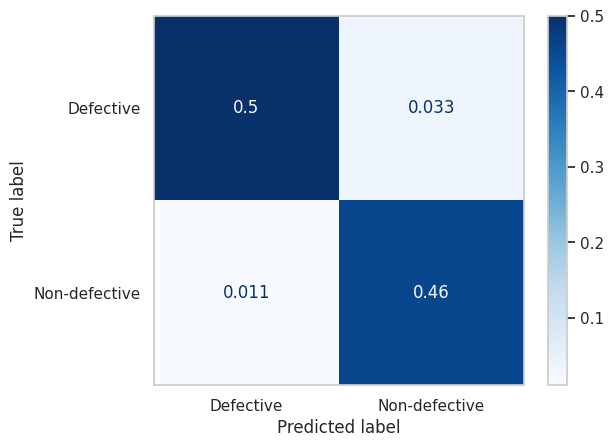

In [ ]:
###################################
# Initialise Model and preprocessors
###################################

param_grid = {
    'tree__max_depth': [5, 10, 30],  # Values for max depth of the DecisionTreeClassifier
    'tree__min_samples_split': [2, 10],  # Values for min_samples_split of DecisionTreeClassifier
    'tree__min_samples_leaf': [2, 10],  # Values for min_samples_leaf of DecisionTreeClassifier
    'tree__criterion': ['gini', 'entropy']  # Values for criterion of DecisionTreeClassifier
}

# Initialize Model (no preprocessing needed)
tree = DecisionTreeClassifier(random_state=59)

# Create a pipeline with preprocessing and Decision Tree classification
pipeline = Pipeline([
    ('tree', tree)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########
best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

### 14.3.6 Random Forests

Best Hyperparameters: {'forest__max_depth': 10, 'forest__min_samples_leaf': 2, 'forest__min_samples_split': 2, 'forest__n_estimators': 100}
Best Model: Pipeline(steps=[('forest',
                 RandomForestClassifier(max_depth=10, min_samples_leaf=2,
                                        random_state=59))])
Accuracy: 0.9556
Precision: 0.9554
Recall: 0.9554
Balanced Accuracy: 0.9554
Macro averaged F1 Score: 0.9554
Weighted averaged F1 Score: 0.9556
Confusion matrix: 
 [[0.51111111 0.02222222]
 [0.02222222 0.44444444]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.95      0.95      0.95        42

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



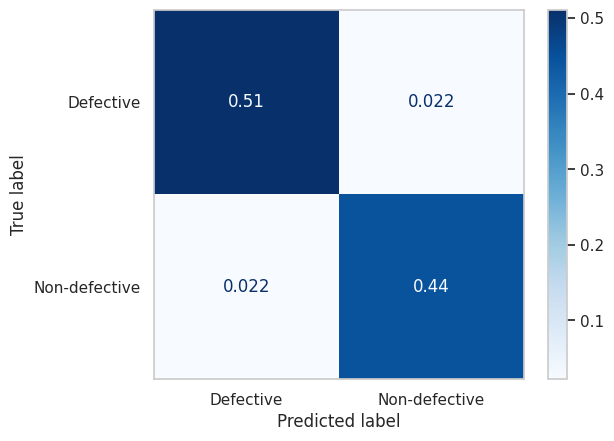

In [ ]:
###################################
# Initialise Model and preprocessors
###################################

# Hyperparameter grid for GridSearchCV
param_grid = {
    'forest__n_estimators': [10, 30, 100],  # Values for n_estimators
    'forest__max_depth': [5, 10, 30],  # Values for DecisionTreeRegressor max depth
    'forest__min_samples_split': [2, 10],  # Values for DecisionTreeRegressor min_samples_split
    'forest__min_samples_leaf': [2, 10],  # Values for DecisionTreeRegressor min_samples_split
}

# Initialize Model (no preprocessing needed)
forest = RandomForestClassifier(random_state=59)

# Create a pipeline with preprocessing and Decision Tree regression
pipeline = Pipeline([
    ('forest', forest)
])

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model with GridSearchCV
grid_search.fit(x_train_encoded_scaled, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Print the best model
print("Best Model:", best_model)
# Get the results as a DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

# Display the relevant columns
relevant_columns = ['params', 'mean_test_score', 'std_test_score']
cv_results[relevant_columns].sort_values(by='mean_test_score', ascending=False)

##########
# Evaluate
##########
best_model = grid_search.best_estimator_
#best_model = RandomForestClassifier(n_estimators=100, max_depth = 5, min_samples_split = 10, min_samples_leaf = 10, random_state=59)
# Train the best model on the full training set
best_model.fit(x_train_encoded_scaled, y_train)
# Predict test data
y_pred_val = best_model.predict(x_val_encoded_scaled)

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('Accuracy: {:.4f}'.format(accuracy_score(y_val, y_pred_val)))
print('Precision: {:.4f}'.format(precision_score(y_val, y_pred_val, average='macro')))
print('Recall: {:.4f}'.format(recall_score(y_val, y_pred_val, average='macro')))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_val, y_pred_val)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_val, y_pred_val, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_val, y_pred_val, normalize='all')
print(f'Confusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
# Note, the Precision/Recall/F1 in the report match the positive class (1.0) in the report
print(sklearn.metrics.classification_report(y_val, y_pred_val))

## 14.4 Evaluate the final model


Accuracy: 0.9400
Precision: 0.9020
Recall: 0.9787
F1 Score: 1.0000
Balanced Accuracy: 0.9422
Macro averaged F1 Score: 0.9400
Weighted averaged F1 Score: 0.9400

Confusion matrix: 
 [[0.48 0.05]
 [0.01 0.46]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.91      0.94        53
           1       0.90      0.98      0.94        47

    accuracy                           0.94       100
   macro avg       0.94      0.94      0.94       100
weighted avg       0.94      0.94      0.94       100



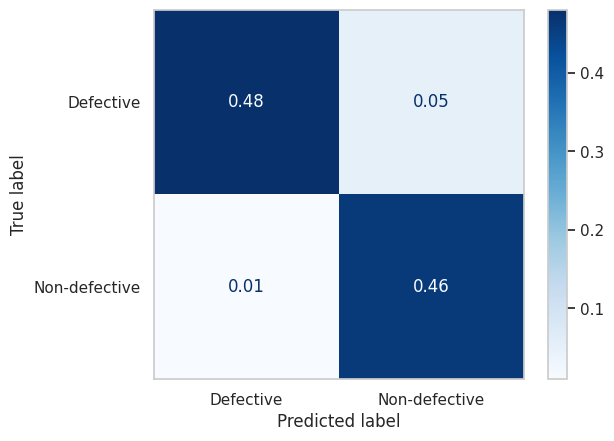

In [ ]:
# now we want to evalaute our final model!
######
# Test
######

best_model.fit(x_train_encoded_scaled, y_train)
# Preprocess test data
#X_test = scaler.transform(x_test_encoded)
# Predict test data
y_pred_test = best_model.predict(x_test_encoded_scaled)

# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test, average='macro')))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test, average='weighted')))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))

# 15. Comparison with a naive baseline


Accuracy: 0.4700
Precision: 0.4700
Recall: 1.0000
F1 Score: 1.0000
Balanced Accuracy: 0.5000
Macro averaged F1 Score: 0.6395
Weighted averaged F1 Score: 0.6395

Confusion matrix: 
 [[0.   0.53]
 [0.   0.47]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        53
           1       0.47      1.00      0.64        47

    accuracy                           0.47       100
   macro avg       0.23      0.50      0.32       100
weighted avg       0.22      0.47      0.30       100



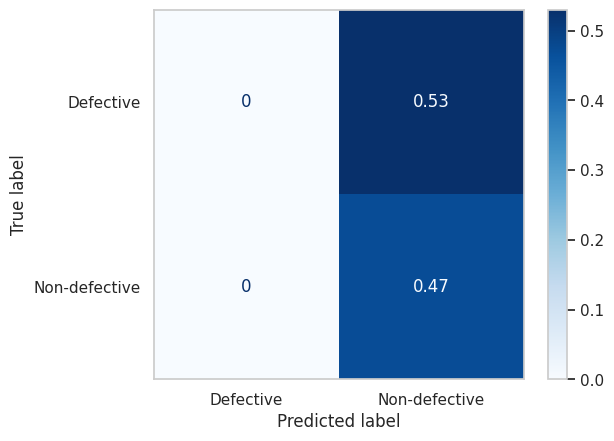

In [ ]:
# Here we are just going to assume that every point is positive (malignant)
# While this does give us perfect recall, I think we agree that telling 60% of people
# incorrectly that they have cancer is not ideal!

y_pred_test = np.ones_like(y_test)

##########
# Evaluate
##########

# Note, because this is multivariable classification I've not included a scatter plot of the decision surface.

# Accuracy metrics - 1 is an perfect prediction
print('\nAccuracy: {:.4f}'.format(accuracy_score(y_test, y_pred_test)))
print('Precision: {:.4f}'.format(precision_score(y_test, y_pred_test)))
print('Recall: {:.4f}'.format(recall_score(y_test, y_pred_test)))
print('F1 Score: {:.4f}'.format(f1_score(y_test, y_test)))
print('Balanced Accuracy: {:.4f}'.format(balanced_accuracy_score(y_test, y_pred_test)))
print('Macro averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
print('Weighted averaged F1 Score: {:.4f}'.format(f1_score(y_test, y_pred_test)))
# Confusion matrix
confusion_mat = sklearn.metrics.confusion_matrix(y_test, y_pred_test, normalize='all')
print(f'\nConfusion matrix: \n', confusion_mat)
# Visualize the confusion matrix
sklearn.metrics.ConfusionMatrixDisplay(confusion_mat, display_labels=['Defective', 'Non-defective']).plot(cmap=plt.cm.Blues)
plt.grid(False)
# The classification report, which contains accuracy, precision, recall, F1 score
print(f'\nClassification Report:')
print(sklearn.metrics.classification_report(y_test, y_pred_test))

# 16. CNN

## 16.1 Import Images and Metadata

In [ ]:
!unzip '/content/drive/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset2_images.zip'

Archive:  /content/drive/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset2_images.zip
replace COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv  
 extracting: COMP1801_CourseworkDataset2_images/scan_0.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_1.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_10.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_100.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_101.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_102.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_103.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_104.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_105.png  
 extracting: COMP1801_CourseworkDataset2_images/scan_106.png  
 extracting: COMP1801_Coursewor

In [ ]:
# Load metadata from the CSV file - this allows us to know what class each picture belongs to.
metadata = pd.read_csv("COMP1801_CourseworkDataset2_images/COMP1801_CourseworkDataset2_images_metadata.csv")

In [ ]:
metadata.head(3)

Image Filename Defect      Type
0     scan_0.png    Yes  Splinter
1     scan_1.png     No      None
2     scan_2.png    Yes  Multiple

In [ ]:
# Define the directory where your images are located (in colab in our case)
image_directory = "COMP1801_CourseworkDataset2_images"

## 16.2 Links the image names to the class label

In [ ]:
# run a loop that combines our image data (as a matrix of grey scale) with our labels into a single array, joining based on teh file name.
# Define image size - this means we can rescale all our images to be the same size
image_size = (100, 100)

# Create lists to store image data and labels
images = []
labels = []

# Load and preprocess images
for index, row in metadata.iterrows():
  image_path = os.path.join(image_directory, row['Image Filename'])
  image = load_img(image_path, target_size=image_size)
  image_array = img_to_array(image) / 255.0  # Normalize pixel values to [0, 1], converts the loaded image to a NumPy array
  images.append(image_array)
  labels.append(row['Type'])

## 16.3 Visualise the dataset
This is a multi-class classification problem

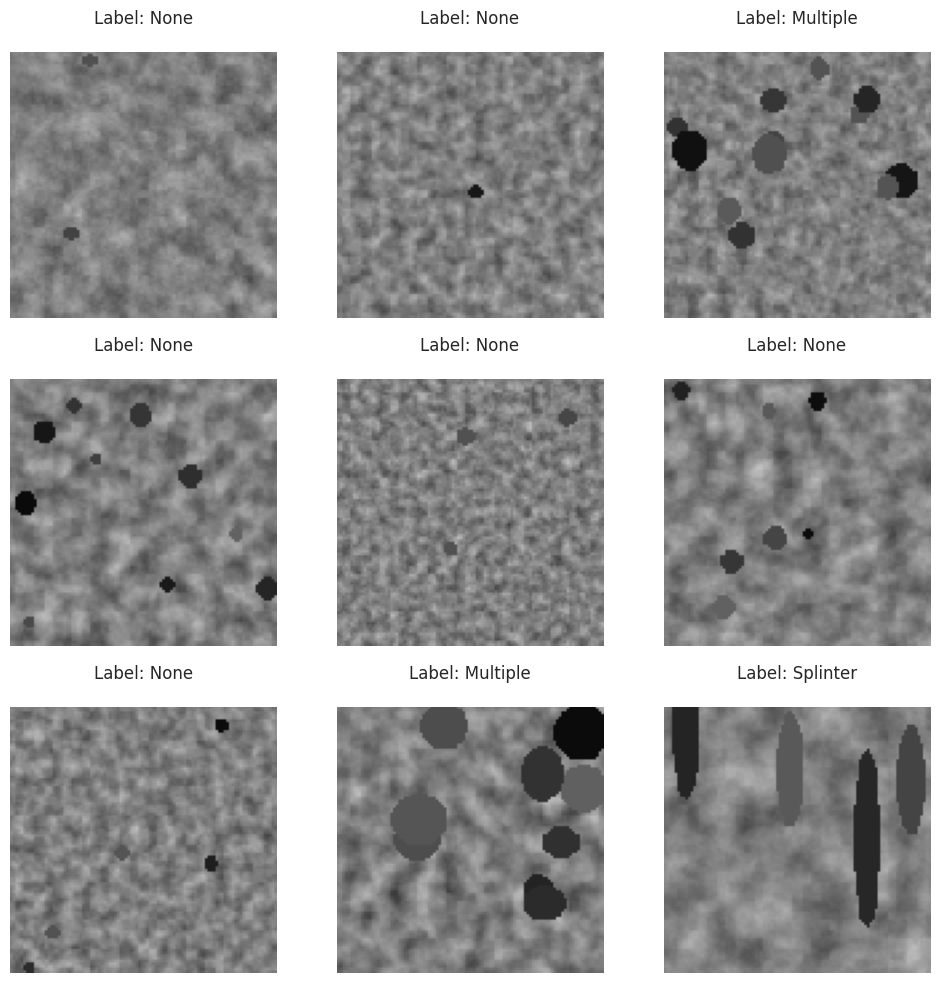

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 9

num_rows = 3
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(10, 10))

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(images[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"Label: {labels[index]}\n"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()

In [ ]:
class_mapping = {'Large': 0, 'None': 1, 'Multiple': 2, 'Splinter': 3}
labels = [class_mapping[label] for label in labels]

images = np.array(images)
labels = np.array(labels)

if len(images) != len(labels):
    raise ValueError("Number of images and labels does not match.")

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No valid data found for splitting.")

#split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)
#split the remaining training data into training and validation sets (90% train, 10% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

print(color.BOLD + "Size of the train features: {}\nSize of train target: {}".format(X_train.shape, y_train.shape))
print(color.BOLD + "Size of the validation features: {}\nSize of validation target: {}".format(X_valid.shape, y_valid.shape))
print(color.BOLD + "Size of the test features: {}\nSize of test target: {}".format(X_test.shape, y_test.shape))

Size of the train features: (711, 100, 100, 3)
Size of train target: (711,)
Size of the validation features: (89, 100, 100, 3)
Size of validation target: (89,)
Size of the test features: (200, 100, 100, 3)
Size of test target: (200,)


##2.1 CNN Architecture

Here will be a summary of all the layers you are likely to want to use in a CNN. I am going to continue using the functional API of creating NNs, but you can access the same layers using the sequential api if you wish.

### Dense Layer
`tf.keras.layers.Dense()` Normal dense layer ( = hidden = fully connected layer): each node/neuron in this layer is connected to each node in the input layer. These were the only type of Neural Network Layer we were using last week. <br>
>The two arguments passes below in dense layer are *units* and *activation* (activation function).<br>
* **units** corresponds to the number of nodes in the layer<br>
* **activation** is an element-wise activation function.
    * **'relu'**: This activation function converts every negative value to 0 and positive remains the same
    * **'softmax'**: This function takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities proportional to the exponentials of the input numbers. The elements of the output vector are in range (0, 1) and sum to 1.
    * **'sigmoid'**: Applies the sigmoid activation function. For small values (<-5), sigmoid returns a value close to zero, and for large values (>5) the result of the function gets close to 1.
    * **'tanh'**: Applies the hyperbolic tangient function. The range of the tanh function is from (-1 to 1).
    * **None**: It means there is no activation function. In other words this layer produces linear output.

    
### Flatten Layer
`tf.keras.layers.Flatten()` flattens the input. This is required to get our multidimensional image filters into a flat '1D' form that our dense layers can use.<br>
For input of `(batch_size, height, width, depth)` the output converts to `(batch_size, height * width * depth)`


### Convolutional Layer
`tf.keras.layers.Conv2D()` Convolution layer takes the following argument
> * **filters** Number of different types of convolutions used. Initially they are set to some predefined convolution and slowly trained to find better features in the image.
* **kernel_size** An integer or tuple/list of 2 integers, specifying the height and width of the 2D convolution window. Can be a single integer to specify the same value for all spatial dimensions.
* **strides** An integer or tuple/list of 2 integers, specifying the strides of the convolution along the height and width. Can be a single integer to specify the same value for all spatial dimensions. Default value is (1,1)
* **padding** one of "valid" or "same" (case-insensitive):
  * **'VALID'**: it means no padding and it assumes that all the dimensions are valid so that the input image gets fully covered by a filter and the stride specified by you.
  * **'SAME'**: it applies padding to the input image so that the input image gets fully covered by the filter and specified stride. It is called SAME because, for stride 1 , the output will be the same as the input.
* **activation** activation function  (typical options were explained before for 'dense' layer). Default value is: None
* **use_bias** Boolean, whether the layer uses a bias vector. Default value is: True
* **input_shape** Size of each input to the convolution.
* Note: There are also `1D` and `3D` versions of the convolutional layer, which may be required depending on your data type.

### Pooling
`tf.keras.layers.MaxPooling2D()` Max Pooling layer to reduce the size of the input. This layer takes the following arguments:
> * **pool_size** Dimension of pooling kernel. Default value is (2, 2)
* **strides** Integer, tuple of 2 integers, or None. Strides values. Specifies how far the pooling window moves for each pooling step. Default value is: None
* **padding** One of "valid" or "same" (case-insensitive). "valid" adds no zero padding. "same" adds padding such that if the stride is 1, the output shape is the same as input shape. Default value is "valid".<br>
`tf.keras.layers.AveragePooling2D()` Average Pooling layer to reduce the size of the input.
* Note: There are also `1D` and `3D` versions of the pooling layer, which may be required depending on your data type.

### Regularisation:
#### Kernal Regularizer
We can apply L1/L2 regualrisation to our dense layers.
Define a kernal regularizer:<br>
`kernel_regularizer = L1(l1=alpha) #Lasso`<br>
`kernel_regularizer = L2(l2=alpha) #Ridge`<br>
which we can then add to the end of our dense layers:<br>
`Dense(..., kernel_regularizer=kernel_regularizer)`


#### Dropout
`tf.keras.layers.Dropout()` Applies Dropout to the input.
The Dropout layer randomly sets input units to 0 with a frequency of 'rate' at each step during training time, which helps prevent overfitting.
It takes the following argument:
> * **rate**: Float between 0 and 1. Fraction of the input units to drop.




## Compiling the model
`model.compile()` Sets up the optimiser, loss and metrics configuration.
> * **optimizer**: updates the parameter of the Neural Network.
* **loss**: Measures the error in our model.
* **metrics**: Used to judge the model. The difference between metrics and loss is that metrics are **not** used to evaluate the model and update the weights while training, whereas loss evaluates the model error while training and helps optimizer reduce the error. As such the metrics are entirely for your benefit as a data scientist to aid your understanding of the models performance.

In [ ]:
def build_model(input_shape, num_classes, n_conv_blocks=4, n_dense_blocks = 2, DROPOUT=False):
    inputs = tf.keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        #Rectified Linear Unit (ReLU) activation is preferred in most cases for its simplicity and effectiveness in training deep networks.
        x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
        #Separating the activation part from the convolution part adds flexibility.
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # final convolution block (Flatten Layer)
    x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu')(x)
    #x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        # For complex tasks or larger input data, having more neurons in the dense layers can help capture more intricate patterns and relationships.
        x = layers.Dense(50, activation='relu')(x) #1000
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)


In [ ]:
desired_image_size = (100, 100)
num_classes=4

# Build model for grayscale images (100x100 pixels)
model = build_model(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model.summary()

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_22 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_21 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_86 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_86 (MaxPooli  (None, 50, 50, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_87 (Conv2D)          (None, 50, 50, 64)        36928     
                                                                 
 max_pooling2d_87 (MaxPooli  (None, 25, 25, 64)        0         
 ng2D)                                                    


Training for 10 epochs with batch size 8...
Epoch 1/10
89/89 [==============================] - 3s 11ms/step - loss: 1.0649 - accuracy: 0.6259 - val_loss: 1.0499 - val_accuracy: 0.5955
Epoch 2/10
89/89 [==============================] - 1s 8ms/step - loss: 1.0032 - accuracy: 0.6301 - val_loss: 0.9981 - val_accuracy: 0.5955
Epoch 3/10
89/89 [==============================] - 1s 8ms/step - loss: 0.9860 - accuracy: 0.6301 - val_loss: 1.0039 - val_accuracy: 0.5955
Epoch 4/10
89/89 [==============================] - 1s 8ms/step - loss: 0.9906 - accuracy: 0.6301 - val_loss: 1.0340 - val_accuracy: 0.5955
Epoch 5/10
89/89 [==============================] - 1s 8ms/step - loss: 0.9819 - accuracy: 0.6301 - val_loss: 1.0034 - val_accuracy: 0.5955
Epoch 6/10
89/89 [==============================] - 1s 8ms/step - loss: 0.9808 - accuracy: 0.6301 - val_loss: 0.9963 - val_accuracy: 0.5955
Epoch 7/10
89/89 [==============================] - 1s 7ms/step - loss: 0.9829 - accuracy: 0.6301 - val_loss: 0.99

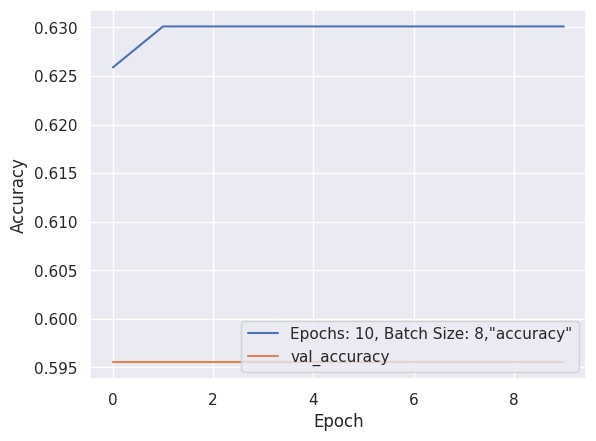

7/7 [==============================] - 0s 7ms/step - loss: 1.0230 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 8: 0.6150000095367432

Training for 10 epochs with batch size 32...
Epoch 1/10
23/23 [==============================] - 1s 20ms/step - loss: 0.9772 - accuracy: 0.6301 - val_loss: 1.0130 - val_accuracy: 0.5955
Epoch 2/10
23/23 [==============================] - 0s 18ms/step - loss: 0.9755 - accuracy: 0.6301 - val_loss: 0.9985 - val_accuracy: 0.5955
Epoch 3/10
23/23 [==============================] - 0s 18ms/step - loss: 0.9708 - accuracy: 0.6301 - val_loss: 1.0019 - val_accuracy: 0.5955
Epoch 4/10
23/23 [==============================] - 0s 18ms/step - loss: 0.9765 - accuracy: 0.6301 - val_loss: 0.9940 - val_accuracy: 0.5955
Epoch 5/10
23/23 [==============================] - 0s 18ms/step - loss: 0.9699 - accuracy: 0.6301 - val_loss: 1.0158 - val_accuracy: 0.5955
Epoch 6/10
23/23 [==============================] - 0s 18ms/step - loss: 0.9761 - accuracy: 

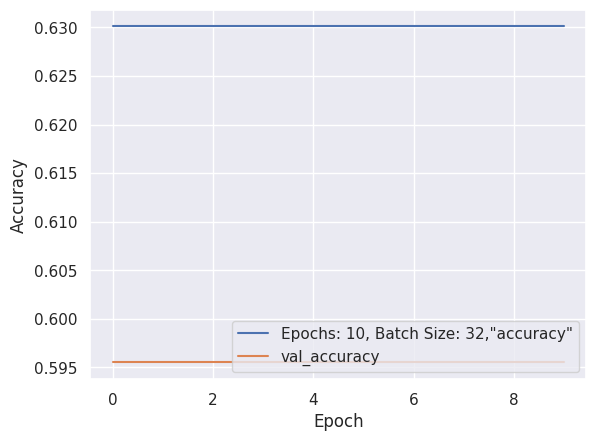

7/7 [==============================] - 0s 8ms/step - loss: 1.0217 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 32: 0.6150000095367432

Training for 10 epochs with batch size 64...
Epoch 1/10
12/12 [==============================] - 2s 37ms/step - loss: 0.9714 - accuracy: 0.6301 - val_loss: 0.9780 - val_accuracy: 0.5955
Epoch 2/10
12/12 [==============================] - 0s 31ms/step - loss: 0.9298 - accuracy: 0.6301 - val_loss: 1.0027 - val_accuracy: 0.5955
Epoch 3/10
12/12 [==============================] - 0s 32ms/step - loss: 1.0114 - accuracy: 0.6301 - val_loss: 1.0007 - val_accuracy: 0.5955
Epoch 4/10
12/12 [==============================] - 0s 31ms/step - loss: 0.9749 - accuracy: 0.6301 - val_loss: 1.0303 - val_accuracy: 0.5955
Epoch 5/10
12/12 [==============================] - 0s 32ms/step - loss: 0.9887 - accuracy: 0.6301 - val_loss: 1.0327 - val_accuracy: 0.5955
Epoch 6/10
12/12 [==============================] - 0s 31ms/step - loss: 1.0123 - accuracy:

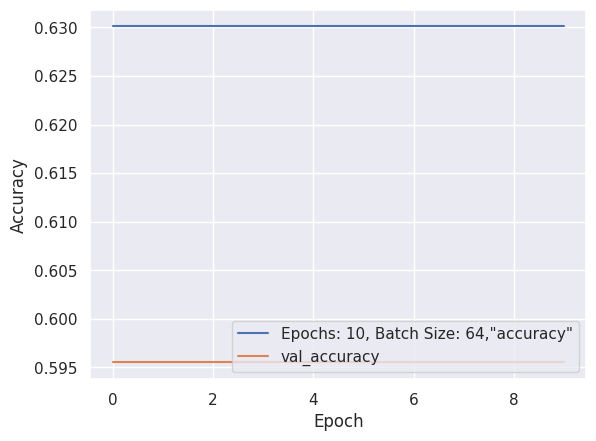

7/7 [==============================] - 0s 7ms/step - loss: 1.0285 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 64: 0.6150000095367432

Training for 20 epochs with batch size 8...
Epoch 1/20
89/89 [==============================] - 1s 8ms/step - loss: 1.0050 - accuracy: 0.6301 - val_loss: 1.0040 - val_accuracy: 0.5955
Epoch 2/20
89/89 [==============================] - 1s 7ms/step - loss: 1.0066 - accuracy: 0.6301 - val_loss: 1.0175 - val_accuracy: 0.5955
Epoch 3/20
89/89 [==============================] - 1s 7ms/step - loss: 0.9849 - accuracy: 0.6301 - val_loss: 1.0225 - val_accuracy: 0.5955
Epoch 4/20
89/89 [==============================] - 1s 7ms/step - loss: 0.9965 - accuracy: 0.6301 - val_loss: 0.9945 - val_accuracy: 0.5955
Epoch 5/20
89/89 [==============================] - 1s 7ms/step - loss: 0.9884 - accuracy: 0.6301 - val_loss: 1.0431 - val_accuracy: 0.5955
Epoch 6/20
89/89 [==============================] - 1s 7ms/step - loss: 0.9971 - accuracy: 0.6301

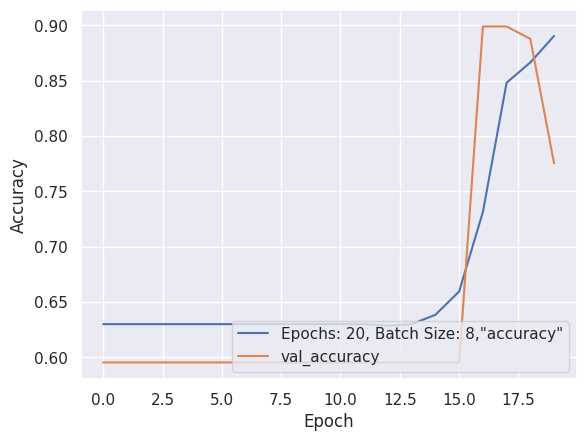

7/7 [==============================] - 0s 6ms/step - loss: 0.7082 - accuracy: 0.7750
Validation accuracy for 20 epochs with batch size 8: 0.7749999761581421

Training for 20 epochs with batch size 32...
Epoch 1/20
23/23 [==============================] - 0s 20ms/step - loss: 0.3347 - accuracy: 0.9100 - val_loss: 0.2939 - val_accuracy: 0.8764
Epoch 2/20
23/23 [==============================] - 0s 17ms/step - loss: 0.2273 - accuracy: 0.9353 - val_loss: 0.2804 - val_accuracy: 0.8989
Epoch 3/20
23/23 [==============================] - 0s 17ms/step - loss: 0.2191 - accuracy: 0.9325 - val_loss: 0.2873 - val_accuracy: 0.9101
Epoch 4/20
23/23 [==============================] - 0s 17ms/step - loss: 0.1846 - accuracy: 0.9451 - val_loss: 0.2487 - val_accuracy: 0.9101
Epoch 5/20
23/23 [==============================] - 0s 17ms/step - loss: 0.1770 - accuracy: 0.9494 - val_loss: 0.2840 - val_accuracy: 0.9101
Epoch 6/20
23/23 [==============================] - 0s 17ms/step - loss: 0.1673 - accuracy: 

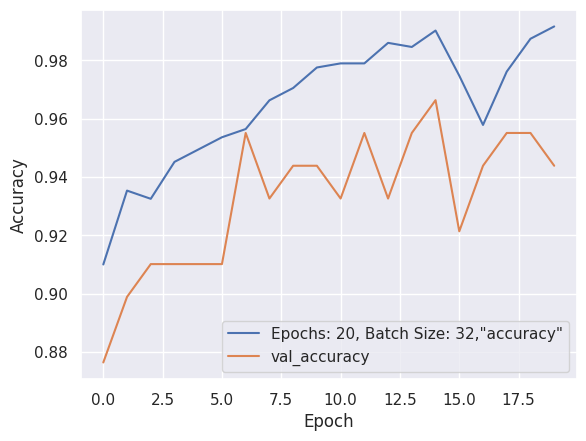

7/7 [==============================] - 0s 7ms/step - loss: 0.4547 - accuracy: 0.8900
Validation accuracy for 20 epochs with batch size 32: 0.8899999856948853

Training for 20 epochs with batch size 64...
Epoch 1/20
12/12 [==============================] - 0s 35ms/step - loss: 0.0345 - accuracy: 0.9887 - val_loss: 0.2741 - val_accuracy: 0.9438
Epoch 2/20
12/12 [==============================] - 0s 30ms/step - loss: 0.0195 - accuracy: 0.9972 - val_loss: 0.2627 - val_accuracy: 0.9438
Epoch 3/20
12/12 [==============================] - 0s 31ms/step - loss: 0.0169 - accuracy: 0.9986 - val_loss: 0.3004 - val_accuracy: 0.9551
Epoch 4/20
12/12 [==============================] - 0s 30ms/step - loss: 0.0140 - accuracy: 0.9986 - val_loss: 0.2792 - val_accuracy: 0.9438
Epoch 5/20
12/12 [==============================] - 0s 30ms/step - loss: 0.0151 - accuracy: 0.9972 - val_loss: 0.3547 - val_accuracy: 0.9438
Epoch 6/20
12/12 [==============================] - 0s 30ms/step - loss: 0.0119 - accuracy:

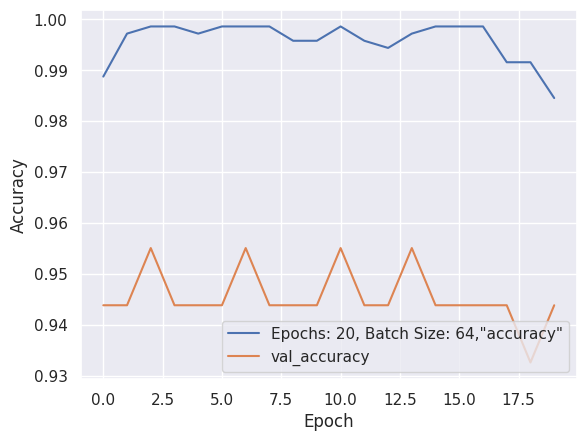

7/7 [==============================] - 0s 6ms/step - loss: 0.5401 - accuracy: 0.8900
Validation accuracy for 20 epochs with batch size 64: 0.8899999856948853

Training for 50 epochs with batch size 8...
Epoch 1/50
89/89 [==============================] - 1s 7ms/step - loss: 0.2871 - accuracy: 0.9269 - val_loss: 0.1766 - val_accuracy: 0.9438
Epoch 2/50
89/89 [==============================] - 1s 7ms/step - loss: 0.1365 - accuracy: 0.9592 - val_loss: 0.2012 - val_accuracy: 0.9213
Epoch 3/50
89/89 [==============================] - 1s 7ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.2694 - val_accuracy: 0.9438
Epoch 4/50
89/89 [==============================] - 1s 7ms/step - loss: 0.2598 - accuracy: 0.9297 - val_loss: 0.2526 - val_accuracy: 0.9551
Epoch 5/50
89/89 [==============================] - 1s 6ms/step - loss: 0.0752 - accuracy: 0.9719 - val_loss: 0.2123 - val_accuracy: 0.9326
Epoch 6/50
89/89 [==============================] - 1s 6ms/step - loss: 0.0788 - accuracy: 0.9691

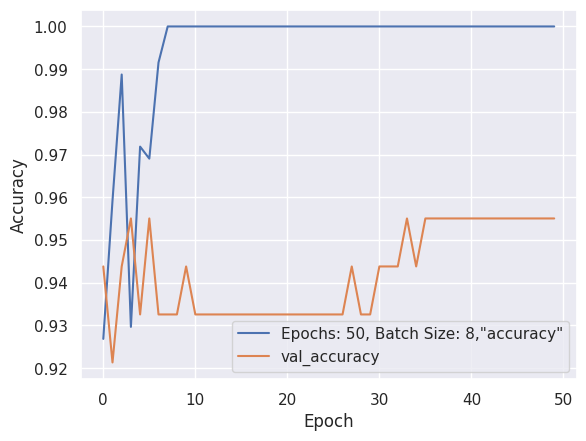

7/7 [==============================] - 0s 6ms/step - loss: 0.6405 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 8: 0.9300000071525574

Training for 50 epochs with batch size 32...
Epoch 1/50
23/23 [==============================] - 0s 18ms/step - loss: 8.3498e-06 - accuracy: 1.0000 - val_loss: 0.4923 - val_accuracy: 0.9551
Epoch 2/50
23/23 [==============================] - 0s 16ms/step - loss: 8.2042e-06 - accuracy: 1.0000 - val_loss: 0.4929 - val_accuracy: 0.9551
Epoch 3/50
23/23 [==============================] - 0s 16ms/step - loss: 8.0557e-06 - accuracy: 1.0000 - val_loss: 0.4933 - val_accuracy: 0.9551
Epoch 4/50
23/23 [==============================] - 0s 16ms/step - loss: 7.9397e-06 - accuracy: 1.0000 - val_loss: 0.4937 - val_accuracy: 0.9551
Epoch 5/50
23/23 [==============================] - 0s 16ms/step - loss: 7.8079e-06 - accuracy: 1.0000 - val_loss: 0.4940 - val_accuracy: 0.9551
Epoch 6/50
23/23 [==============================] - 0s 16ms/step - loss:

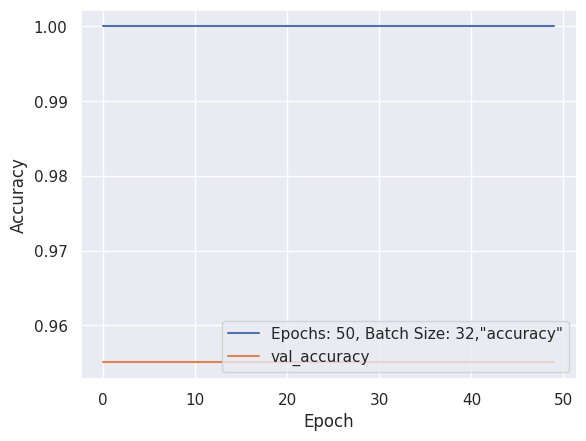

7/7 [==============================] - 0s 7ms/step - loss: 0.6717 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 32: 0.9300000071525574

Training for 50 epochs with batch size 64...
Epoch 1/50
12/12 [==============================] - 0s 35ms/step - loss: 3.9416e-06 - accuracy: 1.0000 - val_loss: 0.5103 - val_accuracy: 0.9551
Epoch 2/50
12/12 [==============================] - 0s 30ms/step - loss: 3.9080e-06 - accuracy: 1.0000 - val_loss: 0.5104 - val_accuracy: 0.9551
Epoch 3/50
12/12 [==============================] - 0s 31ms/step - loss: 3.8769e-06 - accuracy: 1.0000 - val_loss: 0.5105 - val_accuracy: 0.9551
Epoch 4/50
12/12 [==============================] - 0s 31ms/step - loss: 3.8515e-06 - accuracy: 1.0000 - val_loss: 0.5107 - val_accuracy: 0.9551
Epoch 5/50
12/12 [==============================] - 0s 31ms/step - loss: 3.8230e-06 - accuracy: 1.0000 - val_loss: 0.5109 - val_accuracy: 0.9551
Epoch 6/50
12/12 [==============================] - 0s 31ms/step - loss

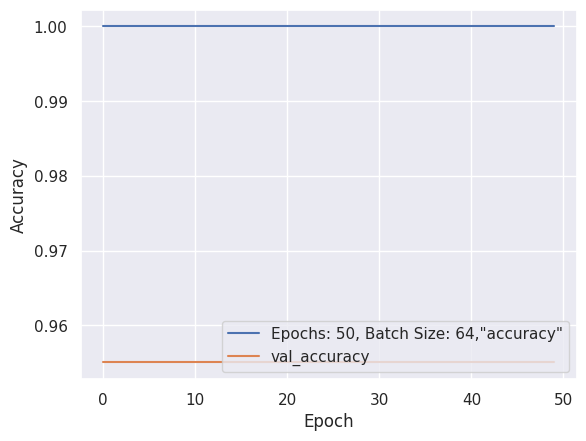

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 64: 0.9300000071525574


In [ ]:
# Define a list of epochs to test
epochs_to_test = [10, 20, 50]

# Define a list of batch sizes to test
batch_sizes_to_test = [8, 32, 64]

for epochs in epochs_to_test:
    for batch_size in batch_sizes_to_test:
        print(f"\nTraining for {epochs} epochs with batch size {batch_size}...")

        # Train the model with different epochs and batch sizes
        history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid))

        # Plot accuracy for each combination of epochs and batch sizes
        plt.plot(history.history['accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size},"accuracy"')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()

        # Evaluating the model on test data after training
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Validation accuracy for {epochs} epochs with batch size {batch_size}: {test_accuracy}")


Training and Validation accurancy should come to a parallel state.

In [ ]:
validation_loss, validation_accuracy = model.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation loss: 0.5197
Validation accuracy: 0.9551
Test loss: 0.6884
Test accuracy: 0.9300


7/7 [==============================] - 0s 6ms/step
The accuracy on the test data: 0.93
The F1 score on the test data: 0.8250299703169385
Precision on test data: 0.8693737501562304
Recall on test data: 0.8056843164094906


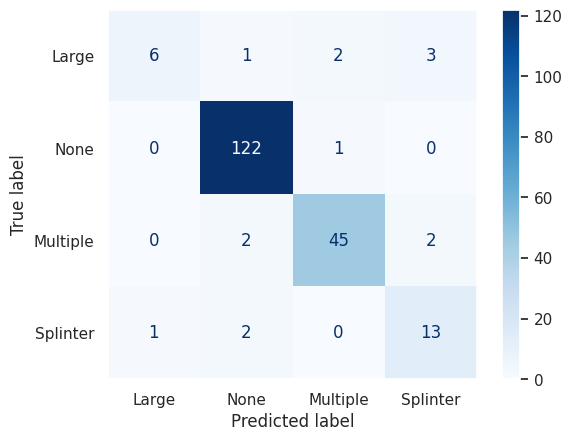

In [ ]:
pred_labels = model.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels), display_labels=['Large', 'None','Multiple','Splinter'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)

7/7 [==============================] - 0s 6ms/step


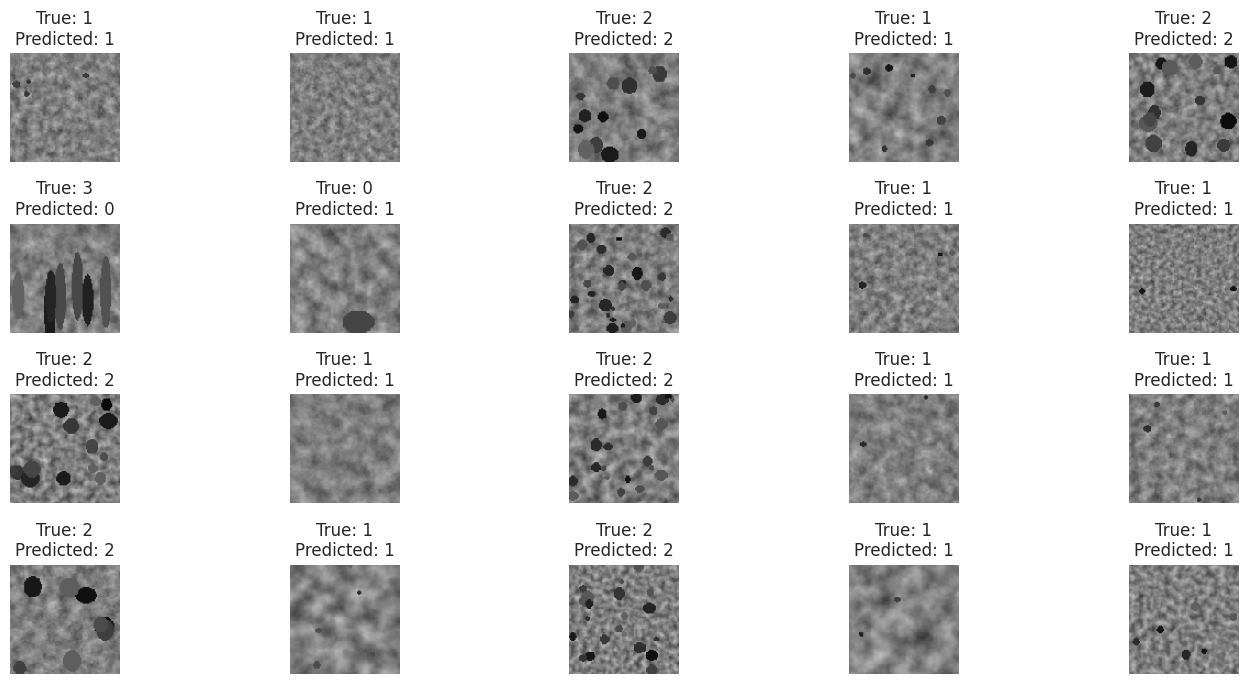

In [ ]:
# Define the number of rows and columns for image visualization
num_images_to_visualize = 20

num_rows = 4
num_columns = num_images_to_visualize // num_rows

# Get a random subset of images from the validation set
subset_indices = np.random.choice(20, num_images_to_visualize, replace=False)

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_columns, figsize=(15, 7))

predicted_prob = model.predict(X_test)
predicted_classes = np.argmax(predicted_prob, axis=1)

predicted_classes_name = predicted_classes

# Loop through the subset of images
for i, index in enumerate(subset_indices):
    row = i // num_columns
    col = i % num_columns

    imd=(X_test[index]*255).astype(np.uint8)

    # Plot the image
    axes[row, col].imshow(imd)
    axes[row, col].axis('off')

    # Set the title with both true and predicted labels
    title = f"True: {y_test[index]}\nPredicted: {predicted_classes[index]}"
    axes[row, col].set_title(title)

# Adjust spacing and display the plot
plt.tight_layout()
plt.show()



---



## CNN model2

In [ ]:
def build_model2(input_shape, num_classes, n_conv_blocks=6, n_dense_blocks = 3, DROPOUT=True):
    inputs = tf.keras.Input(shape=input_shape)

    # rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # convolution blocks
    for _ in range(n_conv_blocks-1):
        #Rectified Linear Unit (ReLU) activation is preferred in most cases for its simplicity and effectiveness in training deep networks.
        x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='linear')(x)
        #Separating the activation part from the convolution part adds flexibility.
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # final convolution block (Flatten Layer)
    x = layers.Conv2D(64, (3, 3), padding = 'SAME', activation='relu')(x)
    #x = layers.Activation("relu")(x) #separating the activation part from the convolution part adds flexibility
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block
    for _ in range(n_dense_blocks):
        # For complex tasks or larger input data, having more neurons in the dense layers can help capture more intricate patterns and relationships.
        x = layers.Dense(50, activation='relu')(x) #1000
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    return tf.keras.Model(inputs, outputs)


In [ ]:
desired_image_size = (100, 100)
num_classes=4

# Build model for grayscale images (100x100 pixels)
model2 = build_model2(input_shape=desired_image_size + (3,), num_classes=num_classes)

# as metric we choose the accuracy: the total number of correct predictions made
model2.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [ ]:
model2.summary()

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_23 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_22 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_90 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_90 (MaxPooli  (None, 50, 50, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_142 (Dropout)       (None, 50, 50, 64)        0         
                                                                 
 conv2d_91 (Conv2D)          (None, 50, 50, 64)        36928     
                                                          


Training for 10 epochs with batch size 8...
Epoch 1/10
89/89 [==============================] - 5s 18ms/step - loss: 1.1446 - accuracy: 0.6217 - val_loss: 1.1430 - val_accuracy: 0.5955
Epoch 2/10
89/89 [==============================] - 1s 11ms/step - loss: 1.0373 - accuracy: 0.6245 - val_loss: 1.0575 - val_accuracy: 0.5955
Epoch 3/10
89/89 [==============================] - 1s 11ms/step - loss: 1.0179 - accuracy: 0.6273 - val_loss: 1.0253 - val_accuracy: 0.5955
Epoch 4/10
89/89 [==============================] - 1s 11ms/step - loss: 1.0132 - accuracy: 0.6259 - val_loss: 1.0022 - val_accuracy: 0.5955
Epoch 5/10
89/89 [==============================] - 1s 10ms/step - loss: 1.0168 - accuracy: 0.6301 - val_loss: 1.0088 - val_accuracy: 0.5955
Epoch 6/10
89/89 [==============================] - 1s 11ms/step - loss: 0.9885 - accuracy: 0.6273 - val_loss: 0.9949 - val_accuracy: 0.5955
Epoch 7/10
89/89 [==============================] - 1s 11ms/step - loss: 1.0098 - accuracy: 0.6287 - val_loss

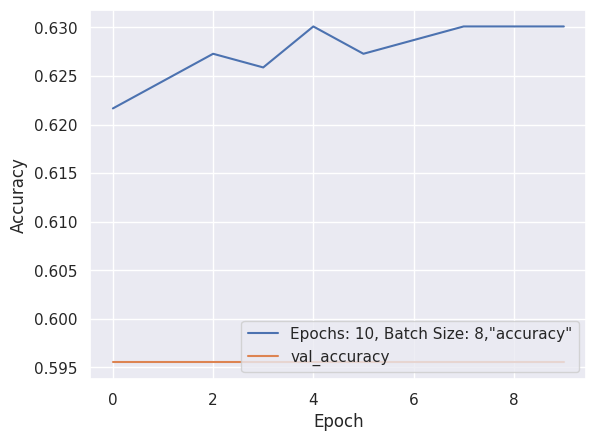

7/7 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 10 epochs with batch size 8: 0.9300000071525574

Training for 10 epochs with batch size 32...
Epoch 1/10
23/23 [==============================] - 1s 33ms/step - loss: 0.9892 - accuracy: 0.6301 - val_loss: 1.0005 - val_accuracy: 0.5955
Epoch 2/10
23/23 [==============================] - 1s 25ms/step - loss: 0.9929 - accuracy: 0.6301 - val_loss: 0.9980 - val_accuracy: 0.5955
Epoch 3/10
23/23 [==============================] - 1s 25ms/step - loss: 0.9881 - accuracy: 0.6301 - val_loss: 0.9953 - val_accuracy: 0.5955
Epoch 4/10
23/23 [==============================] - 1s 25ms/step - loss: 1.0002 - accuracy: 0.6301 - val_loss: 0.9980 - val_accuracy: 0.5955
Epoch 5/10
23/23 [==============================] - 1s 25ms/step - loss: 0.9821 - accuracy: 0.6301 - val_loss: 0.9989 - val_accuracy: 0.5955
Epoch 6/10
23/23 [==============================] - 1s 25ms/step - loss: 0.9917 - accuracy: 

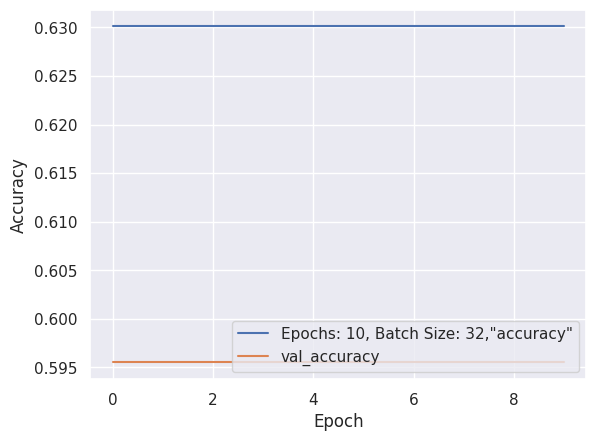

7/7 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 10 epochs with batch size 32: 0.9300000071525574

Training for 10 epochs with batch size 64...
Epoch 1/10
12/12 [==============================] - 1s 48ms/step - loss: 0.9801 - accuracy: 0.6301 - val_loss: 0.9978 - val_accuracy: 0.5955
Epoch 2/10
12/12 [==============================] - 1s 43ms/step - loss: 0.9892 - accuracy: 0.6301 - val_loss: 0.9987 - val_accuracy: 0.5955
Epoch 3/10
12/12 [==============================] - 1s 43ms/step - loss: 0.9773 - accuracy: 0.6301 - val_loss: 0.9985 - val_accuracy: 0.5955
Epoch 4/10
12/12 [==============================] - 1s 44ms/step - loss: 0.9686 - accuracy: 0.6301 - val_loss: 0.9983 - val_accuracy: 0.5955
Epoch 5/10
12/12 [==============================] - 1s 43ms/step - loss: 0.9795 - accuracy: 0.6301 - val_loss: 0.9987 - val_accuracy: 0.5955
Epoch 6/10
12/12 [==============================] - 1s 43ms/step - loss: 0.9818 - accuracy:

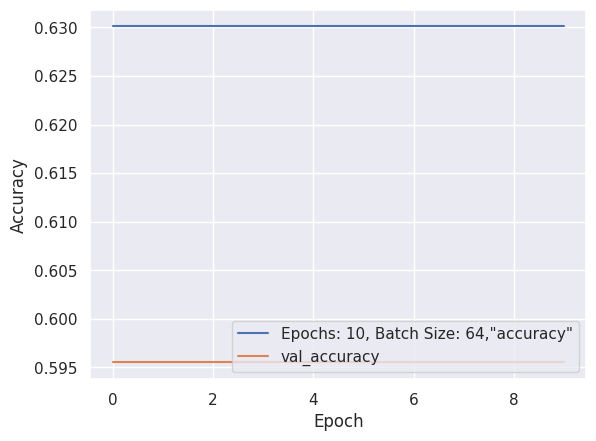

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 10 epochs with batch size 64: 0.9300000071525574

Training for 20 epochs with batch size 8...
Epoch 1/20
89/89 [==============================] - 1s 11ms/step - loss: 0.9897 - accuracy: 0.6301 - val_loss: 0.9961 - val_accuracy: 0.5955
Epoch 2/20
89/89 [==============================] - 1s 10ms/step - loss: 0.9907 - accuracy: 0.6301 - val_loss: 0.9997 - val_accuracy: 0.5955
Epoch 3/20
89/89 [==============================] - 1s 11ms/step - loss: 0.9797 - accuracy: 0.6301 - val_loss: 0.9988 - val_accuracy: 0.5955
Epoch 4/20
89/89 [==============================] - 1s 10ms/step - loss: 0.9755 - accuracy: 0.6301 - val_loss: 0.9992 - val_accuracy: 0.5955
Epoch 5/20
89/89 [==============================] - 1s 11ms/step - loss: 1.0496 - accuracy: 0.6020 - val_loss: 1.0211 - val_accuracy: 0.5955
Epoch 6/20
89/89 [==============================] - 1s 10ms/step - loss: 0.9993 - accuracy: 

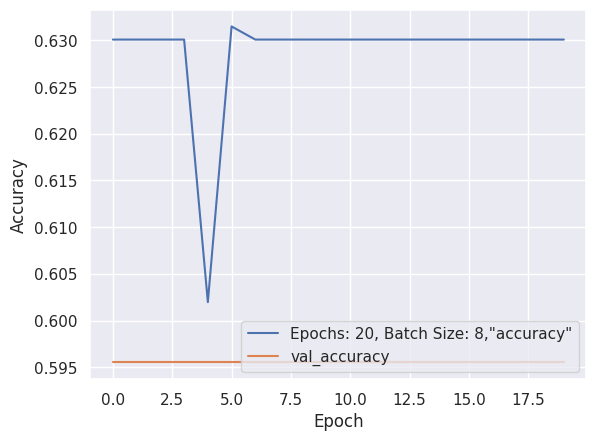

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 20 epochs with batch size 8: 0.9300000071525574

Training for 20 epochs with batch size 32...
Epoch 1/20
23/23 [==============================] - 1s 26ms/step - loss: 0.9763 - accuracy: 0.6301 - val_loss: 0.9958 - val_accuracy: 0.5955
Epoch 2/20
23/23 [==============================] - 1s 24ms/step - loss: 0.9771 - accuracy: 0.6301 - val_loss: 0.9956 - val_accuracy: 0.5955
Epoch 3/20
23/23 [==============================] - 1s 24ms/step - loss: 0.9762 - accuracy: 0.6301 - val_loss: 0.9955 - val_accuracy: 0.5955
Epoch 4/20
23/23 [==============================] - 1s 23ms/step - loss: 0.9735 - accuracy: 0.6301 - val_loss: 0.9956 - val_accuracy: 0.5955
Epoch 5/20
23/23 [==============================] - 1s 24ms/step - loss: 0.9808 - accuracy: 0.6301 - val_loss: 0.9964 - val_accuracy: 0.5955
Epoch 6/20
23/23 [==============================] - 1s 24ms/step - loss: 0.9803 - accuracy: 

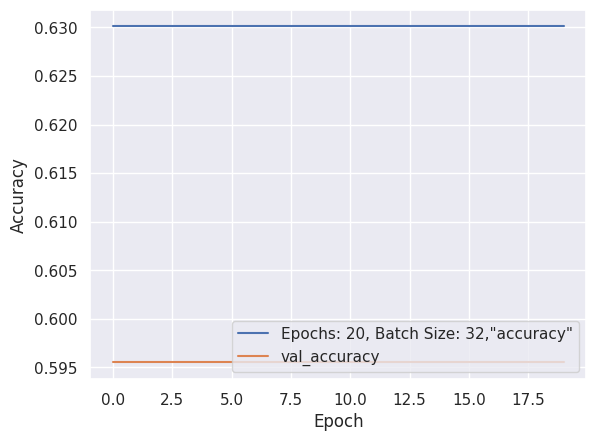

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 20 epochs with batch size 32: 0.9300000071525574

Training for 20 epochs with batch size 64...
Epoch 1/20
12/12 [==============================] - 1s 47ms/step - loss: 0.9795 - accuracy: 0.6301 - val_loss: 0.9963 - val_accuracy: 0.5955
Epoch 2/20
12/12 [==============================] - 1s 42ms/step - loss: 0.9792 - accuracy: 0.6301 - val_loss: 0.9966 - val_accuracy: 0.5955
Epoch 3/20
12/12 [==============================] - 1s 43ms/step - loss: 0.9700 - accuracy: 0.6301 - val_loss: 0.9966 - val_accuracy: 0.5955
Epoch 4/20
12/12 [==============================] - 1s 42ms/step - loss: 0.9738 - accuracy: 0.6301 - val_loss: 0.9960 - val_accuracy: 0.5955
Epoch 5/20
12/12 [==============================] - 1s 42ms/step - loss: 0.9732 - accuracy: 0.6301 - val_loss: 0.9953 - val_accuracy: 0.5955
Epoch 6/20
12/12 [==============================] - 0s 41ms/step - loss: 0.9789 - accuracy:

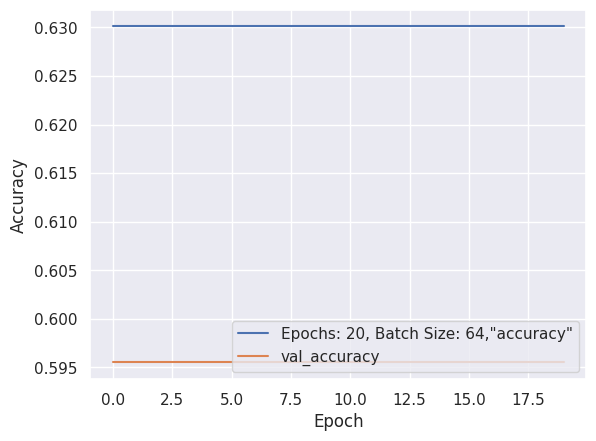

7/7 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 20 epochs with batch size 64: 0.9300000071525574

Training for 50 epochs with batch size 8...
Epoch 1/50
89/89 [==============================] - 1s 10ms/step - loss: 0.9784 - accuracy: 0.6301 - val_loss: 0.9953 - val_accuracy: 0.5955
Epoch 2/50
89/89 [==============================] - 1s 10ms/step - loss: 0.9776 - accuracy: 0.6301 - val_loss: 0.9957 - val_accuracy: 0.5955
Epoch 3/50
89/89 [==============================] - 1s 9ms/step - loss: 0.9783 - accuracy: 0.6301 - val_loss: 0.9957 - val_accuracy: 0.5955
Epoch 4/50
89/89 [==============================] - 1s 10ms/step - loss: 0.9828 - accuracy: 0.6301 - val_loss: 0.9989 - val_accuracy: 0.5955
Epoch 5/50
89/89 [==============================] - 1s 10ms/step - loss: 0.9850 - accuracy: 0.6301 - val_loss: 0.9946 - val_accuracy: 0.5955
Epoch 6/50
89/89 [==============================] - 1s 11ms/step - loss: 0.9993 - accuracy: 0

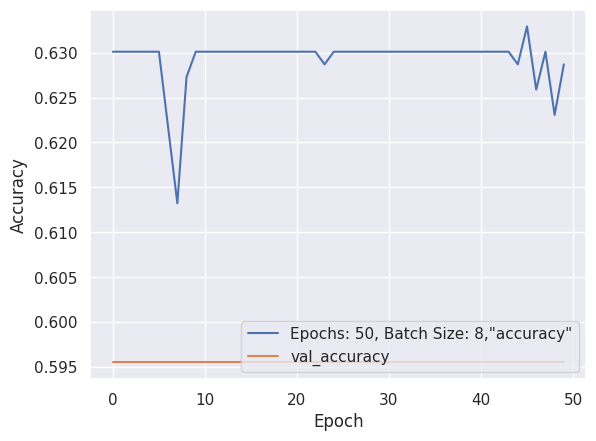

7/7 [==============================] - 0s 6ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 8: 0.9300000071525574

Training for 50 epochs with batch size 32...
Epoch 1/50
23/23 [==============================] - 1s 25ms/step - loss: 0.9743 - accuracy: 0.6301 - val_loss: 0.9969 - val_accuracy: 0.5955
Epoch 2/50
23/23 [==============================] - 1s 23ms/step - loss: 0.9713 - accuracy: 0.6301 - val_loss: 0.9967 - val_accuracy: 0.5955
Epoch 3/50
23/23 [==============================] - 1s 23ms/step - loss: 0.9767 - accuracy: 0.6301 - val_loss: 0.9967 - val_accuracy: 0.5955
Epoch 4/50
23/23 [==============================] - 1s 23ms/step - loss: 0.9813 - accuracy: 0.6301 - val_loss: 0.9967 - val_accuracy: 0.5955
Epoch 5/50
23/23 [==============================] - 1s 23ms/step - loss: 0.9742 - accuracy: 0.6301 - val_loss: 0.9970 - val_accuracy: 0.5955
Epoch 6/50
23/23 [==============================] - 1s 23ms/step - loss: 0.9713 - accuracy: 

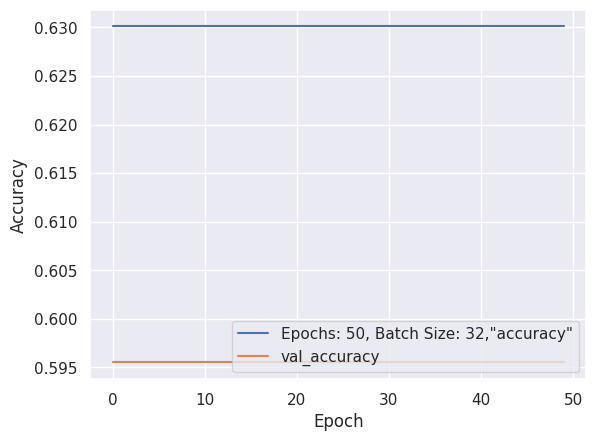

7/7 [==============================] - 0s 8ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 32: 0.9300000071525574

Training for 50 epochs with batch size 64...
Epoch 1/50
12/12 [==============================] - 1s 48ms/step - loss: 0.9738 - accuracy: 0.6301 - val_loss: 0.9961 - val_accuracy: 0.5955
Epoch 2/50
12/12 [==============================] - 1s 43ms/step - loss: 0.9744 - accuracy: 0.6301 - val_loss: 0.9959 - val_accuracy: 0.5955
Epoch 3/50
12/12 [==============================] - 1s 43ms/step - loss: 0.9748 - accuracy: 0.6301 - val_loss: 0.9955 - val_accuracy: 0.5955
Epoch 4/50
12/12 [==============================] - 1s 43ms/step - loss: 0.9727 - accuracy: 0.6301 - val_loss: 0.9956 - val_accuracy: 0.5955
Epoch 5/50
12/12 [==============================] - 1s 43ms/step - loss: 0.9708 - accuracy: 0.6301 - val_loss: 0.9955 - val_accuracy: 0.5955
Epoch 6/50
12/12 [==============================] - 1s 43ms/step - loss: 0.9728 - accuracy:

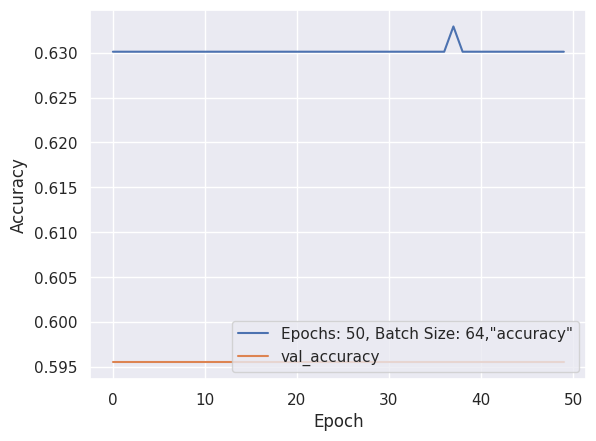

7/7 [==============================] - 0s 7ms/step - loss: 0.6884 - accuracy: 0.9300
Validation accuracy for 50 epochs with batch size 64: 0.9300000071525574


In [ ]:
# Define a list of epochs to test
epochs_to_test = [10, 20, 50]

# Define a list of batch sizes to test
batch_sizes_to_test = [8, 32, 64]

for epochs in epochs_to_test:
    for batch_size in batch_sizes_to_test:
        print(f"\nTraining for {epochs} epochs with batch size {batch_size}...")

        # Train the model with different epochs and batch sizes
        history = model2.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_valid, y_valid))

        # Plot accuracy for each combination of epochs and batch sizes
        plt.plot(history.history['accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size},"accuracy"')
        plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()

        # Evaluating the model on test data after training
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Validation accuracy for {epochs} epochs with batch size {batch_size}: {test_accuracy}")


7/7 [==============================] - 0s 6ms/step
The accuracy on the test data: 0.615
The F1 score on the test data: 0.19040247678018576
Precision on test data: 0.15375
Recall on test data: 0.25


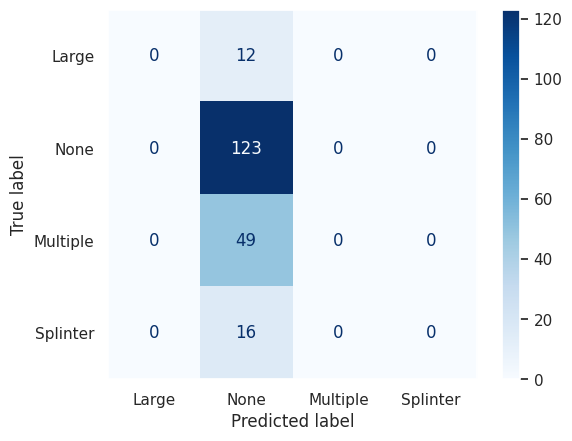

In [ ]:
pred_labels = model2.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels), display_labels=['Large', 'None','Multiple','Splinter'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)

## CNN model_2

This model increases the depth of the dense layers to 3 (adjustable with the n_dense_blocks parameter) and the number of convolutional blocks to 4 (controlled by the n_conv_blocks parameter). The size of the dense layers is set to 100 neurons per layer, which can be adjusted based on your requirements.


Training for 10 epochs with batch size 8...
Epoch 1/10
88/88 [==============================] - 5s 26ms/step - loss: 1.0837 - accuracy: 0.6074 - val_loss: 0.9974 - val_accuracy: 0.5955
Epoch 2/10
88/88 [==============================] - 2s 23ms/step - loss: 1.0120 - accuracy: 0.6316 - val_loss: 1.0112 - val_accuracy: 0.5955
Epoch 3/10
88/88 [==============================] - 2s 24ms/step - loss: 1.0022 - accuracy: 0.6273 - val_loss: 0.9981 - val_accuracy: 0.5955
Epoch 4/10
88/88 [==============================] - 2s 24ms/step - loss: 0.9998 - accuracy: 0.6302 - val_loss: 0.9960 - val_accuracy: 0.5955
Epoch 5/10
88/88 [==============================] - 2s 25ms/step - loss: 0.9939 - accuracy: 0.6302 - val_loss: 0.9951 - val_accuracy: 0.5955
Epoch 6/10
88/88 [==============================] - 2s 24ms/step - loss: 0.9893 - accuracy: 0.6330 - val_loss: 0.9966 - val_accuracy: 0.5955
Epoch 7/10
88/88 [==============================] - 2s 23ms/step - loss: 0.9949 - accuracy: 0.6273 - val_loss

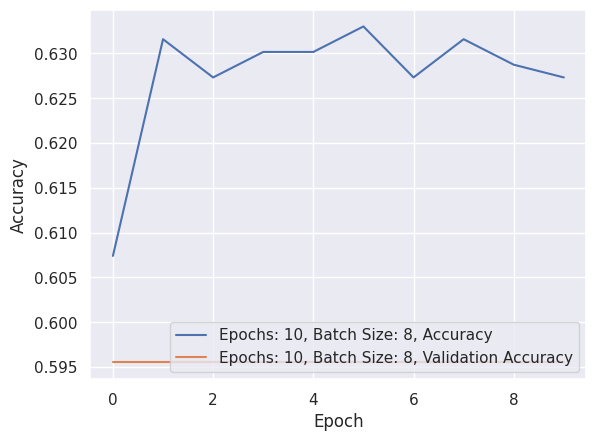

7/7 [==============================] - 0s 8ms/step - loss: 1.0169 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 8: 0.6150000095367432

Training for 10 epochs with batch size 16...
Epoch 1/10
44/44 [==============================] - 5s 49ms/step - loss: 1.0915 - accuracy: 0.5971 - val_loss: 1.1077 - val_accuracy: 0.5955
Epoch 2/10
44/44 [==============================] - 2s 43ms/step - loss: 1.0030 - accuracy: 0.6273 - val_loss: 1.0290 - val_accuracy: 0.5955
Epoch 3/10
44/44 [==============================] - 2s 43ms/step - loss: 1.0060 - accuracy: 0.6259 - val_loss: 1.0015 - val_accuracy: 0.5955
Epoch 4/10
44/44 [==============================] - 2s 45ms/step - loss: 0.9914 - accuracy: 0.6317 - val_loss: 0.9977 - val_accuracy: 0.5955
Epoch 5/10
44/44 [==============================] - 2s 43ms/step - loss: 1.0060 - accuracy: 0.6273 - val_loss: 1.0001 - val_accuracy: 0.5955
Epoch 6/10
44/44 [==============================] - 2s 43ms/step - loss: 0.9916 - accuracy: 

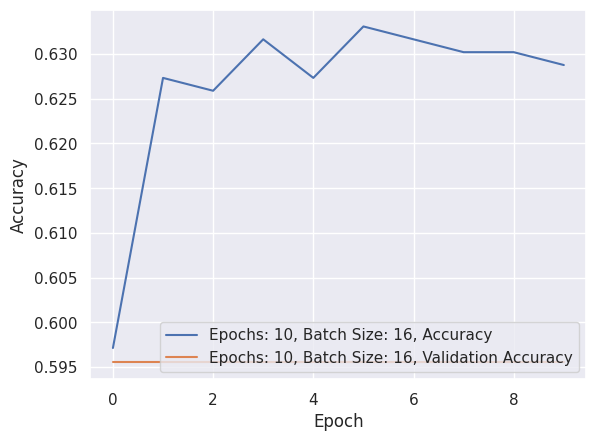

7/7 [==============================] - 0s 8ms/step - loss: 1.0146 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 16: 0.6150000095367432

Training for 10 epochs with batch size 24...
Epoch 1/10
29/29 [==============================] - 4s 70ms/step - loss: 1.0911 - accuracy: 0.6143 - val_loss: 1.0261 - val_accuracy: 0.5955
Epoch 2/10
29/29 [==============================] - 2s 65ms/step - loss: 1.0027 - accuracy: 0.6274 - val_loss: 1.0184 - val_accuracy: 0.5955
Epoch 3/10
29/29 [==============================] - 2s 68ms/step - loss: 1.0010 - accuracy: 0.6317 - val_loss: 1.0305 - val_accuracy: 0.5955
Epoch 4/10
29/29 [==============================] - 2s 66ms/step - loss: 0.9954 - accuracy: 0.6376 - val_loss: 1.0421 - val_accuracy: 0.5955
Epoch 5/10
29/29 [==============================] - 2s 65ms/step - loss: 0.9974 - accuracy: 0.6274 - val_loss: 0.9955 - val_accuracy: 0.5955
Epoch 6/10
29/29 [==============================] - 2s 65ms/step - loss: 1.0293 - accuracy:

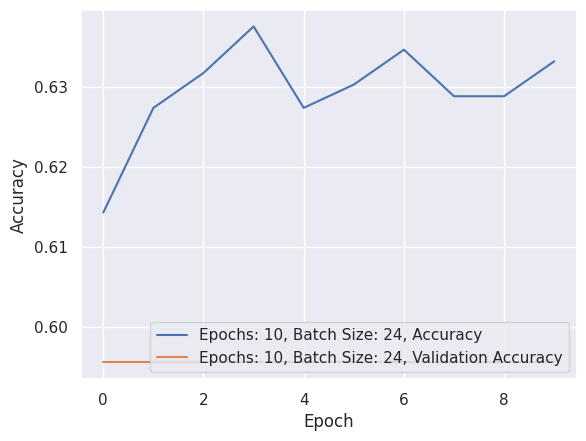

7/7 [==============================] - 0s 7ms/step - loss: 1.0151 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 24: 0.6150000095367432

Training for 15 epochs with batch size 8...
Epoch 1/15
88/88 [==============================] - 5s 26ms/step - loss: 1.0961 - accuracy: 0.6131 - val_loss: 1.0017 - val_accuracy: 0.5955
Epoch 2/15
88/88 [==============================] - 2s 22ms/step - loss: 1.0042 - accuracy: 0.6302 - val_loss: 1.0004 - val_accuracy: 0.5955
Epoch 3/15
88/88 [==============================] - 2s 22ms/step - loss: 0.9982 - accuracy: 0.6316 - val_loss: 1.0087 - val_accuracy: 0.5955
Epoch 4/15
88/88 [==============================] - 2s 23ms/step - loss: 1.0084 - accuracy: 0.6302 - val_loss: 1.0424 - val_accuracy: 0.5955
Epoch 5/15
88/88 [==============================] - 2s 23ms/step - loss: 0.9960 - accuracy: 0.6302 - val_loss: 0.9938 - val_accuracy: 0.5955
Epoch 6/15
88/88 [==============================] - 2s 21ms/step - loss: 0.9760 - accuracy: 

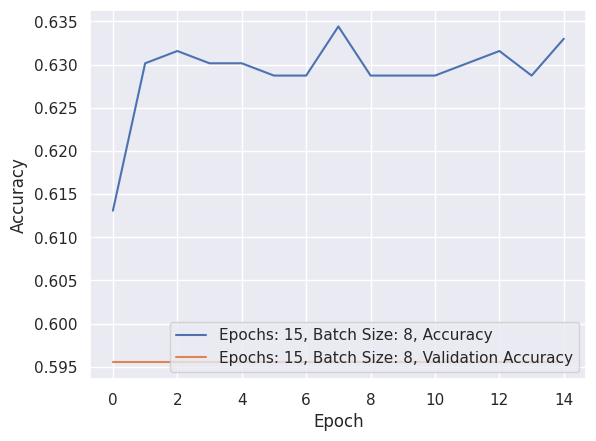

7/7 [==============================] - 0s 7ms/step - loss: 1.0158 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 8: 0.6150000095367432

Training for 15 epochs with batch size 16...
Epoch 1/15
44/44 [==============================] - 4s 45ms/step - loss: 1.0812 - accuracy: 0.6058 - val_loss: 1.0611 - val_accuracy: 0.5955
Epoch 2/15
44/44 [==============================] - 2s 44ms/step - loss: 1.0170 - accuracy: 0.6302 - val_loss: 1.0205 - val_accuracy: 0.5955
Epoch 3/15
44/44 [==============================] - 2s 41ms/step - loss: 1.0077 - accuracy: 0.6317 - val_loss: 1.0270 - val_accuracy: 0.5955
Epoch 4/15
44/44 [==============================] - 2s 44ms/step - loss: 1.0044 - accuracy: 0.6345 - val_loss: 0.9973 - val_accuracy: 0.5955
Epoch 5/15
44/44 [==============================] - 2s 44ms/step - loss: 0.9966 - accuracy: 0.6317 - val_loss: 1.0046 - val_accuracy: 0.5955
Epoch 6/15
44/44 [==============================] - 2s 45ms/step - loss: 0.9910 - accuracy: 

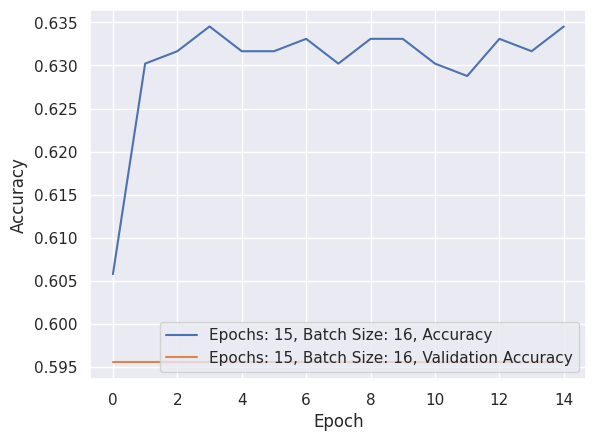

7/7 [==============================] - 0s 8ms/step - loss: 1.0154 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 16: 0.6150000095367432

Training for 15 epochs with batch size 24...
Epoch 1/15
29/29 [==============================] - 5s 70ms/step - loss: 1.1397 - accuracy: 0.6055 - val_loss: 1.0385 - val_accuracy: 0.5955
Epoch 2/15
29/29 [==============================] - 2s 65ms/step - loss: 1.0106 - accuracy: 0.6215 - val_loss: 1.0799 - val_accuracy: 0.5955
Epoch 3/15
29/29 [==============================] - 2s 66ms/step - loss: 1.0075 - accuracy: 0.6361 - val_loss: 0.9966 - val_accuracy: 0.5955
Epoch 4/15
29/29 [==============================] - 2s 64ms/step - loss: 1.0033 - accuracy: 0.6346 - val_loss: 1.0255 - val_accuracy: 0.5955
Epoch 5/15
29/29 [==============================] - 2s 68ms/step - loss: 0.9970 - accuracy: 0.6274 - val_loss: 1.0115 - val_accuracy: 0.5955
Epoch 6/15
29/29 [==============================] - 2s 67ms/step - loss: 1.0092 - accuracy:

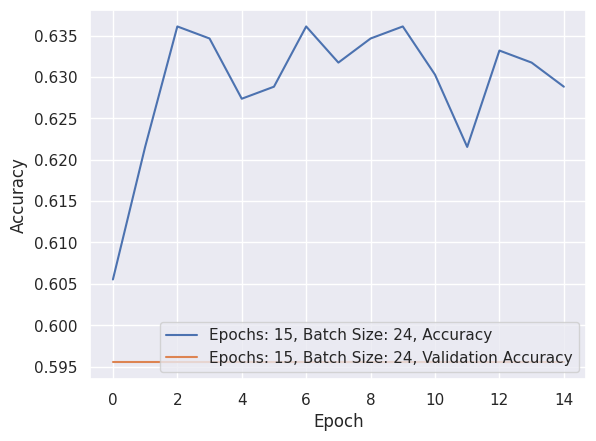

7/7 [==============================] - 0s 8ms/step - loss: 1.0154 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 24: 0.6150000095367432

Training for 20 epochs with batch size 8...
Epoch 1/20
88/88 [==============================] - 5s 26ms/step - loss: 1.0761 - accuracy: 0.6088 - val_loss: 1.0564 - val_accuracy: 0.5955
Epoch 2/20
88/88 [==============================] - 2s 26ms/step - loss: 1.0120 - accuracy: 0.6287 - val_loss: 1.0263 - val_accuracy: 0.5955
Epoch 3/20
88/88 [==============================] - 2s 25ms/step - loss: 1.0043 - accuracy: 0.6273 - val_loss: 1.0056 - val_accuracy: 0.5955
Epoch 4/20
88/88 [==============================] - 2s 24ms/step - loss: 1.0019 - accuracy: 0.6287 - val_loss: 1.0111 - val_accuracy: 0.5955
Epoch 5/20
88/88 [==============================] - 2s 24ms/step - loss: 0.9888 - accuracy: 0.6316 - val_loss: 1.0037 - val_accuracy: 0.5955
Epoch 6/20
88/88 [==============================] - 2s 23ms/step - loss: 0.9889 - accuracy: 

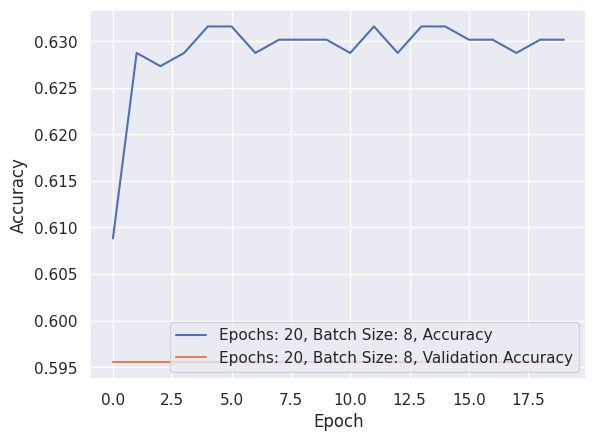

7/7 [==============================] - 0s 8ms/step - loss: 1.0171 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 8: 0.6150000095367432

Training for 20 epochs with batch size 16...
Epoch 1/20
44/44 [==============================] - 5s 50ms/step - loss: 1.1378 - accuracy: 0.6000 - val_loss: 1.0028 - val_accuracy: 0.5955
Epoch 2/20
44/44 [==============================] - 2s 45ms/step - loss: 1.0312 - accuracy: 0.6331 - val_loss: 1.0080 - val_accuracy: 0.5955
Epoch 3/20
44/44 [==============================] - 2s 43ms/step - loss: 1.0219 - accuracy: 0.6331 - val_loss: 1.0281 - val_accuracy: 0.5955
Epoch 4/20
44/44 [==============================] - 2s 44ms/step - loss: 0.9881 - accuracy: 0.6273 - val_loss: 0.9947 - val_accuracy: 0.5955
Epoch 5/20
44/44 [==============================] - 2s 44ms/step - loss: 1.0024 - accuracy: 0.6288 - val_loss: 1.0110 - val_accuracy: 0.5955
Epoch 6/20
44/44 [==============================] - 2s 47ms/step - loss: 0.9863 - accuracy: 

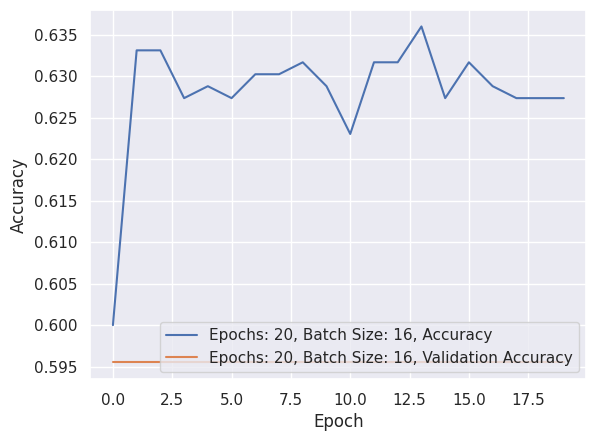

7/7 [==============================] - 0s 8ms/step - loss: 1.0169 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 16: 0.6150000095367432

Training for 20 epochs with batch size 24...
Epoch 1/20
29/29 [==============================] - 5s 70ms/step - loss: 1.0914 - accuracy: 0.6245 - val_loss: 1.0059 - val_accuracy: 0.5955
Epoch 2/20
29/29 [==============================] - 2s 66ms/step - loss: 1.0547 - accuracy: 0.5997 - val_loss: 0.9974 - val_accuracy: 0.5955
Epoch 3/20
29/29 [==============================] - 2s 68ms/step - loss: 1.0007 - accuracy: 0.6259 - val_loss: 1.0324 - val_accuracy: 0.5955
Epoch 4/20
29/29 [==============================] - 2s 67ms/step - loss: 1.0255 - accuracy: 0.6303 - val_loss: 1.0579 - val_accuracy: 0.5955
Epoch 5/20
29/29 [==============================] - 2s 68ms/step - loss: 0.9971 - accuracy: 0.6303 - val_loss: 1.0231 - val_accuracy: 0.5955
Epoch 6/20
29/29 [==============================] - 2s 65ms/step - loss: 1.0091 - accuracy:

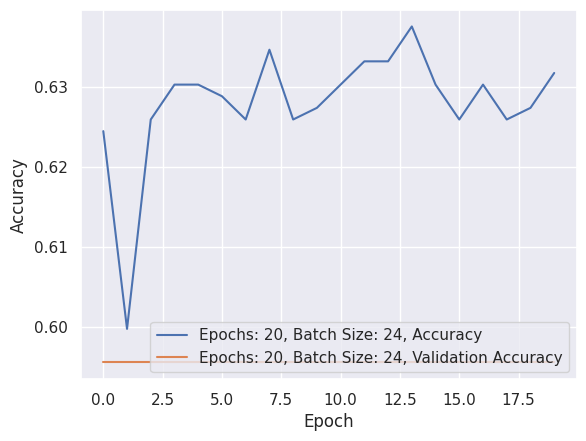

7/7 [==============================] - 0s 8ms/step - loss: 1.0158 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 24: 0.6150000095367432


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have 'images' and 'labels' arrays defined

# Convert labels to one-hot encoding
encoder = OneHotEncoder(sparse=False)

# Reshape the labels for compatibility with OneHotEncoder
labels = labels.reshape(-1, 1)

# Perform one-hot encoding on the labels
labels = encoder.fit_transform(labels)

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the remaining training data into training and validation sets (90% train, 10% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

# Define the model architecture along with augmentation
def build_model_with_augmentation(input_shape, num_classes, n_conv_blocks=4, n_dense_blocks=3, DROPOUT=True):
    inputs = tf.keras.Input(shape=input_shape)

    # Rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # Data augmentation
    data_augmentation = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Convolution blocks
    for _ in range(n_conv_blocks - 1):
        x = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Final convolution block (with Flatten layer)
    x = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block with modified depth
    for _ in range(n_dense_blocks):
        x = layers.Dense(100, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output with appropriate activation and loss function for one-hot encoded labels
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = tf.keras.Model(inputs, outputs)

    # Compile the model with appropriate loss for one-hot encoded labels
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model, data_augmentation

# Define a list of epochs to test
epochs_to_test = [10, 15, 20]

# Define a list of batch sizes to test
batch_sizes_to_test = [8, 16, 24]

for epochs in epochs_to_test:
    for batch_size in batch_sizes_to_test:
        print(f"\nTraining for {epochs} epochs with batch size {batch_size}...")

        # Build the model and data augmentation
        model, data_augmentation = build_model_with_augmentation(input_shape=X_train[0].shape, num_classes=4)

        # Train the model with different epochs and batch sizes using data augmentation
        history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=len(X_train) // batch_size,
                            epochs=epochs,
                            validation_data=(X_valid, y_valid))

        # Plot accuracy for each combination of epochs and batch sizes
        plt.plot(history.history['accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size}, Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size}, Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()

        # Evaluating the model on test data after training
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Validation accuracy for {epochs} epochs with batch size {batch_size}: {test_accuracy}")


Size of the train features: (711, 100, 100, 3) Size of train target: (711,)
Size of the validation features: (89, 100, 100, 3) Size of validation target: (89,)
Size of the test features: (200, 100, 100, 3) Size of test target: (200,)

Training for 10 epochs with batch size 8...
Epoch 1/10
88/88 [==============================] - 6s 31ms/step - loss: 1.0538 - accuracy: 0.5952 - val_loss: 0.9986 - val_accuracy: 0.5955
Epoch 2/10
88/88 [==============================] - 2s 23ms/step - loss: 1.0041 - accuracy: 0.6202 - val_loss: 1.0386 - val_accuracy: 0.5955
Epoch 3/10
88/88 [==============================] - 2s 25ms/step - loss: 1.0129 - accuracy: 0.6273 - val_loss: 0.9990 - val_accuracy: 0.5955
Epoch 4/10
88/88 [==============================] - 2s 25ms/step - loss: 0.9944 - accuracy: 0.6302 - val_loss: 0.9981 - val_accuracy: 0.5955
Epoch 5/10
88/88 [==============================] - 2s 24ms/step - loss: 0.9937 - accuracy: 0.6302 - val_loss: 0.9963 - val_accuracy: 0.5955
Epoch 6/10
88/88

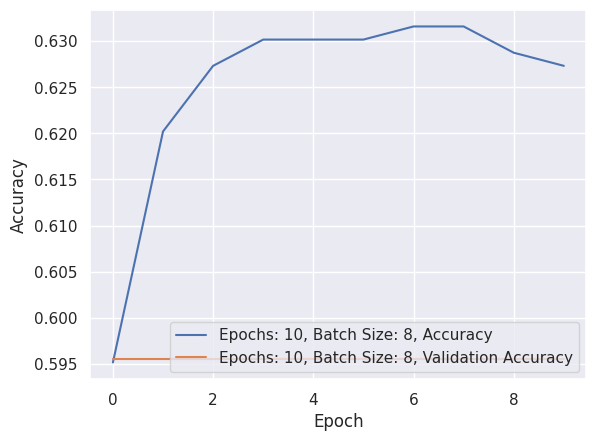

7/7 [==============================] - 0s 8ms/step - loss: 1.0180 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 8: 0.6150000095367432

Training for 10 epochs with batch size 16...
Epoch 1/10
44/44 [==============================] - 5s 46ms/step - loss: 1.0754 - accuracy: 0.6158 - val_loss: 1.0607 - val_accuracy: 0.5955
Epoch 2/10
44/44 [==============================] - 2s 44ms/step - loss: 1.0242 - accuracy: 0.6245 - val_loss: 1.0396 - val_accuracy: 0.5955
Epoch 3/10
44/44 [==============================] - 2s 43ms/step - loss: 0.9931 - accuracy: 0.6288 - val_loss: 1.0146 - val_accuracy: 0.5955
Epoch 4/10
44/44 [==============================] - 2s 43ms/step - loss: 0.9969 - accuracy: 0.6245 - val_loss: 1.0049 - val_accuracy: 0.5955
Epoch 5/10
44/44 [==============================] - 2s 42ms/step - loss: 0.9933 - accuracy: 0.6321 - val_loss: 1.0036 - val_accuracy: 0.5955
Epoch 6/10
44/44 [==============================] - 2s 40ms/step - loss: 1.0062 - accuracy: 

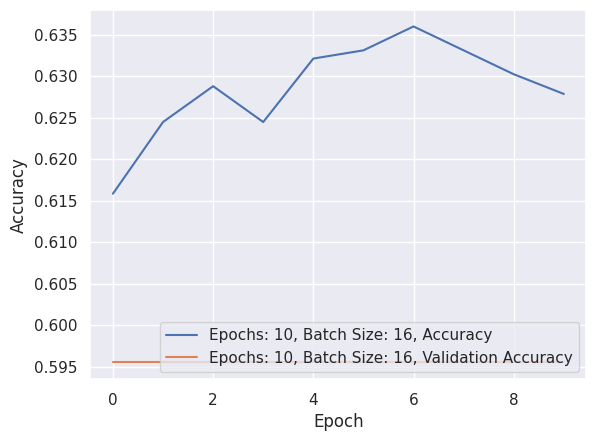

7/7 [==============================] - 0s 7ms/step - loss: 1.0194 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 16: 0.6150000095367432

Training for 10 epochs with batch size 24...
Epoch 1/10
29/29 [==============================] - 5s 74ms/step - loss: 1.0998 - accuracy: 0.6245 - val_loss: 1.0518 - val_accuracy: 0.5955
Epoch 2/10
29/29 [==============================] - 2s 68ms/step - loss: 0.9987 - accuracy: 0.6230 - val_loss: 1.0164 - val_accuracy: 0.5955
Epoch 3/10
29/29 [==============================] - 2s 74ms/step - loss: 1.0017 - accuracy: 0.6259 - val_loss: 1.0469 - val_accuracy: 0.5955
Epoch 4/10
29/29 [==============================] - 2s 69ms/step - loss: 1.0059 - accuracy: 0.6274 - val_loss: 1.0252 - val_accuracy: 0.5955
Epoch 5/10
29/29 [==============================] - 2s 62ms/step - loss: 1.0112 - accuracy: 0.6245 - val_loss: 1.0045 - val_accuracy: 0.5955
Epoch 6/10
29/29 [==============================] - 2s 65ms/step - loss: 0.9933 - accuracy:

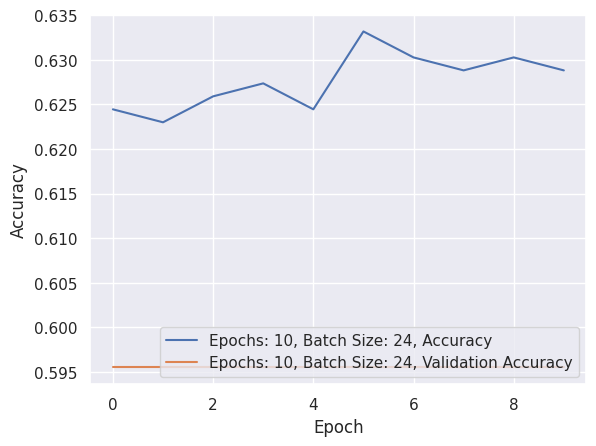

7/7 [==============================] - 0s 7ms/step - loss: 1.0186 - accuracy: 0.6150
Validation accuracy for 10 epochs with batch size 24: 0.6150000095367432

Training for 15 epochs with batch size 8...
Epoch 1/15
88/88 [==============================] - 4s 23ms/step - loss: 1.0543 - accuracy: 0.6060 - val_loss: 0.9993 - val_accuracy: 0.5955
Epoch 2/15
88/88 [==============================] - 2s 21ms/step - loss: 1.0083 - accuracy: 0.6316 - val_loss: 1.0018 - val_accuracy: 0.5955
Epoch 3/15
88/88 [==============================] - 2s 22ms/step - loss: 1.0138 - accuracy: 0.6273 - val_loss: 1.0098 - val_accuracy: 0.5955
Epoch 4/15
88/88 [==============================] - 2s 22ms/step - loss: 1.0105 - accuracy: 0.6307 - val_loss: 1.0008 - val_accuracy: 0.5955
Epoch 5/15
88/88 [==============================] - 2s 22ms/step - loss: 0.9888 - accuracy: 0.6344 - val_loss: 0.9961 - val_accuracy: 0.5955
Epoch 6/15
88/88 [==============================] - 2s 22ms/step - loss: 0.9873 - accuracy: 

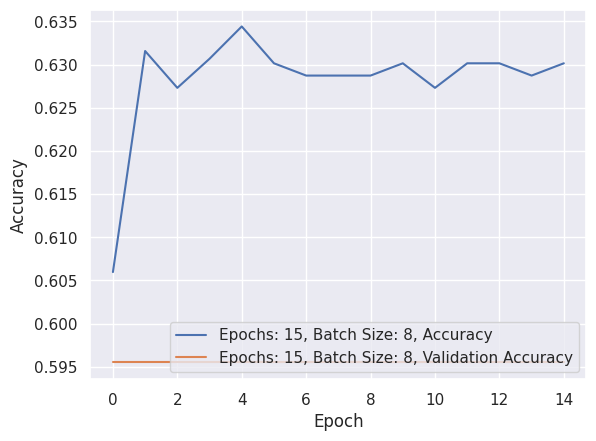

7/7 [==============================] - 0s 8ms/step - loss: 1.0161 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 8: 0.6150000095367432

Training for 15 epochs with batch size 16...
Epoch 1/15
44/44 [==============================] - 4s 47ms/step - loss: 1.0912 - accuracy: 0.6216 - val_loss: 1.0530 - val_accuracy: 0.5955
Epoch 2/15
44/44 [==============================] - 2s 43ms/step - loss: 1.0187 - accuracy: 0.6245 - val_loss: 1.0516 - val_accuracy: 0.5955
Epoch 3/15
44/44 [==============================] - 2s 43ms/step - loss: 0.9884 - accuracy: 0.6302 - val_loss: 1.0185 - val_accuracy: 0.5955
Epoch 4/15
44/44 [==============================] - 2s 44ms/step - loss: 0.9878 - accuracy: 0.6273 - val_loss: 0.9968 - val_accuracy: 0.5955
Epoch 5/15
44/44 [==============================] - 2s 44ms/step - loss: 1.0110 - accuracy: 0.6259 - val_loss: 0.9967 - val_accuracy: 0.5955
Epoch 6/15
44/44 [==============================] - 2s 53ms/step - loss: 0.9985 - accuracy: 

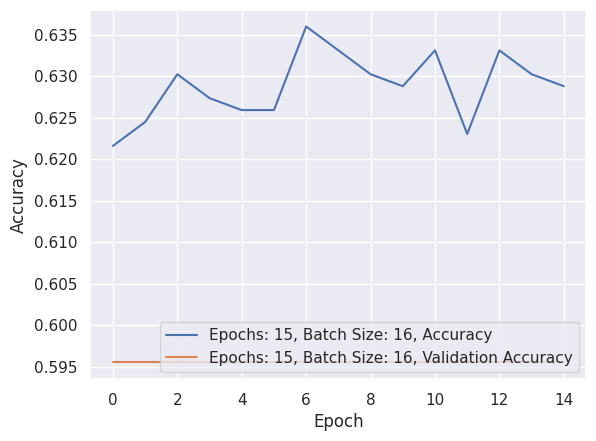

7/7 [==============================] - 0s 8ms/step - loss: 1.0224 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 16: 0.6150000095367432

Training for 15 epochs with batch size 24...
Epoch 1/15
29/29 [==============================] - 5s 80ms/step - loss: 1.1446 - accuracy: 0.6070 - val_loss: 1.0343 - val_accuracy: 0.5955
Epoch 2/15
29/29 [==============================] - 2s 64ms/step - loss: 1.0068 - accuracy: 0.6274 - val_loss: 1.0709 - val_accuracy: 0.5955
Epoch 3/15
29/29 [==============================] - 2s 67ms/step - loss: 1.0123 - accuracy: 0.6332 - val_loss: 1.0181 - val_accuracy: 0.5955
Epoch 4/15
29/29 [==============================] - 2s 67ms/step - loss: 0.9974 - accuracy: 0.6259 - val_loss: 0.9989 - val_accuracy: 0.5955
Epoch 5/15
29/29 [==============================] - 2s 69ms/step - loss: 0.9953 - accuracy: 0.6332 - val_loss: 1.0217 - val_accuracy: 0.5955
Epoch 6/15
29/29 [==============================] - 2s 77ms/step - loss: 1.0136 - accuracy:

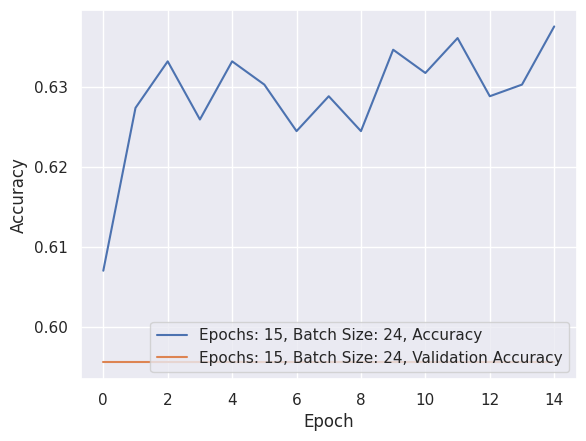

7/7 [==============================] - 0s 8ms/step - loss: 1.0222 - accuracy: 0.6150
Validation accuracy for 15 epochs with batch size 24: 0.6150000095367432

Training for 20 epochs with batch size 8...
Epoch 1/20
88/88 [==============================] - 5s 25ms/step - loss: 1.0700 - accuracy: 0.6003 - val_loss: 1.0118 - val_accuracy: 0.5955
Epoch 2/20
88/88 [==============================] - 2s 23ms/step - loss: 1.0084 - accuracy: 0.6287 - val_loss: 1.0113 - val_accuracy: 0.5955
Epoch 3/20
88/88 [==============================] - 2s 24ms/step - loss: 1.0021 - accuracy: 0.6316 - val_loss: 1.0369 - val_accuracy: 0.5955
Epoch 4/20
88/88 [==============================] - 2s 24ms/step - loss: 1.0083 - accuracy: 0.6273 - val_loss: 1.0028 - val_accuracy: 0.5955
Epoch 5/20
88/88 [==============================] - 2s 23ms/step - loss: 1.0025 - accuracy: 0.6287 - val_loss: 1.0270 - val_accuracy: 0.5955
Epoch 6/20
88/88 [==============================] - 2s 23ms/step - loss: 0.9945 - accuracy: 

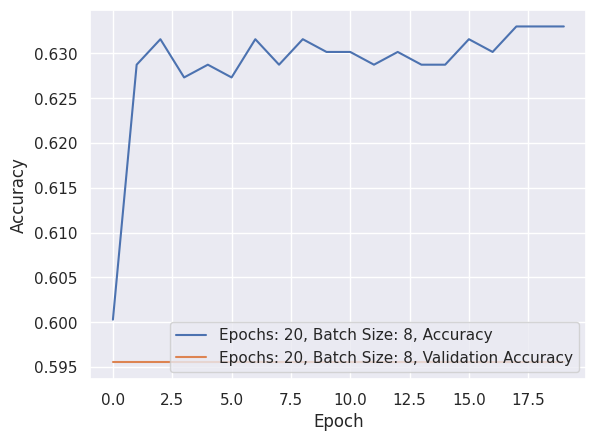

7/7 [==============================] - 0s 8ms/step - loss: 1.0148 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 8: 0.6150000095367432

Training for 20 epochs with batch size 16...
Epoch 1/20
44/44 [==============================] - 5s 48ms/step - loss: 1.0909 - accuracy: 0.6187 - val_loss: 1.0510 - val_accuracy: 0.5955
Epoch 2/20
44/44 [==============================] - 2s 43ms/step - loss: 1.0098 - accuracy: 0.6302 - val_loss: 1.0379 - val_accuracy: 0.5955
Epoch 3/20
44/44 [==============================] - 2s 43ms/step - loss: 1.0143 - accuracy: 0.6302 - val_loss: 1.0281 - val_accuracy: 0.5955
Epoch 4/20
44/44 [==============================] - 2s 44ms/step - loss: 0.9867 - accuracy: 0.6302 - val_loss: 1.0048 - val_accuracy: 0.5955
Epoch 5/20
44/44 [==============================] - 2s 44ms/step - loss: 1.0072 - accuracy: 0.6273 - val_loss: 0.9997 - val_accuracy: 0.5955
Epoch 6/20
44/44 [==============================] - 2s 42ms/step - loss: 0.9930 - accuracy: 

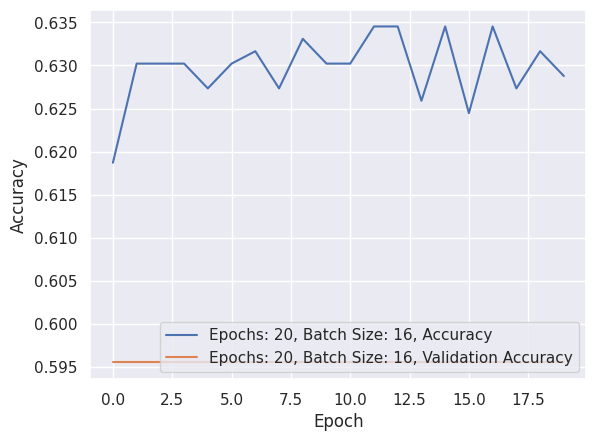

7/7 [==============================] - 0s 7ms/step - loss: 1.0154 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 16: 0.6150000095367432

Training for 20 epochs with batch size 24...
Epoch 1/20
29/29 [==============================] - 4s 68ms/step - loss: 1.1017 - accuracy: 0.5924 - val_loss: 1.1283 - val_accuracy: 0.5955
Epoch 2/20
29/29 [==============================] - 2s 62ms/step - loss: 1.0698 - accuracy: 0.6274 - val_loss: 1.0254 - val_accuracy: 0.5955
Epoch 3/20
29/29 [==============================] - 2s 63ms/step - loss: 0.9891 - accuracy: 0.6274 - val_loss: 1.0036 - val_accuracy: 0.5955
Epoch 4/20
29/29 [==============================] - 2s 64ms/step - loss: 0.9917 - accuracy: 0.6317 - val_loss: 1.0104 - val_accuracy: 0.5955
Epoch 5/20
29/29 [==============================] - 2s 64ms/step - loss: 1.0035 - accuracy: 0.6288 - val_loss: 1.0264 - val_accuracy: 0.5955
Epoch 6/20
29/29 [==============================] - 2s 65ms/step - loss: 1.0169 - accuracy:

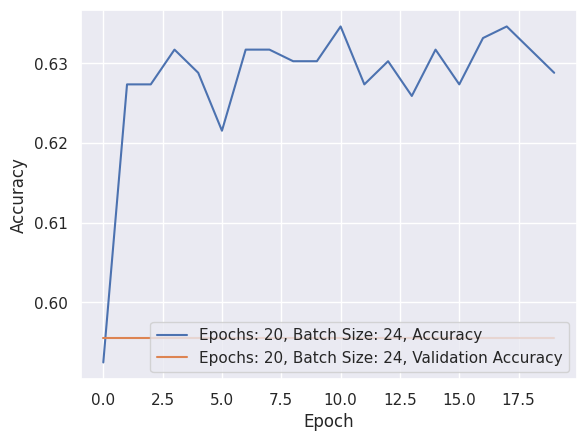

7/7 [==============================] - 0s 7ms/step - loss: 1.0159 - accuracy: 0.6150
Validation accuracy for 20 epochs with batch size 24: 0.6150000095367432


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

class_mapping = {'Large': 0, 'None': 1, 'Multiple': 2, 'Splinter': 3}
labels = [class_mapping[label] for label in labels]

images = np.array(images)
labels = np.array(labels)

if len(images) != len(labels):
    raise ValueError("Number of images and labels does not match.")

if len(images) == 0 or len(labels) == 0:
    raise ValueError("No valid data found for splitting.")

# Split data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Split the remaining training data into training and validation sets (90% train, 10% validation)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=1/9, random_state=42)

print("Size of the train features:", X_train.shape, "Size of train target:", y_train.shape)
print("Size of the validation features:", X_valid.shape, "Size of validation target:", y_valid.shape)
print("Size of the test features:", X_test.shape, "Size of test target:", y_test.shape)


# Define the model architecture along with augmentation
def build_model_with_augmentation(input_shape, num_classes, n_conv_blocks=4, n_dense_blocks=3, DROPOUT=True):
    inputs = tf.keras.Input(shape=input_shape)

    # Rescaling layer
    x = layers.Rescaling(1.0 / 255, offset=0)(inputs)

    # Data augmentation
    data_augmentation = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    # Convolution blocks
    for _ in range(n_conv_blocks - 1):
        x = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(x)
        x = layers.MaxPooling2D((2, 2))(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Final convolution block (with Flatten layer)
    x = layers.Conv2D(64, (3, 3), padding='SAME', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Flatten()(x)
    if DROPOUT:
        x = layers.Dropout(0.3)(x)

    # Dense block with modified depth
    for _ in range(n_dense_blocks):
        x = layers.Dense(100, activation='relu')(x)
        if DROPOUT:
            x = layers.Dropout(0.3)(x)

    # Output
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    # Create model
    model = tf.keras.Model(inputs, outputs)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model, data_augmentation

# Define a list of epochs to test
epochs_to_test = [10, 15, 20]

# Define a list of batch sizes to test
batch_sizes_to_test = [8, 16, 24]

for epochs in epochs_to_test:
    for batch_size in batch_sizes_to_test:
        print(f"\nTraining for {epochs} epochs with batch size {batch_size}...")

        # Build the model and data augmentation
        model, data_augmentation = build_model_with_augmentation(input_shape=X_train[0].shape, num_classes=4)

        # Train the model with different epochs and batch sizes using data augmentation
        history = model.fit(data_augmentation.flow(X_train, y_train, batch_size=batch_size),
                            steps_per_epoch=len(X_train) // batch_size,
                            epochs=epochs,
                            validation_data=(X_valid, y_valid))

        # Plot accuracy for each combination of epochs and batch sizes
        plt.plot(history.history['accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size}, Accuracy')
        plt.plot(history.history['val_accuracy'], label=f'Epochs: {epochs}, Batch Size: {batch_size}, Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend(loc='lower right')
        plt.show()

        # Evaluating the model on test data after training
        test_loss, test_accuracy = model.evaluate(X_test, y_test)
        print(f"Validation accuracy for {epochs} epochs with batch size {batch_size}: {test_accuracy}")


In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 100, 100, 3)]     0         
                                                                 
 rescaling_10 (Rescaling)    (None, 100, 100, 3)       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 100, 100, 64)      1792      
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 50, 50, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_63 (Dropout)        (None, 50, 50, 64)        0         
                                                                 
 conv2d_41 (Conv2D)          (None, 50, 50, 64)        36928     
                                                          

In [ ]:
validation_loss, validation_accuracy = model2.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

7/7 [==============================] - 0s 10ms/step - loss: 0.9890 - accuracy: 0.6150
Validation loss: 0.9688
Validation accuracy: 0.5955
Test loss: 0.9890
Test accuracy: 0.6150


7/7 [==============================] - 0s 8ms/step
The accuracy on the test data: 0.615
The F1 score on the test data: 0.19040247678018576
Precision on test data: 0.15375
Recall on test data: 0.25


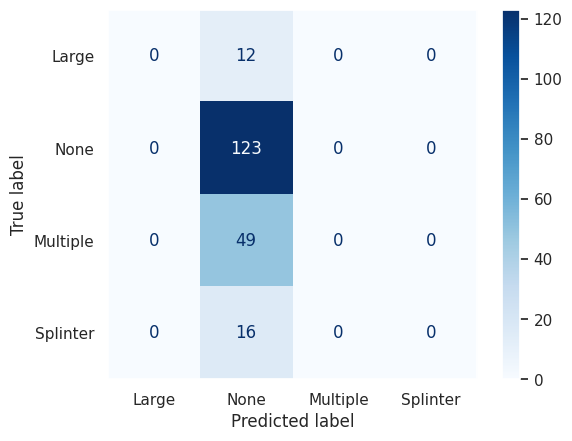

In [ ]:
pred_labels = model2.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels), display_labels=['Large', 'None','Multiple','Splinter'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)

## Comparison with a naive baseline

Create a trivial baseline model that predicts the most frequent class.

In [ ]:
from sklearn.dummy import DummyClassifier

# Assuming you have your training data in X_train and y_train

# Create a DummyClassifier that predicts the most frequent class
trivial_baseline_model = DummyClassifier(strategy='most_frequent')

# Train the trivial baseline model (as it doesn't learn, there's no actual training involved)
trivial_baseline_model.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

In [ ]:
# Use 10 epochs for training
history = model.fit(X_train, y_train, epochs=10, batch_size=100, validation_data=(X_valid, y_valid))

# Plotting accuracy during training
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

# Evaluating the model on validation and test sets
validation_loss, validation_accuracy = model2.evaluate(X_valid, y_valid)
test_loss, test_accuracy = model2.evaluate(X_test, y_test)

print(f"Validation loss: {validation_loss:.4f}")
print(f"Validation accuracy: {validation_accuracy:.4f}")
print(f"Test loss: {test_loss:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

# Predictions and performance metrics on the test set
pred_labels = model2.predict(X_test)
pred_labels = np.argmax(pred_labels, axis=1)

disp = ConfusionMatrixDisplay(confusion_matrix(y_test, pred_labels), display_labels=['Large', 'None', 'Multiple', 'Splinter'])
disp.plot(cmap=plt.cm.Blues)
plt.grid(False)

acc_test = accuracy_score(y_test, pred_labels)
f1_test = f1_score(y_test, pred_labels, average='macro')
print('The accuracy on the test data:', acc_test)
print('The F1 score on the test data:', f1_test)
pre_test = precision_score(y_test, pred_labels, average='macro')
print('Precision on test data:', pre_test)
reca_test = recall_score(y_test, pred_labels, average='macro')
print('Recall on test data:', reca_test)


# 17. K-means Clustering

In [81]:
df_alloy = pd.read_csv('/content/drive/MyDrive/MSc Greenwich/Machine Learning/Coursework/COMP1801_CourseworkDataset1_tabular.csv')

In [82]:
# Selecting only numerical columns
df_alloy_num = df_alloy.select_dtypes(include=['number'])

In [83]:
df_alloy_num.head(3)

Lifespan  coolingRate  quenchTime  forgeTime  smallDefects  \
0   284.161690           25    4.460592   7.937116            22   
1  1599.551748            9    1.425973   2.432948             2   
2   768.311031           26    2.508879   3.841211            25   

   largeDefects  sliverDefects  
0             0              7  
1             0              0  
2             0              0

In [84]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the numerical data and transform it
scaled_values = scaler.fit_transform(df_alloy_num)

# Convert the scaled values back to a DataFrame
df_alloy_scaled = pd.DataFrame(scaled_values, columns=df_alloy_num.columns, index=df_alloy_num.index)

# Display the first 3 rows of the scaled DataFrame
df_alloy_scaled.head(3)

Lifespan  coolingRate  quenchTime  forgeTime  smallDefects  largeDefects  \
0 -2.086123     0.995476    1.268322   0.934073      1.069742     -0.207052   
1  0.449486    -1.122558   -1.030155  -1.173033     -1.409669     -0.207052   
2 -1.152854     1.127853   -0.209942  -0.633921      1.441653     -0.207052   

   sliverDefects  
0       4.971010  
1      -0.211753  
2      -0.211753

In [85]:
X = np.array(df_alloy_scaled)

In [86]:
column_indices = df_alloy_scaled.columns

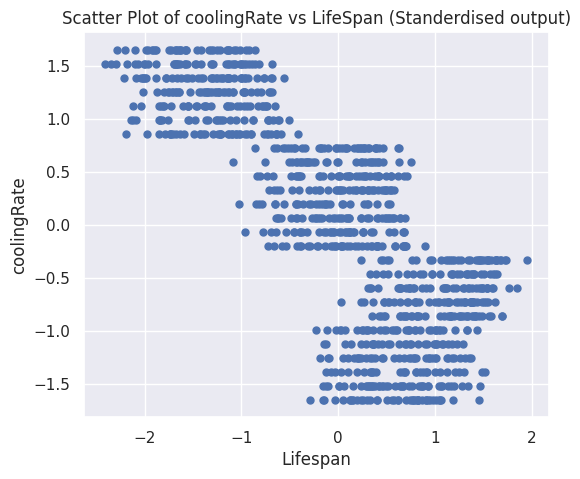

In [102]:
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 1], s=25)
plt.title('Scatter Plot of coolingRate vs LifeSpan (Standerdised output)')
plt.xlabel('Lifespan')
plt.ylabel('coolingRate')
plt.show()

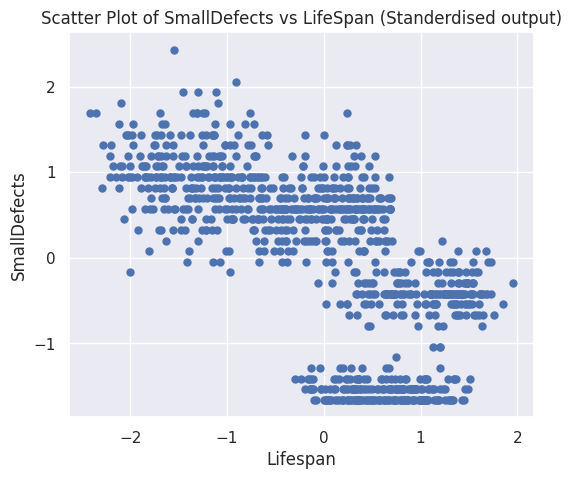

In [103]:
plt.figure(figsize=(6,5))
plt.scatter(X[:, 0], X[:, 4], s=25)
plt.title('Scatter Plot of SmallDefects vs LifeSpan (Standerdised output)')
plt.xlabel('Lifespan')
plt.ylabel('SmallDefects')
plt.show()

###17.2.3 Visual inspection

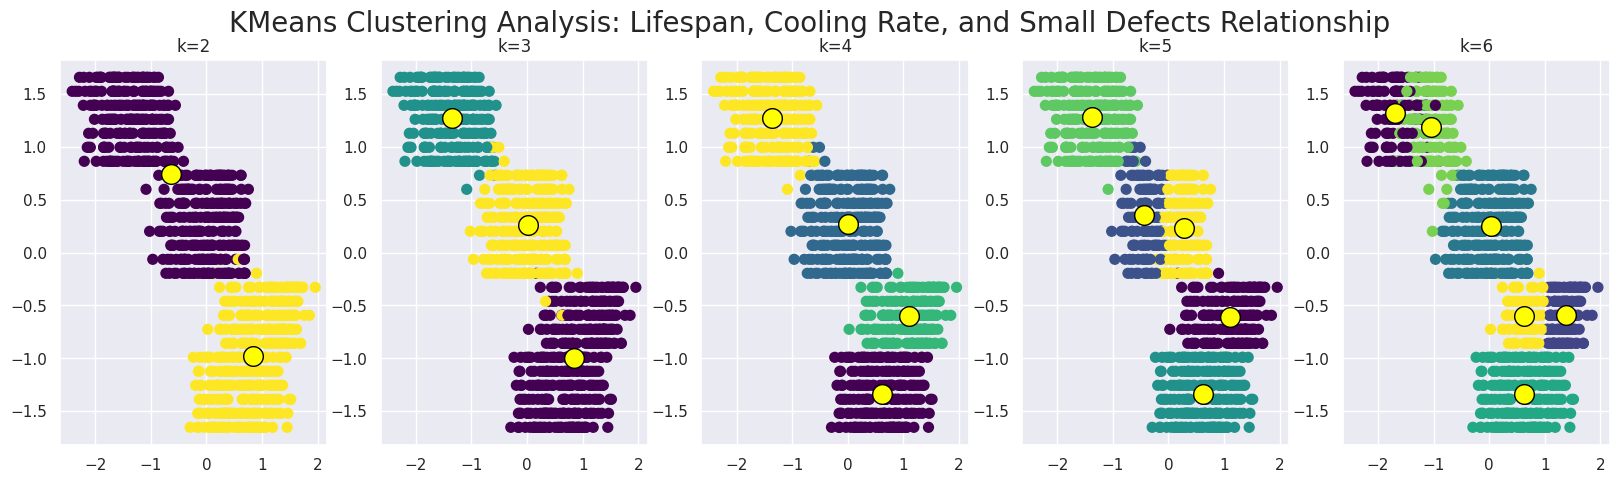

In [100]:
# Performing K-Means Clustering for Lifespan, coolingRate and smalldefects
#X_2 = X[:, 0:2]
X_2 = np.concatenate((X[:, 0:2], X[:, 4:5]), axis=1)
fig, axs = plt.subplots(1, 5, figsize=(20, 5))
fig.suptitle('KMeans Clustering Analysis: Lifespan, Cooling Rate, and Small Defects Relationship', fontsize=20)
axs = axs.flatten() # Flatten the axis array for easy indexing

for k in range(2, 7):
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_2)

    # Scatter Plot
    axs[k-2].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[k-2].set_title(f'k={k}')
    centroids = model.cluster_centers_[:, :2]
    axs[k-2].scatter(centroids[:, 0], centroids[:, 1], marker='o', c='yellow', s=200, edgecolors='black', label='Centroids')  # Plot centroids

plt.show()

## 17.2 Choosing the 'best' number of clusters (`k`) and evaluating your clusters

###17.2.1 The Silhouette Score

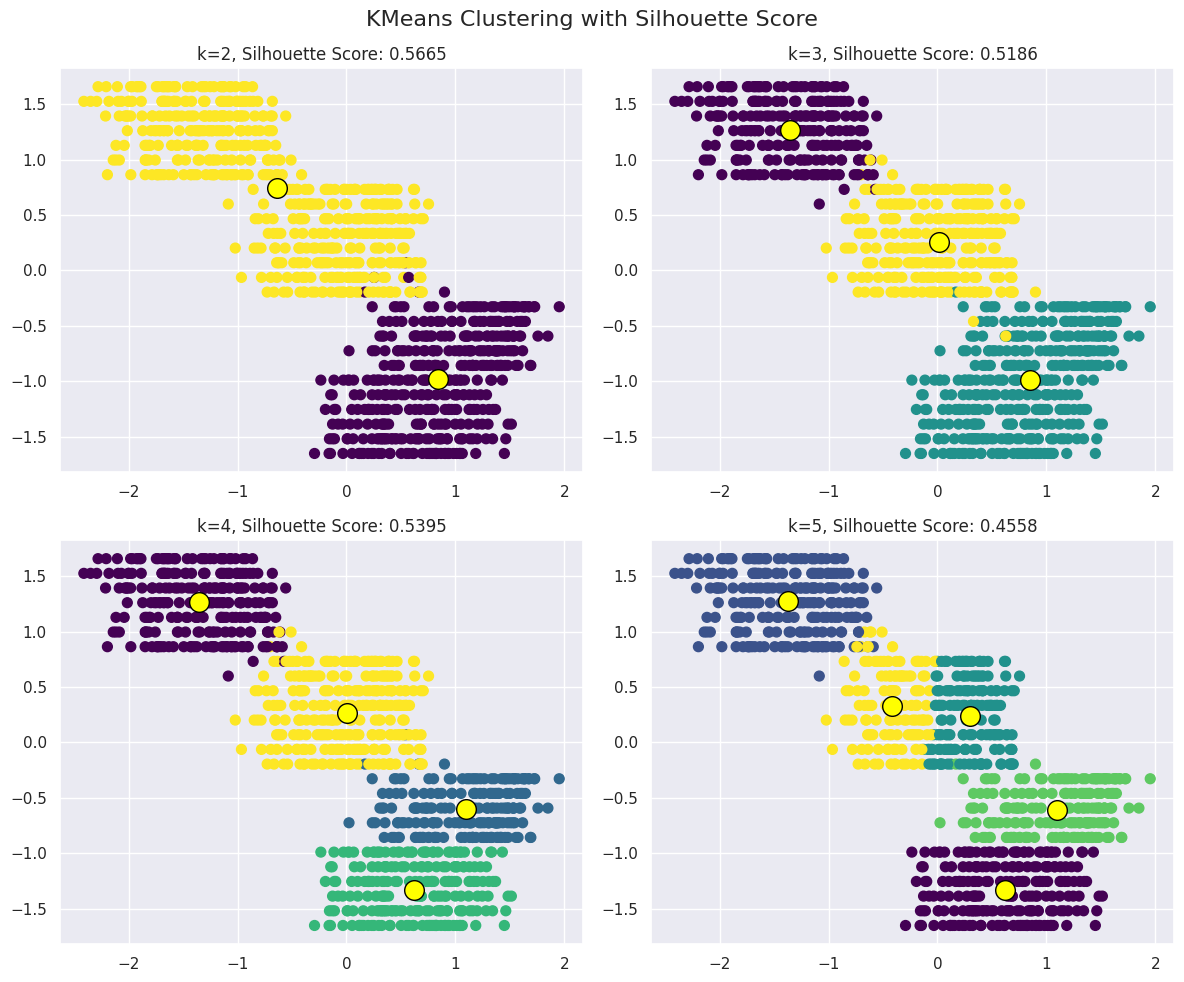

In [91]:
# Set up the subplot layout
fig, axs = plt.subplots(2,2, figsize=(12, 10))
fig.suptitle('KMeans Clustering with Silhouette Score', fontsize=16)
axs = axs.flatten() # Flatten the axs array for easy indexing

for k in range(2, 6):
    # KMeans clustering
    model = KMeans(n_clusters=k, n_init='auto')
    cluster_labels = model.fit_predict(X_2)

    # Silhouette Score
    score = silhouette_score(X_2, cluster_labels)

    # Scatter Plot
    axs[k-2].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
    axs[k-2].set_title(f'k={k}, Silhouette Score: {score:.4f}')
    centroids = model.cluster_centers_[:, :2]
    axs[k-2].scatter(centroids[:, 0], centroids[:, 1], marker='o', c='yellow', s=200, edgecolors='black', label='Centroids')

plt.tight_layout()
# plt.show()

The provided code after performing KMeans clustering with two clusters (n_clusters=2) extracts the data points belonging to each of the two clusters using boolean indexing and creates separate DataFrames (df1 and df2) containing the data points for each cluster.

In [96]:
# so it looks like the most parsimoniuous clustering is just having two

model = KMeans(n_clusters=2, n_init='auto')
cluster_labels = model.fit_predict(X_2)

df1 = pd.DataFrame(df_alloy_num[cluster_labels == 0])
print(df1.describe())


df2 = pd.DataFrame(df_alloy_num[cluster_labels == 1])
print(df2.describe())

          Lifespan  coolingRate  quenchTime   forgeTime  smallDefects  \
count   432.000000   432.000000  432.000000  432.000000    432.000000   
mean   1804.464836    10.076389    2.756794    5.485536      5.379630   
std     249.357121     3.244299    1.326863    2.590196      4.883264   
min    1214.207065     5.000000    0.502788    1.018951      0.000000   
25%    1607.540385     7.000000    1.583047    3.287412      1.000000   
50%    1802.111040    10.000000    2.687026    5.488558      3.000000   
75%    2006.514201    13.000000    3.904866    7.644008     10.000000   
max    2380.142759    18.000000    4.959057    9.959708     15.000000   

       largeDefects  sliverDefects  
count    432.000000     432.000000  
mean       0.101852       0.298611  
std        0.517711       1.396448  
min        0.000000       0.000000  
25%        0.000000       0.000000  
50%        0.000000       0.000000  
75%        0.000000       0.000000  
max        4.000000      10.000000  
         

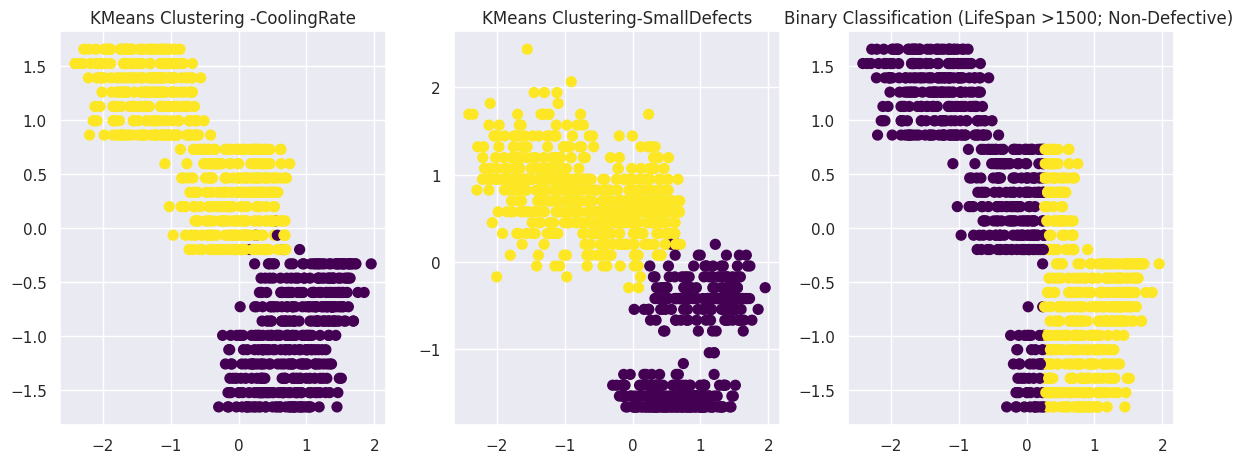

In [98]:
fig, axs = plt.subplots(1, 3, figsize=(12, 5))

# First Scatter Plot (KMeans Clustering)
axs[0].scatter(X[:, 0], X[:, 1], c=cluster_labels, s=50, cmap='viridis')
axs[0].set_title('KMeans Clustering -CoolingRate')

# First Scatter Plot (KMeans Clustering)
axs[1].scatter(X[:, 0], X[:, 4], c=cluster_labels, s=50, cmap='viridis')
axs[1].set_title('KMeans Clustering-SmallDefects')

threshold = 1500
binary_lifespan = np.where(df_alloy_num['Lifespan'] > threshold, 1, 0)

# Second Scatter Plot (Binary Classification)
axs[2].scatter(X[:, 0], X[:, 1], c=binary_lifespan, s=50, cmap='viridis')
axs[2].set_title('Binary Classification (LifeSpan >1500; Non-Defective) ')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

###17.2.2 The Elbow Method

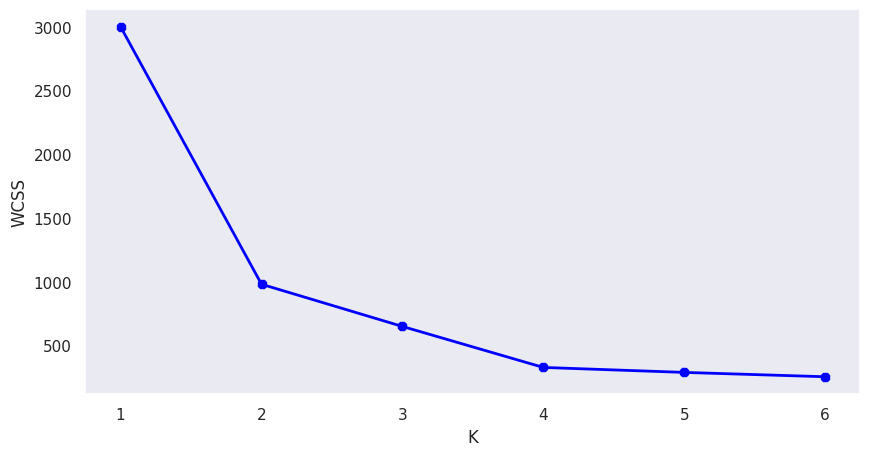

[3000.0, 980.5781876546708, 649.6962838602564, 328.2619542335537, 289.2339698691777, 255.162284700784]


In [99]:
wcss = [] # storing the within-cluster sum of square (WCSS) distances
for k in range(1,7): # different values of K = 1, 2, 3, 4, 5
    kmeans = KMeans(n_clusters=k, n_init='auto')
    kmeans.fit(X_2)
    wcss.append(kmeans.inertia_) # member variable inertia_ contains the WCSS for that particular K
plt.figure(figsize=(10,5))
plt.grid()
plt.plot(range(1,7),wcss, linewidth=2, color="blue", marker ="8")
plt.xlabel("K")
plt.xticks([x for x in range(1, 7)])
plt.ylabel("WCSS")
plt.show()
print(wcss)